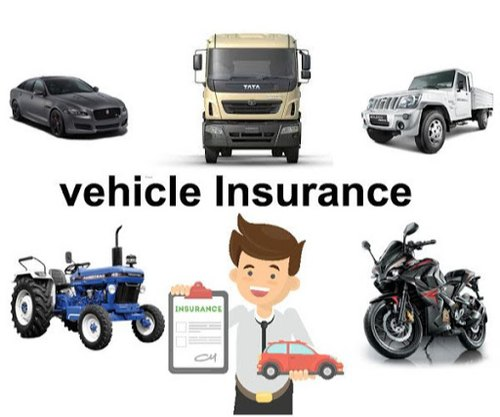

In [1]:
from IPython.display import Image
Image(filename ='E:/PIP_Devmallya/Week_1/Problem_1/vehicle_insurance.jpg', width = 800, height = 200)

<h3>Context</h3>

    Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

    An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

    For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

    Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

<h3>Problem Statement</h3>

    Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

    Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# 1. Import the Dependencies

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, recall_score, classification_report, precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix
%matplotlib inline
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

<h3>2. Load the Dataset</h3>

    By giving a parameter value for the file name (e.g. pd. read csv("filename. csv")), we may import tabular data from CSV files into pandas dataframes using the pandas package's read csv() method. Remember that we gave pandas an alias (pd), so will'll be calling pandas functions with pd.

In [3]:
df_train = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Check the shape of the train data
df_train.shape

(381109, 12)

In [5]:
df_test = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
# Check the shape of the test data
df_test.shape

(127037, 11)

<h3>3. EDA (Exploratory Data Analysis)</h3>

    EDA is the process of studying a dataset in order to uncover patterns and anomalies (outliers) and to create hypotheses based on our understanding of the dataset. EDA include generating summary statistics for numerical data in a dataset as well as constructing various graphical representations to better comprehend the data.

<h3>3.1 Check missing values</h3>

    * In Pandas DataFrame, we utilise the functions isnull() and notnull() to check for missing data. Both functions assist in determining if a value is NaN or not. These functions may also be applied to Pandas Series to find null values in a series.
    * If the missing data is a numerical variable, it is filled using the mean or median value.
    * If the missing data is a categorical value, mode is used to fill it.
    * Filling in the numerical value with 0 or -999, or any other number that does not appear in the data.

In [7]:
# Check the total number of missing values are present in training dataset
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
# Check the total number of missing values are present in test dataset
df_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

Missing values are not present in the both train and test datasets

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


info() method in DataFrame. The info() method prints a brief overview of a DataFrame. This function returns data about a DataFrame, such as the index and column dtypes, non-null values, and memory utilization.

In [10]:
df_train.describe(percentiles = [.25,.50,.75,.95,.99])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,362053.600000,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,377297.920000,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In here the describe function returns a descriptive statistics summary for a specified dataframe. This comprises all of the characteristics' mean, count, standard deviation, percentiles, and min-max values.

## 3.2 Get the numerical columns and Categorical columns from the dataset

In [11]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
# Categorical columns
df_train_categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

In [14]:
# Numerical columns
df_train_numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

## 3.3 Check the value counts of the categorical columns

<AxesSubplot:xlabel='Response', ylabel='count'>

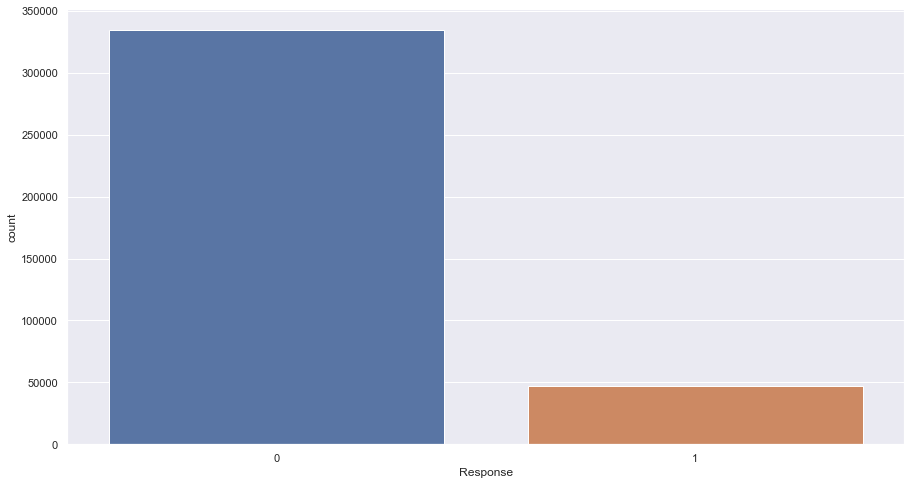

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(df_train.Response)

In [16]:
print('No. of Response (Target Variable), whether customer is interested or not for the insurance: ')
df_train['Response'].value_counts()

No. of Response (Target Variable), whether customer is interested or not for the insurance: 


0    334399
1     46710
Name: Response, dtype: int64

In [17]:
df_train_response = df_train['Response'].value_counts()
responded_zero = round(df_train_response[0]/df_train['Response'].count()*100,2)
responded_one = round(df_train_response[1]/df_train['Response'].count()*100,2)
print('Percentage of Customer is not interested for the insurance:', responded_zero,'%')
print('Percentage of Customer is interested for the insurance:', responded_one,'%')

Percentage of Customer is not interested for the insurance: 87.74 %
Percentage of Customer is interested for the insurance: 12.26 %


<AxesSubplot:xlabel='Gender', ylabel='count'>

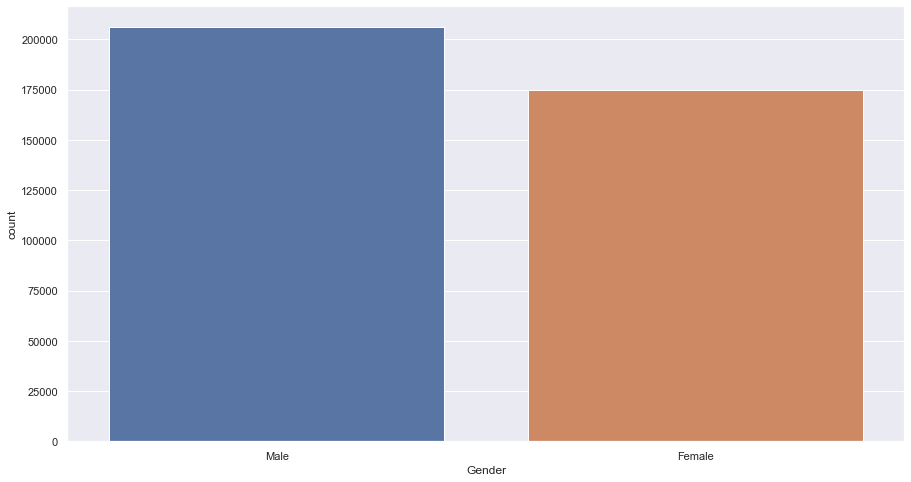

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(df_train.Gender)

In [19]:
print('The number of males and females in Vehicle insurance dataset Gender column are: ')
df_train['Gender'].value_counts()

The number of males and females in Vehicle insurance dataset Gender column are: 


Male      206089
Female    175020
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

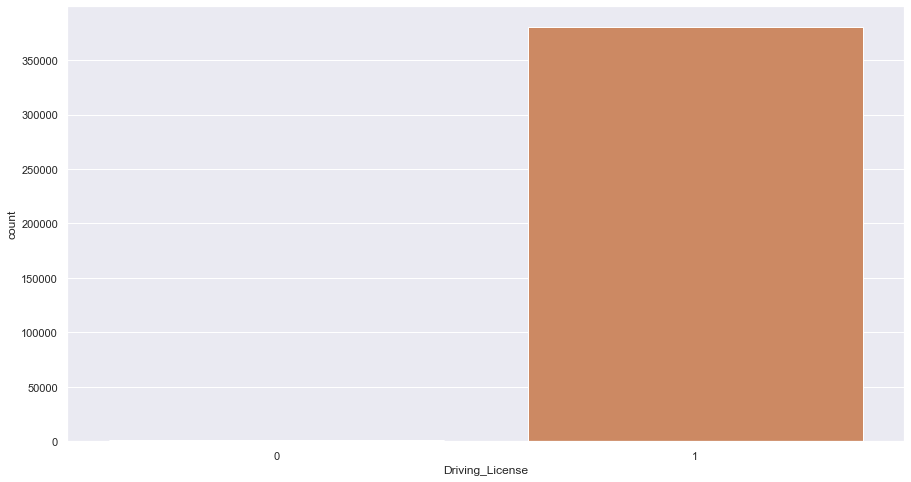

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(df_train.Driving_License)

In [21]:
print('The number of customers having driving license or not: ')
df_train['Driving_License'].value_counts()

The number of customers having driving license or not: 


1    380297
0       812
Name: Driving_License, dtype: int64

Where majority of the customers are having Diving License

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

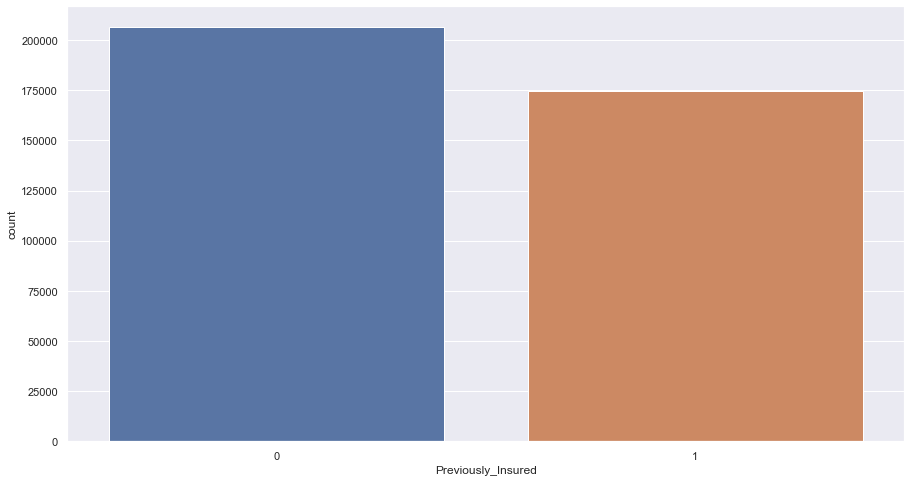

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(df_train.Previously_Insured)

In [23]:
print('The number of customers having vehicle insurance or not: ')
df_train['Previously_Insured'].value_counts()

The number of customers having vehicle insurance or not: 


0    206481
1    174628
Name: Previously_Insured, dtype: int64

In here most of the customers dosen't have vehicle insurance

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

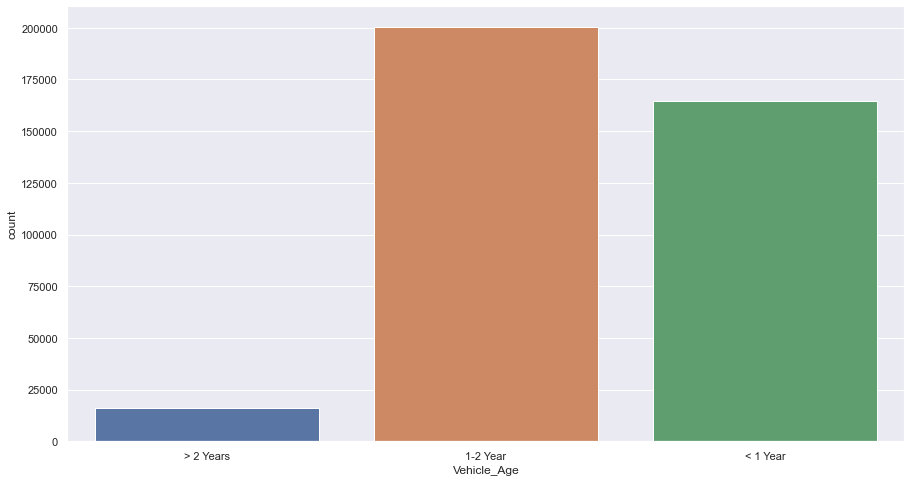

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(df_train.Vehicle_Age)

In [25]:
print('The age of the vehicles: ')
df_train['Vehicle_Age'].value_counts()

The age of the vehicles: 


1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

From this count plot we can see most of the vehicle age is between 1-2 years, less no. of vehicles are more than 2 years old 

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

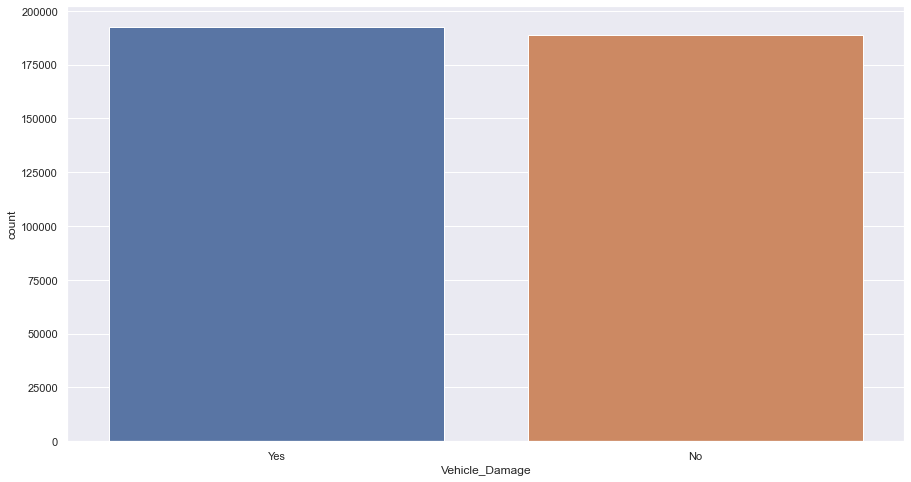

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(df_train.Vehicle_Damage)

In [27]:
print('No. of vehicles are damaged or not: ')
df_train['Vehicle_Damage'].value_counts()

No. of vehicles are damaged or not: 


Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

Number of vehicles of the customers are damaged or not is partially balanced

### Gender V/S Response

In [28]:
df_train_gender_response = df_train.groupby(['Gender', 'Response'])['id'].count().to_frame().rename(columns={'id' : 'count'}).reset_index()
df_train_gender_response

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


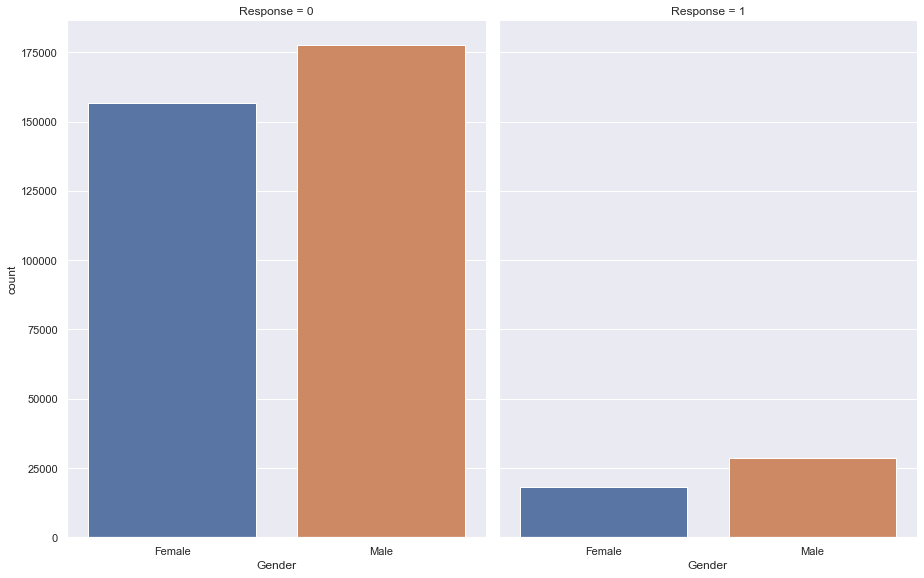

In [29]:
df_train_GR_plot = sns.catplot(x = "Gender", y = "count", col = "Response", data = df_train_gender_response, kind = "bar", height = 8, aspect = .8);

For both response 0 (don't want vehicle insurance) females are less than males and for response 1 (wan't vehicle insurance) females are also less than males.

### Gender V/S Driving License

In [30]:
df_train_Gender_License = df_train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df_train_Gender_License

,Gender,Driving_License
0,Female,175020
1,Male,206089


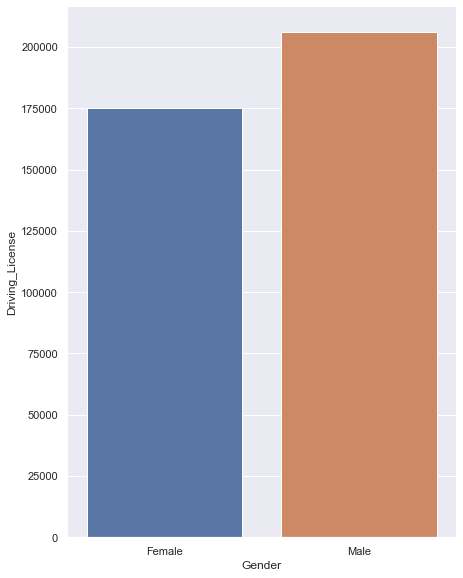

In [31]:
df_train_GDL_plot = sns.catplot(x = "Gender", y = "Driving_License", data = df_train_Gender_License, kind = "bar", height = 8, aspect = .8);

Females posses less number of Driving License than Males

### Vehicle Age V/S Response

In [32]:
df_train_Vehicle_Age_Response = df_train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df_train_Vehicle_Age_Response

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


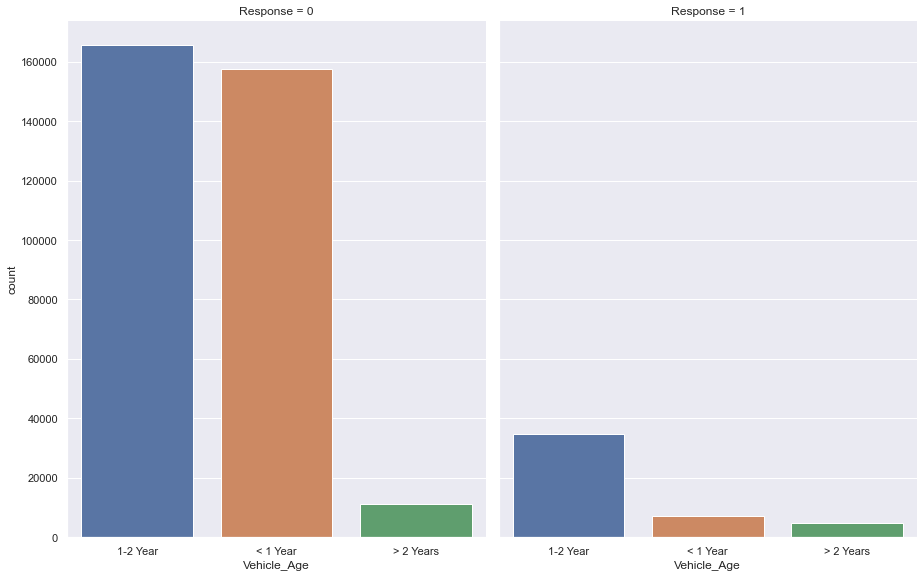

In [33]:
df_train_VAR_plot = sns.catplot(x = "Vehicle_Age", y = "count", col = "Response", data = df_train_Vehicle_Age_Response, kind = "bar", height = 8, aspect = .8);

Number of customers accepts insurence or not on the basis of their vehicle age

### Damage Vehicle V/S Response

In [34]:
df_train_Damage_Vehicle_Response = df_train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df_train_Damage_Vehicle_Response

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


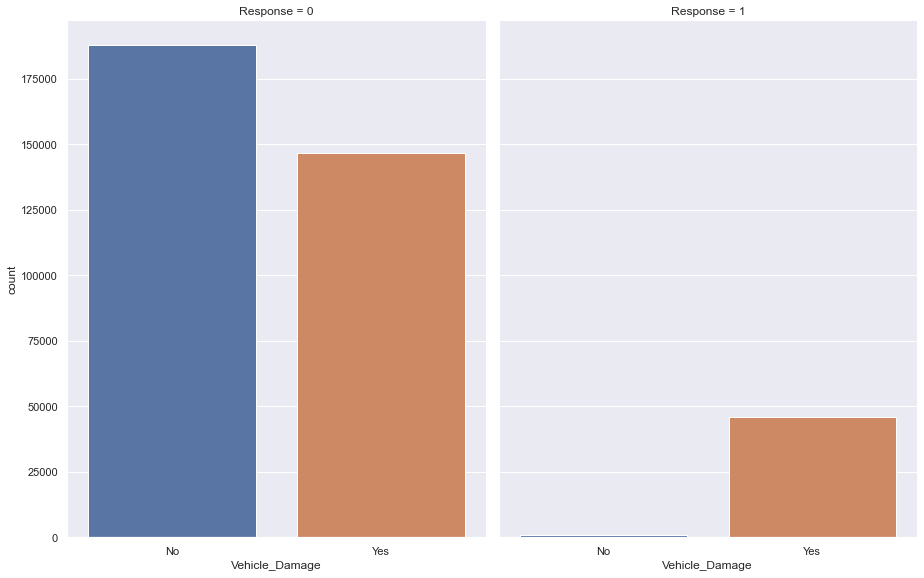

In [35]:
df_train_DVR = sns.catplot(x = "Vehicle_Damage", y = "count",col = "Response", data = df_train_Damage_Vehicle_Response, kind = "bar", height = 8, aspect = .8);

Customers accepts insurence or not on the basis of their vehicle damage

<h3>3.4 Check the distributions and skewness of the Numerical Cloumns</h3>

       * Skewness is a measure of the distribution's symmetry. Understanding the form of data is a critical step. It aids in determining where the greatest information is hidden and analyzing outliers in a particular dataset.
       * Because the few low scores tend to pull the mean to the left in a negatively skewed distribution, the mean is generally smaller than the median. The mode is usually less than the mean and median in a positively skewed distribution.
       * A positively skewed distribution is one with the tail on the right side. Skewness is larger than zero for a favourably skewed distribution. As you can see from the graph, the mean value is the highest, followed by the median, and finally by the mode.
       * Normal distribution is a symmetrical continuous probability distribution on both sides of the mean, with the right side of the centre mirroring the left. Because the probability density graph of the normal distribution resembles a bell, it is commonly referred to as the bell curve.
       * A lower border of a data collection causes data to be skewed to the right, whereas a higher barrier causes data to be skewed to the left. As a result, if the data set's bottom limits are exceptionally low in comparison to the rest of the data, the data will tilt right.
       * When the tail on the right side of the distribution is longer or fatter, it is said to be positive skewness. The mode will be greater than the mean and median. Negative skewness occurs when the left side of the distribution's tail is longer or fatter than the right side's tail.

### Customers Age Distribution

<AxesSubplot:xlabel='Age', ylabel='Density'>

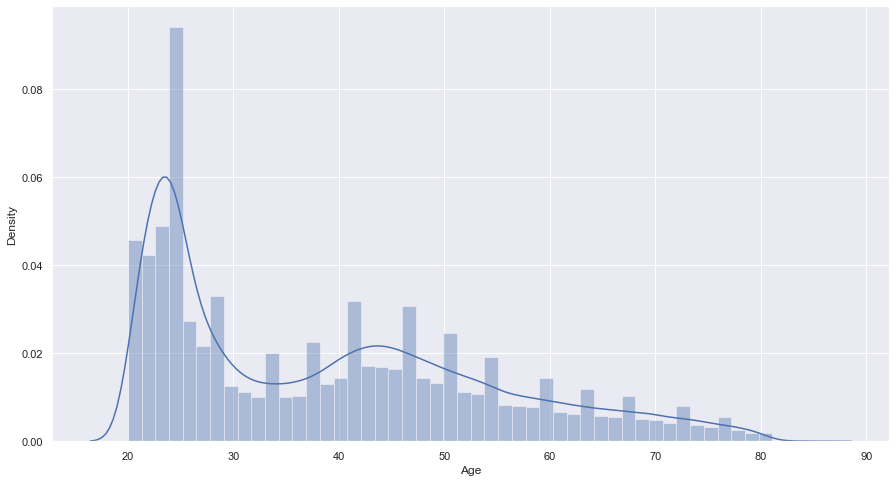

In [36]:
plt.figure(figsize=(15,8))
sns.distplot(df_train.Age)

In [37]:
print('Skewness of Age:', df_train.Age.skew())

Skewness of Age: 0.6725389977260843


The age distribution has a larger centre at 25 and a smaller centre around 45. It is asymmetric, with a significant right skew. The data is widely dispersed from the histogram's centre. Perhaps the model's age might be standardised.

### Customers Annual Premium

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

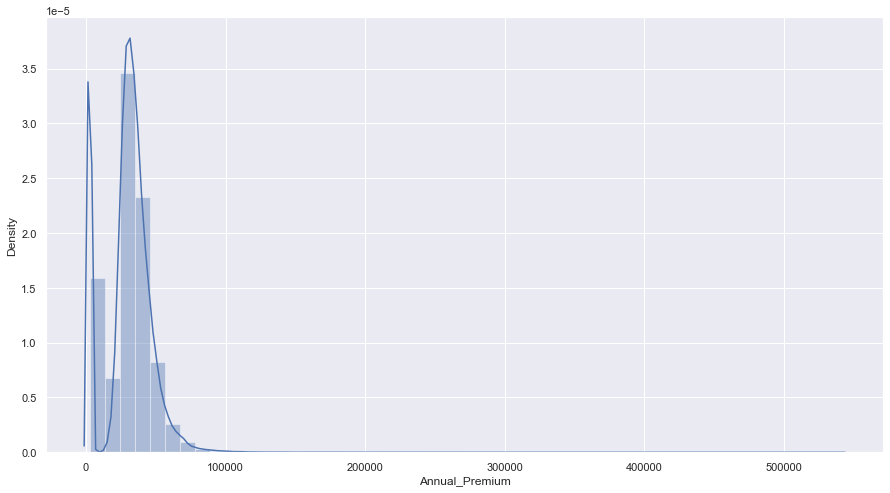

In [38]:
plt.figure(figsize=(15,8))
sns.distplot(df_train.Annual_Premium)

In [39]:
print('Skewness of Annual_Premium:', df_train.Annual_Premium.skew())

Skewness of Annual_Premium: 1.7660872148961309


The annual premium has a big outlier around 500,000. The information is quite concentrated.

### Vintage

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

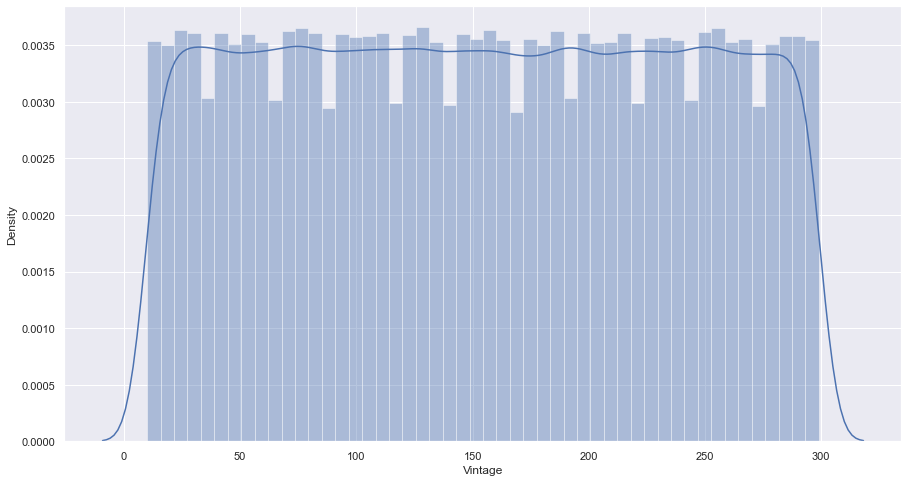

In [40]:
plt.figure(figsize=(15,8))
sns.distplot(df_train.Vintage)

In [41]:
print('Skewness of Vintage:', df_train.Vintage.skew())

Skewness of Vintage: 0.0030295168899980816


Vintage has a vast spread and a homogeneous distribution with no discernible core. But Vintage is not skewed properly

### Annual Premium V/S Age

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

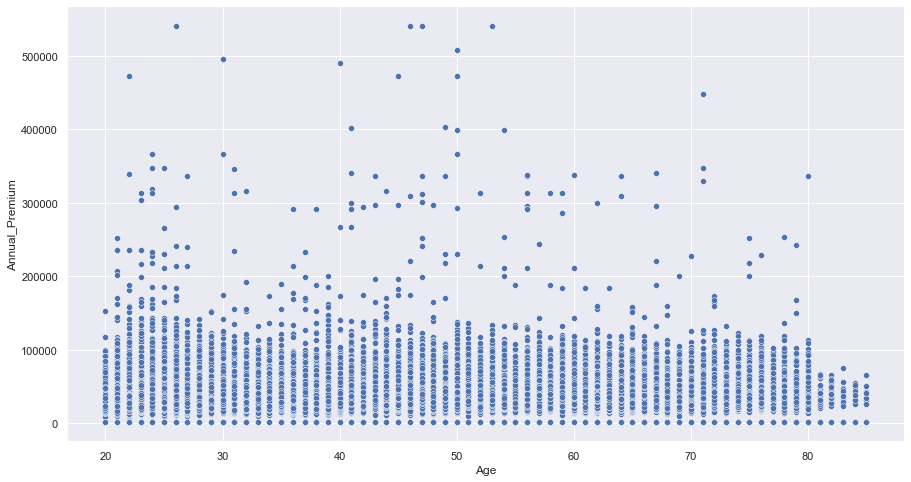

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = df_train['Age'], y = df_train['Annual_Premium'])

<h3>3.5 Check the Outliers</h3>

    An outlier is a data point which is significantly different from the remaining data. Outliers are common in statistics such as the mean and variance. Furthermore, certain Machine Learning models are susceptible to outliers, which might reduce their performance. As a result, depending on the method we want to train, we frequently eliminate outliers from our variables. 

    Identifying possible outliers is critical for the following reasons: 
    * An outlier may imply that the data is flawed. For example, the data may have been wrongly coded, or an experiment could have been done erroneously. 
    * Outliers might be caused by random variance or by anything scientifically intriguing.
    * It can be removed with the help of Inter Quartile Range by finding out the upper and lower limit between 0.75 to 0.25 if the outlier is present in the whole dataset at a certain distance of 1.5.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)

    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

### Used box-plot for Age column to check the outliers.

<AxesSubplot:ylabel='Age'>

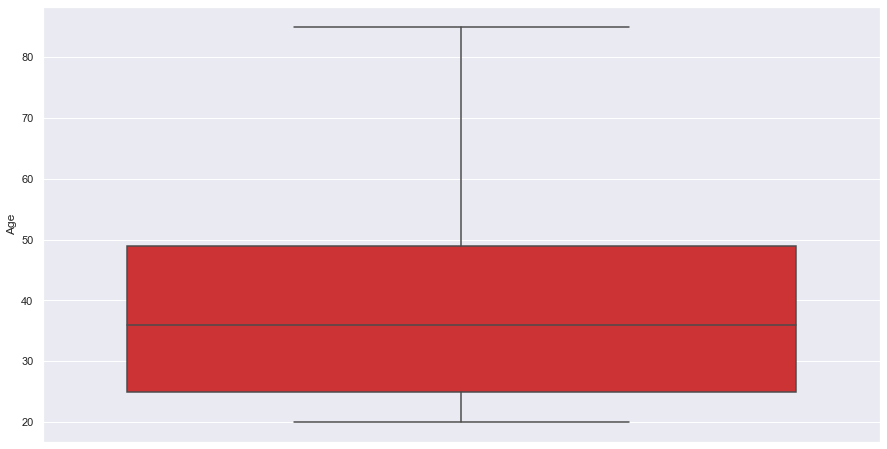

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(y = 'Age', data = df_train, palette='Set1')

Outliers wich are not present in Age column for predictions

<AxesSubplot:ylabel='Annual_Premium'>

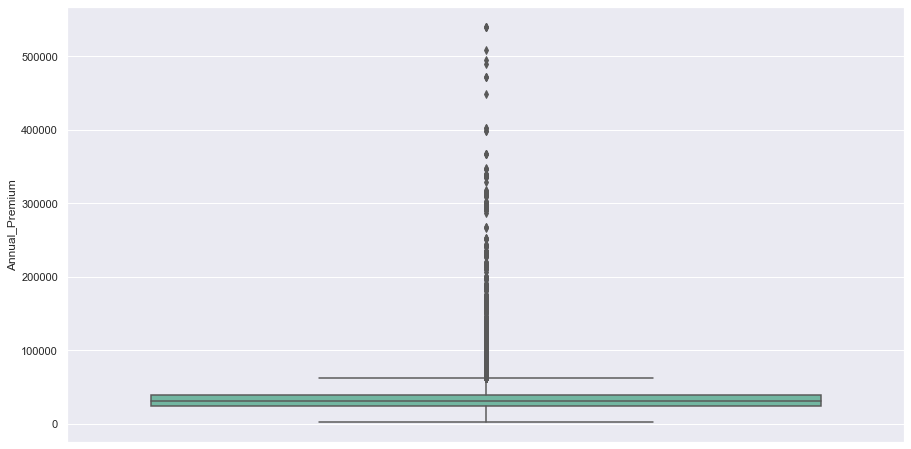

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(y = 'Annual_Premium', data = df_train, palette='Set2')

As Outliers are present in the Annual_Premium. I saw that the boxplot for Annual Premium went all the way to 500,000. Before normalizing, I should remove the outliers.

In [45]:
# Detect the outliers
q75 = df_train["Annual_Premium"].quantile(q=.75)
q25 = df_train["Annual_Premium"].quantile(q=.25)
IQR = q75-q25

lower_Bound = q25 - 1.5*IQR
upper_Bound = q75 + 1.5*IQR

print(lower_Bound)
print(upper_Bound)

1912.5
61892.5


    An outlier is an observation that appears to deviate markedly from other observations in the sample. Identification of potential outliers is important for the following reasons. An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly.

    It's important to investigate the nature of the outlier before deciding.
    * If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier.
    * If the outlier does not change the results but does affect assumptions, you may drop the outlier.

In [46]:
# Remove the outliers
remove_outliers = df_train.loc[(df_train["Annual_Premium"] < lower_Bound) | (df_train["Annual_Premium"] > upper_Bound)]
df_train = df_train.drop(remove_outliers.index)
print("Dropped", remove_outliers.shape[0], "outliers.")

Dropped 10320 outliers.


In [47]:
print('Skewness of Annual_Premium:', df_train.Annual_Premium.skew())

Skewness of Annual_Premium: -0.5196839409738611


<AxesSubplot:ylabel='Annual_Premium'>

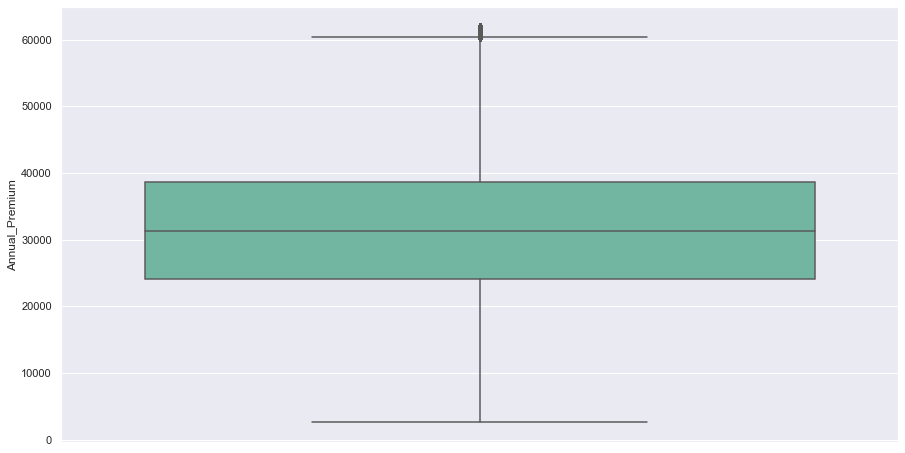

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(y = 'Annual_Premium', data = df_train, palette='Set2')

Now Annual Premium is moderately skewed

<AxesSubplot:ylabel='Vintage'>

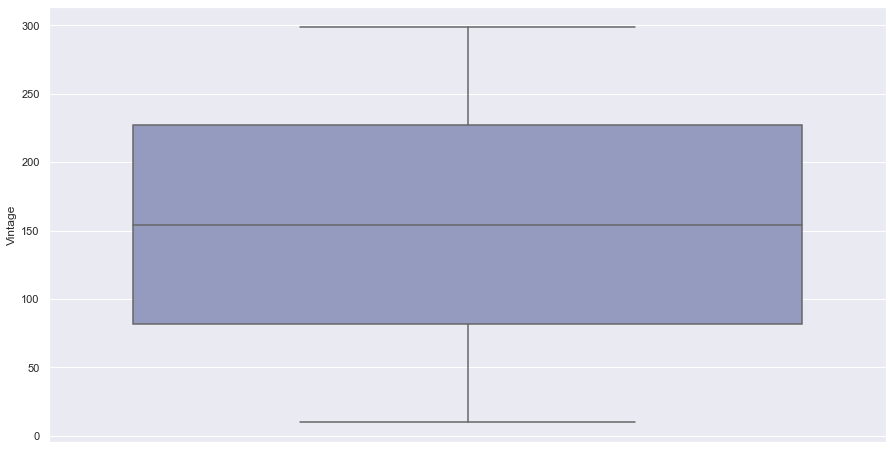

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(y = 'Vintage', data = df_train, palette='BuPu_r')

Outliers are not present in Vintage column for predictions

<h3>4. Data Preprocessing</h3>

    * The process of converting raw data into a comprehensible format is known as data preparation. We cannot deal with raw data, thus this is a key stage in data mining. Before using machine learning or data mining methods, the data quality should be evaluated.
    * Because errors, redundancies, missing values, and inconsistencies all jeopardise the set's integrity, you must address all of them for a more accurate result. Assume you're using a defective dataset to train a Machine Learning system to deal with your clients' purchases. There is a good chance that the system may acquire biases and aberrations that will result in a bad user experience.
    * As a result, before you can use that data for your intended purpose, it must be as structured and "clean" as feasible. Depending on the nature of the problem, there are numerous approaches you might take. To obtain a better data set, you should ideally employ all of the approaches listed below.

In [50]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### 4.1 Map the Gender column for train

In [51]:
# Map the Gender column with Male as 1 and Female as 0
df_train['Gender'] = df_train['Gender'].map({'Male' : 1, 'Female' : 0}).astype(int)

In [52]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<h3>4.2 Get the Dummies of the dataset for train</h3>

    * get dummies() is a data manipulation function. It is used to transform categorical data into dummy or indicator variables. pandas.get dummies(data, no prefix, no prefix sep='_', dummy na=False, columns=None, sparse=False, drop first=False, dtype=None)
    * Pandas' get dummies() method does dummy encoding in a single line of code. The Pandas library's get dummies() method may be used to transform a category variable into dummy/indicator variables. It is, in some ways, a static mechanism for encoding behaviour.

In [53]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [54]:
# Both the columns categorical and numerical
categorical_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lesser_than_1_Year', 'Vehicle_Age_greater_than_2_Years', 'Vehicle_Damage_Yes', 'Policy_Sales_Channel']
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

### 4.3 Rename the Columns for train

In [55]:
df_train = df_train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lesser_than_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_greater_than_2_Years"})
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lesser_than_1_Year,Vehicle_Age_greater_than_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [56]:
# Change the type of the columns
df_train['Vehicle_Damage_Yes'] = df_train['Vehicle_Damage_Yes'].astype('int')
df_train['Vehicle_Age_lesser_than_1_Year'] = df_train['Vehicle_Age_lesser_than_1_Year'].astype('int')
df_train['Vehicle_Age_greater_than_2_Years'] = df_train['Vehicle_Age_greater_than_2_Years'].astype('int')

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                370789 non-null  int64  
 1   Gender                            370789 non-null  int32  
 2   Age                               370789 non-null  int64  
 3   Driving_License                   370789 non-null  int64  
 4   Region_Code                       370789 non-null  float64
 5   Previously_Insured                370789 non-null  int64  
 6   Annual_Premium                    370789 non-null  float64
 7   Policy_Sales_Channel              370789 non-null  float64
 8   Vintage                           370789 non-null  int64  
 9   Response                          370789 non-null  int64  
 10  Vehicle_Age_lesser_than_1_Year    370789 non-null  int32  
 11  Vehicle_Age_greater_than_2_Years  370789 non-null  i

<h3>4.4 Transform the train dataset</h3>

    * Transforms are typically used to make data appear to more closely match the assumptions of a statistical inference technique, or to improve the interpretability or look of graphs. Almost usually, the function used to convert the data is invertible and, in general, continuous.
    * StandardScaler = It converts the data so that the mean is 0 and the standard deviation is 1. In a nutshell, it standardises data. Standardization is beneficial for data with negative values. It organises the data according to a conventional normal distribution.
    * MinMaxScaler = MinMaxScaler subtracts the minimum value in the feature from each value in the feature and then divides by the range for each value in the feature. The range is defined as the difference between the initial maximum and minimum. The original distribution's shape is preserved by MinMaxScaler.

In [58]:
Std_Scaler = StandardScaler()
df_train[numerical_features] = Std_Scaler.fit_transform(df_train[numerical_features])

In [59]:
Min_Max = MinMaxScaler()
df_train[['Annual_Premium']] = Min_Max.fit_transform(df_train[['Annual_Premium']])

In [60]:
df_train = df_train.drop('id',axis=1)

In [61]:
for col in categorical_features:
    df_train[col] = df_train[col].astype('str')

In [62]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lesser_than_1_Year,Vehicle_Age_greater_than_2_Years,Vehicle_Damage_Yes
0,1,0.345182,1,0.117406,0,0.638250,-1.6014740130806147,0.748826,1,0,1,1
1,1,2.417701,1,-1.760828,0,0.521515,-1.6014740130806147,0.342470,0,0,0,0
2,1,0.539480,1,0.117406,0,0.601802,-1.6014740130806147,-1.521990,1,0,1,1
3,1,-1.144442,1,-1.159793,1,0.438544,0.7301519347737656,0.581503,0,1,0,0
4,0,-0.626312,1,1.094088,1,0.419594,0.7301519347737656,-1.378570,0,1,0,0


### 4.5 Map the Gender column for test

In [63]:
# Map the Gender column with Male as 1 and Female as 0
df_test['Gender'] = df_test['Gender'].map({'Male' : 1, 'Female' : 0}).astype(int)

In [64]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,1,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,1,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


### 4.6 Get the Dummies of the dataset for test

In [65]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,381110,1,25,1,11.0,1,35786.0,152.0,53,1,0,0
1,381111,1,40,1,28.0,0,33762.0,7.0,111,0,0,1
2,381112,1,47,1,28.0,0,40050.0,124.0,199,0,0,1
3,381113,1,24,1,27.0,1,37356.0,152.0,187,1,0,1
4,381114,1,27,1,28.0,1,59097.0,152.0,297,1,0,0


### 4.7 Rename the Columns for test

In [66]:
df_test = df_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lesser_than_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_greater_than_2_Years"})
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lesser_than_1_Year,Vehicle_Age_greater_than_2_Years,Vehicle_Damage_Yes
0,381110,1,25,1,11.0,1,35786.0,152.0,53,1,0,0
1,381111,1,40,1,28.0,0,33762.0,7.0,111,0,0,1
2,381112,1,47,1,28.0,0,40050.0,124.0,199,0,0,1
3,381113,1,24,1,27.0,1,37356.0,152.0,187,1,0,1
4,381114,1,27,1,28.0,1,59097.0,152.0,297,1,0,0


In [67]:
# Change the type of the columns
df_test['Vehicle_Damage_Yes'] = df_test['Vehicle_Damage_Yes'].astype('int')
df_test['Vehicle_Age_lesser_than_1_Year'] = df_test['Vehicle_Age_lesser_than_1_Year'].astype('int')
df_test['Vehicle_Age_greater_than_2_Years'] = df_test['Vehicle_Age_greater_than_2_Years'].astype('int')

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                127037 non-null  int64  
 1   Gender                            127037 non-null  int32  
 2   Age                               127037 non-null  int64  
 3   Driving_License                   127037 non-null  int64  
 4   Region_Code                       127037 non-null  float64
 5   Previously_Insured                127037 non-null  int64  
 6   Annual_Premium                    127037 non-null  float64
 7   Policy_Sales_Channel              127037 non-null  float64
 8   Vintage                           127037 non-null  int64  
 9   Vehicle_Age_lesser_than_1_Year    127037 non-null  int32  
 10  Vehicle_Age_greater_than_2_Years  127037 non-null  int32  
 11  Vehicle_Damage_Yes                127037 non-null  i

### 4.8 Transform the test dataset

In [69]:
Std_Scaler = StandardScaler()
df_test[numerical_features] = Std_Scaler.fit_transform(df_test[numerical_features])

In [70]:
Min_Max = MinMaxScaler()
df_test[['Annual_Premium']] = Min_Max.fit_transform(df_test[['Annual_Premium']])

In [71]:
for col in categorical_features:
    df_test[col] = df_test[col].astype('str')

In [72]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lesser_than_1_Year,Vehicle_Age_greater_than_2_Years,Vehicle_Damage_Yes
0,381110,1,-0.890089,1,-1.170327,1,0.070633,0.7393486379778974,-1.211054,1,0,0
1,381111,1,0.079795,1,0.116590,0,0.066321,-1.927487169651757,-0.517782,0,0,1
2,381112,1,0.532408,1,0.116590,0,0.079717,0.2243734475390676,0.534079,0,0,1
3,381113,1,-0.954748,1,0.040889,1,0.073978,0.7393486379778974,0.390643,1,0,1
4,381114,1,-0.760771,1,0.116590,1,0.120293,0.7393486379778974,1.705469,1,0,0


<h3>5. Split the dataset</h3>

    * Sklearn model selection includes a function called train test split that divides data arrays into two subsets: training data and testing data. This function eliminates the need to manually split the dataset. Sklearn train test split will create random partitions for the two subsets by default.
    * Given two sequences, such as x and y in this example, train test split() splits them and produces four sequences (in this case NumPy arrays) in the following order: x train: The initial sequence's training phase ( x ) x test: The initial sequence's test section ( x ) y train: The second sequence's training phase ( y ).
    * The reason is straightforward: you should split your data into train, validation, and test divisions to minimise overfitting and appropriately assess your model.

In [73]:
df_train_target = df_train['Response']
df_train = df_train.drop(['Response'], axis = 1)

    * test_size = For either the train or test datasets, this is most typically given as a percentage between 0 and 1. For instance, a training set with a size of 0.67 (67%) indicates that the leftover percentage of 0.33 (33%) is given to the test set.
    * random_state = is used to initialise the internal random number generator, which in your instance will determine how data is divided into train and test indices. If random state is None or np. random, a randomly-initialized RandomState object is returned, according to the documentation.

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_train,df_train_target, test_size = 0.30, random_state = 101)

In [75]:
print(x_train.shape, x_test.shape)

(259552, 11) (111237, 11)


In [76]:
print(y_train.shape, y_test.shape)

(259552,) (111237,)


In [77]:
id = df_test.id

In [78]:
# Drop the id column from the test dataframe
df_test = df_test.drop('id', axis = 1)
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lesser_than_1_Year,Vehicle_Age_greater_than_2_Years,Vehicle_Damage_Yes
0,1,-0.890089,1,-1.170327,1,0.070633,0.7393486379778974,-1.211054,1,0,0
1,1,0.079795,1,0.116590,0,0.066321,-1.927487169651757,-0.517782,0,0,1
2,1,0.532408,1,0.116590,0,0.079717,0.2243734475390676,0.534079,0,0,1
3,1,-0.954748,1,0.040889,1,0.073978,0.7393486379778974,0.390643,1,0,1
4,1,-0.760771,1,0.116590,1,0.120293,0.7393486379778974,1.705469,1,0,0


<h3>6. Modeling Building and Evaluation</h3>

    * model.fit() = Fit techniques are available in scikit-learn for a variety of models. When you invoke the fit method, it calculates the best representative function for the data points (could be a line, polynomial or discrete borders around). You can use that form to compute new data points.
    * model.predict() = will perform a prediction for each test instance and it usually accepts only a single input ( X ). For classifiers and regressors, the predicted value will be in the same space as the one seen in training set.
    * model.predict_proba() = The predict method predicts the actual class, whereas the predict proba method predicts the class probabilities (i.e. the probability that a particular data point falls into the underlying classes).

<h3>Evaluation Metrics</h3>

    * Confusion Matrix = A confusion matrix is a summary of classification problem prediction outcomes. The number of right and wrong predictions is summarised with count values and divided by class. This is the key to understanding the confusion matrix. is perplexed when it makes forecasts. It is particularly useful for calculating Recall, Precision, Specificity, Accuracy, and, most significantly, AUC-ROC curves.
    * True Positive:
    Interpretation: You anticipated a favourable outcome, and it came true.
    You predicted that a lady is pregnant, and she is.
    * True Negative:
    Interpretation: You predicted negative and it’s true.
    You predicted that a man is not pregnant and he actually is not.
    * False Positive: (Type 1 Error)
    Interpretation: You predicted positive and it’s false.
    You predicted that a man is pregnant but he actually is not.
    * False Negative: (Type 2 Error)
    Interpretation: You predicted negative and it’s false.
    You predicted that a woman is not pregnant but she actually is.
    * Accuracy = Model accuracy is defined as the number of correct classifications predicted by a model divided by the total number of predictions produced. It is a method of evaluating a model's performance.
    * Precision / Specificity = It is the difference between the true positive with respect to the sum of the true positive and false positive. Where the precision value should be high.
    * Recall / Sensitivity = It is the difference between the true positive with respect to the sum of the true positive and false negative. Where the recall value should be high.
    * F1 score = It's the difference between a product of recall and precision two time with respect to the sum of recall and precision.
    * ROC curve = An ROC curve (receiver operating characteristic curve) is a graph that depicts a classification model's performance over all categorization thresholds. This graph depicts two parameters: Rate of True Positives. Rate of False Positives.
    * ROC analysis is a systematic approach for evaluating the influence of variability in decision thresholds among individuals.
    * The ROC curve is generated by computing and showing the true positive rate vs the false positive rate for a single classifier at various thresholds. In logistic regression, for example, the threshold would be the estimated chance of an observation falling into the positive class.
    * AUC = The Area Under the Curve (AUC) is a measure of a classifier's ability to discriminate between classes and is used to summarise the ROC curve. The greater the AUC, the better the model's ability in differentiating between positive and negative classifications.

<h3>6.1 Logistic Regression with Evaluation</h3>

    * Logistic regression is a classification technique that uses supervised learning to estimate the likelihood of a target variable. Because the nature of the target or dependent variable is dichotomous, there are only two viable classes. A logistic regression model predicts P(Y=1) as a function of X mathematically.
    * The logistic function, commonly known as the sigmoid function, is the foundation of logistic regression. It takes any real-valued integer and translates it to a value between 0 and 1.
    * Kinds of Logistic Regression: 
       Although logistic regression is commonly used to predict binary target variables, it may be expanded and further divided into three different types, which are as follows:
       * Binomial: The target variable can only have two potential kinds. For example, predicting if a message is spam or not.
       * Multinomial: When the target variable has three or more potential kinds, none of which are quantitatively significant. Predicting sickness, for example.
       * Ordinal: When the target variables are organised into ordered categories. For example, Web Series ratings range from 1 to 5.
    * The decision on the threshold value is heavily influenced by the accuracy and recall levels. Ideally, both accuracy and recall should be 1, but this is rarely the case. In the event of a Precision-Recall tradeoff, the following arguments are used to determine the threshold:
      * Low Precision/High Recall: When we wish to lower the amount of false negatives without necessarily reducing the number of false positives, we pick a decision value with a low Precision or a high Recall. In a cancer diagnostic application, for example, we do not want any impacted patient to be labelled as not affected without regard for whether or not the patient has been erroneously diagnosed with cancer. This is due to the fact that the absence of cancer may be recognised by further medical disorders, but the existence of the disease cannot be discovered in a candidate who has previously been rejected.
      * High Precision/Low Recall: When we wish to lower the amount of false positives without necessarily reducing the number of false negatives, we pick a decision value with a high Precision or a low Recall. For example, if we are predicting whether a consumer would react favourably or negatively to a tailored advertisement, we want to be completely certain that the customer will react positively since a negative reaction might result in a loss of possible sales from the customer.
    * C = A high C value instructs the model to give more weight to training data and less weight to the complexity penalty. A low number instructs the model to give this complexity penalty greater weight at the price of fitting to the training data. The penality intensity is controlled by the C parameter, which can also be effective.
    * penalty = L1 regularisation imposes an L1 penalty proportional to the absolute magnitude of the coefficients. To put it another way, it restricts the size of the coefficients. L1 can provide sparse models (models with few coefficients); certain coefficients can become 0 and therefore be deleted. This approach is used in Lasso regression.
    * It is a linear classification that may be used with logistic regression and linear support vector machines. The coordinate descent (CD) approach is used by the solver to solve optimization problems by executing sequential approximation minimization along coordinate directions or coordinate hyperplanes.
    * Liblinear = Large Linear Classification Library The coordinate descent algorithm is used. Coordinate descent is based on addressing univariate optimization issues in a loop to minimise a multivariate function. In other words, it only progresses in one direction toward the minimum.
    * Sigmoid Function = The Sigmoid function is used to convert expected values to probabilities. The function converts any real number between 0 and 1 into another value between 0 and 1. The sigmoid function is used in machine learning to translate predictions to probabilities.
    
 Implementation of Logistic Regression from scratch is at the end of this notebook

In [79]:
log_model= LogisticRegression(C = .5, penalty = 'l1', solver='liblinear')  
log_model.fit(x_train, y_train)
logr_train_score = log_model.score(x_train,y_train)
logr_test_score = log_model.score(x_test,y_test)  
pred_logr = log_model.predict(x_test)
log_acc1 = accuracy_score(pred_logr, y_test)
log_acc2 = roc_auc_score(pred_logr, y_test)
print('accuracy_score :',log_acc1)
print('roc_auc_score :',log_acc2)

accuracy_score : 0.8785206361192769
roc_auc_score : 0.6892637209511395


In [80]:
print('Coefficients: \n', log_model.coef_)

Coefficients: 
 [[ 9.20257542e-02 -3.98310758e-01  9.19212408e-01 -1.07867194e-02
  -3.98896162e+00  1.70228329e-01 -1.38357070e-01 -1.83268417e-03
  -1.17248552e+00  1.79092657e-01  1.97281490e+00]]


In [81]:
print(confusion_matrix(y_test, pred_logr))

[[97723     1]
 [13512     1]]


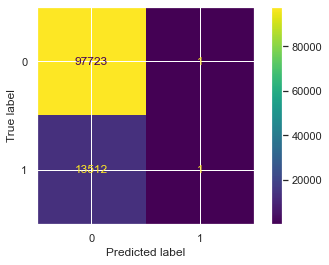

In [82]:
plot_confusion_matrix(log_model, x_test, y_test)

In [83]:
print(classification_report(pred_logr, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    111235
           1       0.00      0.50      0.00         2

    accuracy                           0.88    111237
   macro avg       0.50      0.69      0.47    111237
weighted avg       1.00      0.88      0.94    111237



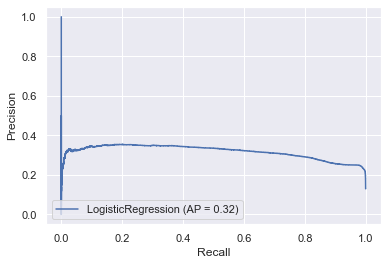

In [84]:
plot_precision_recall_curve(log_model, x_test, y_test)

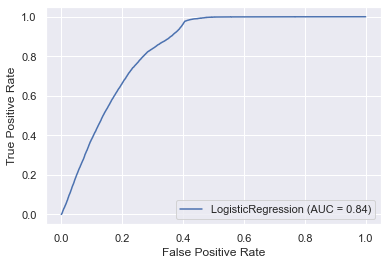

In [85]:
plot_roc_curve(log_model, x_test, y_test)

<h3>6.2 Naive Bayes with Evaluation</h3>

    * Naive Bayes is the most basic and rapid classification method, and it is ideal for big amounts of data. The Naive Bayes classifier has been used effectively in a variety of applications, including spam filtering, text classification, sentiment analysis, and recommender systems.
    * Predicting the class of the test data set is simple and quick. It also excels in multi-class prediction. When the requirement of independence is met, a Naive Bayes classifier outperforms alternative models such as logistic regression and requires less training data.
    * For example, if a fruit is red, spherical, and roughly 3 inches in diameter, it is classified as an apple. Even though these qualities are reliant on each other or on the presence of other features, all of these properties independently add to the likelihood that this fruit is an apple, which is why it is called 'Naive.'
    
 Implementation of the Naive Bayes from scratch at the end of this notebook

In [86]:
NB_model = GaussianNB()  
NB_model.fit(x_train, y_train)
NB_train_score = NB_model.score(x_train,y_train)
NB_test_score = NB_model.score(x_test,y_test)
pred_NB = NB_model.predict(x_test)
NB_acc1 = accuracy_score(pred_NB, y_test)
NB_acc2 = roc_auc_score(pred_NB, y_test)
print('accuracy_score :',NB_acc1)
print('roc_auc_score :',NB_acc2)

accuracy_score : 0.7100964607100155
roc_auc_score : 0.6309177610509062


In [87]:
print(confusion_matrix(y_test, pred_NB))

[[66860 30864]
 [ 1384 12129]]


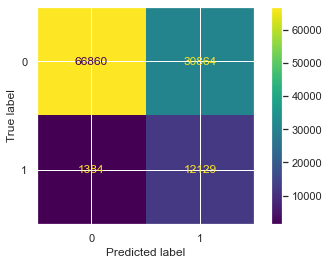

In [88]:
plot_confusion_matrix(NB_model, x_test, y_test)

In [89]:
print(classification_report(pred_NB, y_test))

              precision    recall  f1-score   support

           0       0.68      0.98      0.81     68244
           1       0.90      0.28      0.43     42993

    accuracy                           0.71    111237
   macro avg       0.79      0.63      0.62    111237
weighted avg       0.77      0.71      0.66    111237



In [90]:
# AUC score of Naive Bayes
NB_probability_Values = NB_model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, NB_probability_Values)
print('AUC Score is:', auc)

AUC Score is: 0.8218147902775721


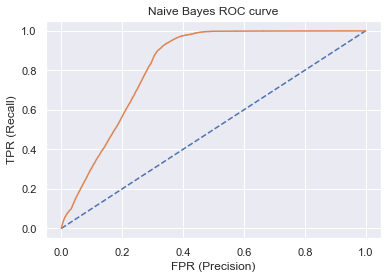

In [91]:
# Calculate roc_curve
plt.title('Naive Bayes ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, NB_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

<h3>6.3 Decision Tree with Evaluation</h3>

    * The decision tree is the most powerful and widely used classification and prediction tool. A Decision tree is a tree structure that looks like a flowchart, with each internal node representing a test on an attribute, each branch representing the test's conclusion, and each leaf node (terminal node) holding a class label.
    * By separating the source set into subgroups based on an attribute value test, a tree may be "trained." This method is done recursively on each derived subset, which is known as recursive partitioning. When the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is finished. The building of a decision tree classifier requires no domain expertise or parameter configuration, making it suitable for exploratory knowledge discovery. High-dimensional data may be handled via decision trees. In general, decision tree classifiers have a high level of accuracy. Decision tree induction is a common inductive way of learning classification information.
    * Decision trees categorise instances by sorting them along the tree from the root to some leaf node that offers the instance's categorization. As indicated in the picture above, an instance is categorised by starting at the root node of the tree, checking the attribute given by this node, and then going down the tree branch according to the value of the attribute. This method is then repeated for the new node-rooted subtree.
    * The decision tree in the above graphic categorises a particular morning based on whether it is suitable for playing tennis and returns the classification linked with the specific leaf. (In this situation, either Yes or No).
    * Criterion = This field specifies how a split's impurity will be measured. The default value is "gini," however "entropy" can also be used as an impurity metric. splitter: The splitter is how the decision tree searches for characteristics to separate. The default setting is "best."
    * entropy = This criterion for measuring information gain is the Gini index and entropy. To divide a node, decision tree algorithms leverage information gain. Gini and entropy are both measurements of a node's impurity. The entropy of the parent node less the sum of the weighted entropies of the child nodes equals information gain.
    * Splitter = This is how the decision tree looks for a split in the features. The default setting is "best." That is, the algorithm evaluates all of the attributes for each node and selects the optimal split. When you set the splitter option to "random," a random subset of characteristics is examined.
    * random = It regulates the estimator's unpredictability. If no random state is provided, DecisionTreeRegressor adds a random integer to it. But the trouble is, every time you run the model, this random number changes, resulting in different findings each time.
    * max_depth = The maximum depth of the tree that will be constructed is controlled by this property. It is also known as the length of the longest path from a tree root to a leaf. The depth of the root node is believed to be zero.
    
 Implementation of the Decision Tree from scratch is at the end of this notebook

In [92]:
model_DTC = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth=4)  
model_DTC.fit(x_train, y_train)
DTC_train_score = model_DTC.score(x_train,y_train)
DTC_test_score = model_DTC.score(x_test,y_test)  
pred_DTC =  model_DTC.predict(x_test)
DTC_acc1 = accuracy_score(pred_DTC, y_test)
print('accuracy_score :',DTC_acc1)

accuracy_score : 0.8785206361192769


In [93]:
print(confusion_matrix(y_test, pred_DTC))

[[97724     0]
 [13513     0]]


In [94]:
print(classification_report(y_test, pred_DTC))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     97724
           1       0.00      0.00      0.00     13513

    accuracy                           0.88    111237
   macro avg       0.44      0.50      0.47    111237
weighted avg       0.77      0.88      0.82    111237



In [95]:
# AUC score of Decision Tree
DT_probability_Values = model_DTC.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, DT_probability_Values)
print('AUC Score is:', auc)

AUC Score is: 0.818146789068386


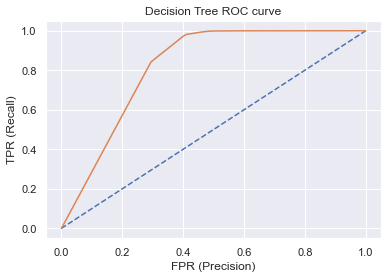

In [96]:
# Calculate roc_curve
plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, DT_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

<h3>6.4 Random Forest Classifier with Evaluation</h3>

    * Random forest is a Supervised Machine Learning Algorithm frequently utilised in Classification and Regression applications. It constructs decision trees from several samples and uses their majority vote for classification and average for regression.
    * One of the most essential characteristics of the Random Forest Algorithm is that it can handle data sets with both continuous variables (as in regression) and categorical variables (as in classification). It outperforms other algorithms in categorization tasks.
    * The term "ensemble" refers to the combination of numerous models. As a result, rather than a single model, a group of models is utilised to create predictions.
    * Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.
    * Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST
    * Random forest outperforms bagging because it decorrelates the trees by splitting on a random subset of characteristics. This indicates that the model analyses just a limited subset of the model's characteristics at each split of the tree rather than all of the model's features.
    * Random Forests are frequently used in data science workflows for feature selection. The reason for this is that the tree-based methods utilised by random forests naturally rank by how effectively they increase node purity. As a result, we may build a subset of the most essential properties by trimming trees below a certain node.
    * Random search is a strategy that uses random hyperparameter combinations to discover the optimum solution for the created model. It is similar to grid search, however it has shown to produce greater results in comparison. The disadvantage of random search is that it produces a significant level of volatility during computation.
    * The Grid Search once again outperformed the Random Search. This is most likely owing to the data set's limited size (only 2000 samples). With bigger data sets, it's best to use a Randomized Search instead.
    * ***Hyperparameter tuning*** = The practise of tweaking the parameters given as tuples when building machine learning models is known as hyperparameter tuning. These parameters are defined by us and can be changed as desired by the programmer. These parameters are never learned by machine learning algorithms. These are tweaked in order for the model to perform well. The goal of hyperparameter tuning is to discover such parameters where the model's performance is highest or where the model's performance is best and the error rate is lowest. For the random forest classifier model, we define the hyperparameter as given below. These parameters are randomly tweaked, and the results are validated.
    * Criterion = This field specifies how a split's impurity will be measured. The default value is "gini," however "entropy" can also be used as an impurity metric. splitter: The splitter is how the decision tree searches for characteristics to separate. The default setting is "best." This criterion for measuring information gain is the Gini index and entropy. To divide a node, decision tree algorithms leverage information gain. Gini and entropy are both measurements of a node's impurity. The entropy of the parent node less the sum of the weighted entropies of the child nodes equals information gain.
    * max_depth = The maximum depth of each tree in the forest is represented by max depth. The deeper the tree, the more splits it has and the more information it collects about the data. Each decision tree is fitted with depths ranging from 1 to 32, and the training and test errors are shown.
    * min samples leaf = is a variable. The bare minimum of samples required to be present at a leaf node. This option is identical to min samples splits, except it describes the minimum number of samples at the leafs, the tree's base.
    * min_samples_split = indicates the bare minimum of samples necessary to separate an internal node This might range from taking at least one sample at each node to taking all samples at each node.
    * n_estimators = This is the amount of trees you wish to construct before calculating the maximum voting or prediction averages. A greater number of trees improves speed but slows down your code.
    
 Implementation of the Random Forest from scratch is at the end of this notebook

In [97]:
# Initialize the parameters for param_distributions for Randomized Search CV
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

    * estimator = a kind of object that implements the "fit" and "predict" methods For each parameter setting, an object of that kind is created.
    * param_distributions = A dictionary with the names of the parameters (strings) as keys and distributions or lists of parameters to attempt. Distributions must have a rvs sampling technique (such as those from scipy.stats.distributions). If a list is provided, it is evenly sampled.
    * n_iter = The number of parameter settings sampled. n iter trades off runtime vs solution quality.
    * cv = Optional integer or cross-validation generator. If an integer is provided, it represents the number of folds (default 3). Specific cross-validation objects can be supplied; for a list of such objects, see the sklearn.cross validation module.
    * verbose = Controls the level of verbosity: the greater the level, the more messages.
    * random_state = Random state is used to establish the seed for the random generator, ensuring that the results can be replicated. Because the nature of dividing the data into train and test is randomised, you will obtain different data allocated to the train and test data unless you can adjust for the random factor.
    * n_jobs = The number of tasks that will run concurrently.

In [98]:
model_RFC = RandomForestClassifier()
RF_model = RandomizedSearchCV(estimator = model_RFC, param_distributions = parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
RF_model.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 13.6min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [99]:
pred_RF = RF_model.predict(x_test)
RF_acc1 = accuracy_score(pred_RF, y_test)
print('accuracy_score :',RF_acc1)

accuracy_score : 0.878529625933817


In [100]:
print(confusion_matrix(y_test, pred_RF))

[[97724     0]
 [13512     1]]


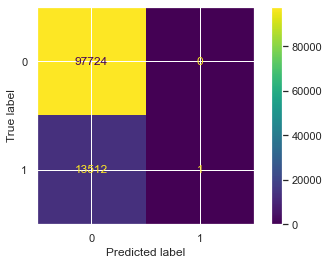

In [101]:
plot_confusion_matrix(RF_model, x_test, y_test)

In [102]:
print(classification_report(pred_RF, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    111236
           1       0.00      1.00      0.00         1

    accuracy                           0.88    111237
   macro avg       0.50      0.94      0.47    111237
weighted avg       1.00      0.88      0.94    111237



In [103]:
# AUC score of Random Forest
RF_probability_Values = RF_model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, RF_probability_Values)
print('AUC Score is:', auc)

AUC Score is: 0.8561533741131002


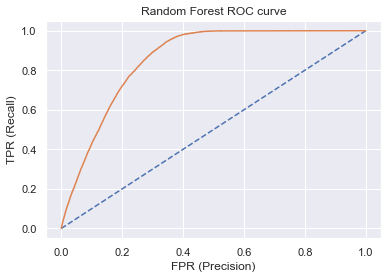

In [104]:
# Calculate roc_curve
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, RF_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

<h3>6.5 XGBoost Classifier with Evaluation</h3>

    * XGBoost is a scalable machine learning system for tree boosting that is based on a tree-based ensemble machine learning algorithm. XGBoost is an abbreviation for Extreme Gradient Boosting. It finds the optimum tree model by using more precise approximations.
    * In the scikit-learn framework, XGBoost offers a wrapper class that allows models to be handled as classifiers or regressors. XGBClassifier is the name of the XGBoost classification model. We can build it and then fit it to our training dataset. The scikit-learn API and the model are used to fit models.
    * The XGBoost technique works well for a variety of regression and classification predictive modelling challenges. It is a fast implementation of the stochastic gradient boosting technique with a variety of hyperparameters for fine-grained control over the model training operation.
    * I've always loved the boosting powers that this approach instils in prediction models. I uncovered a slew of benefits:

    * Regularization: Because most GBM implementations lack regularisation, such as XGBoost, it also aids in reducing overfitting.
    In fact, XGBoost is also referred to as a'regularized boosting' approach.
    * Parallel Processing: XGBoost uses parallel processing and is much quicker than GBM.
    But, because boosting is a sequential operation, how can it be parallelized? We know that each tree can only be created after the one before it, so what prevents us from creating a tree out of all cores? 
    XGBoost now supports Hadoop implementation.
    * High adaptabilit: Users can create specific optimization targets and assessment criteria in XGBoost. This adds an entirely new dimension to the model, and there is no limit to what we may do.
    * Handling Missing Values: XGBoost has a procedure for dealing with missing values. The user must offer a value that differs from the other observations and pass it as a parameter. As it meets a missing value on each node, XGBoost tries different things and learns which path to follow for missing values in the future.
    * Tree Pruning: When a GBM meets a negative loss in the split, it will cease dividing the node. As a result, it is more of a greedy algorithm. XGBoost, on the other hand, divides up to the max depth set before pruning the tree backwards and removing splits beyond which no positive benefit is obtained. Another advantage is that a split of negative loss, say -2, can occasionally be followed by a split of positive loss, say +10. GBM would come to a halt when it reached -2. XGBoost, on the other hand, will dig deeper and observe a combined impact of +8 of the split and maintain both.
    * Built-in Cross-Validation: XGBoost allows the user to do cross-validation at each iteration of the boosting process, making it simple to obtain the precise optimal number of boosting iterations in a single run. In contrast to GBM, we must execute a grid-search and only a restricted number of parameters may be examined.
    * Continue on Existing Model: The user can begin training an XGBoost model from the previous run's last iteration. This can be a substantial benefit in some situations. This capability is also available in the GBM implementation of sklearn, thus they are on the same page.
    
 Implementation of XGBoost from scratch at the end of the notebook

In [105]:
for column in categorical_features:
    x_train[column] = x_train[column].astype('float')
    x_test[column] = x_test[column].astype('float')

    * max_depth = The maximum depth can be provided in the max depth parameter of the XGBClassifier and XGBRegressor wrapper classes for XGBoost. This property accepts an integer value and has a default value of 3.
    * gamma = In gradient boosting, it is a pseudo-regularization hyperparameter. In mathematics, "Gamma" is known as the "Lagrangian multiplier" (complexity control). The more Gamma, the greater the regularisation. The default value is 0. (no regularization).
    * reg_alpha = The characteristics that raise the cost function are penalised by reg alpha. That is, it identifies traits that do not improve accuracy. However, this smoothes the forecast line. I also boost reg alpha > 30 on some cases since it decreases both overfitting and test error.
    * reg_lambda = This is in charge of L2 regularisation on leaf weights. Alpha is in charge of L1 regularisation of leaf weights. max depth: This is a positive integer number that determines how deep each tree grows during any boosting cycle.
    * colsample_bytree = colsample bytree is the column subsample ratio for generating each tree. Subsampling occurs once for each tree built. Columns are drawn from the collection of columns selected for the current tree. colsample bynode is the column subsample ratio for each node (split).
    * min_child_weight = In a child, the minimal total of instance weight (hessian) is required. If the tree partition phase produces a leaf node with a total of instance weights less than min child weight, the construction process will stop dividing further.

In [106]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

Below function describes the whole XGBoost classifier model. And this model will be used on number of trials to find out the best hyperparameters on top of that the model will be fit.

In [107]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    y_score = clf.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }

In [108]:
# trials will contain logging information
trials = Trials()

In [109]:
best_hyperparameters = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC-AUC Score:                                                                                                         
0.8541492745342063                                                                                                     
SCORE:                                                                                                                 
0.8785116463047368                                                                                                     
ROC-AUC Score:                                                                                                         
0.8524897324695202                                                                                                     
SCORE:                                                                                                                 
0.8785116463047368                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.854447749160594                                                                                                      
SCORE:                                                                                                                 
0.878529625933817                                                                                                      
ROC-AUC Score:                                                                                                         
0.8553337526826019                                                                                                     
SCORE:                                                                                                                 
0.8785026564901967                                                                                                     
ROC-AUC Score:                          

ROC-AUC Score:                                                                                                         
0.8552714798811325                                                                                                     
SCORE:                                                                                                                 
0.8784936666756564                                                                                                     
ROC-AUC Score:                                                                                                         
0.8552386778794684                                                                                                     
SCORE:                                                                                                                 
0.8784936666756564                                                                                                     
ROC-AUC Score:                          

In [110]:
print("The best hyperparameters are:", best_hyperparameters)

The best hyperparameters are: {'colsample_bytree': 0.702824321053292, 'gamma': 1.0002422354246743, 'max_depth': 11.0, 'min_child_weight': 5.0, 'reg_alpha': 48.0, 'reg_lambda': 0.25268236023005797}


In [111]:
xgb_model = xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 11, gamma = 1.0530620551305279, reg_lambda = 0.6785611252753314,
                            reg_alpha = 48.0, min_child_weight=9.0, colsample_bytree = 0.5823095614753738 )

In [112]:
xgb_model.fit(x_train,y_train)

[10:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5823095614753738,
              enable_categorical=False, gamma=1.0530620551305279, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=11,
              min_child_weight=9.0, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=48.0, reg_lambda=0.6785611252753314,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [113]:
# Save the model in pickle file
filename = 'E:/PIP_Devmallya/Week_1/Problem_1/xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [114]:
pred_xgb = xgb_model.predict(x_test)
xgb_acc1 = accuracy_score(pred_xgb, y_test)
print('accuracy_score :',xgb_acc1)

accuracy_score : 0.8785116463047368


In [115]:
print(confusion_matrix(y_test, pred_xgb))

[[97547   177]
 [13337   176]]


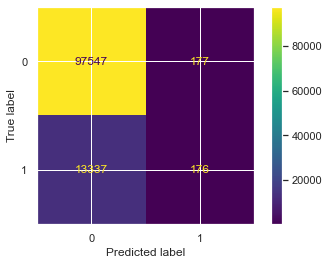

In [116]:
plot_confusion_matrix(xgb_model, x_test, y_test)

In [117]:
print(classification_report(pred_xgb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    110884
           1       0.01      0.50      0.03       353

    accuracy                           0.88    111237
   macro avg       0.51      0.69      0.48    111237
weighted avg       1.00      0.88      0.93    111237



In [118]:
XGB_probability_Values = xgb_model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, XGB_probability_Values)
print ('Area under curve (AUC): ', auc)

Area under curve (AUC):  0.859064839615557


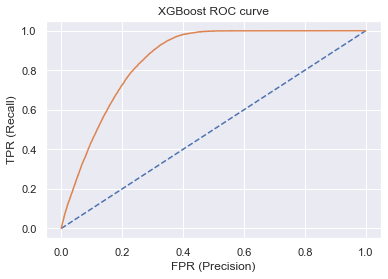

In [119]:
plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, XGB_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

<h3>6.6 Light GBM with Evaluation</h3>

    * Light Gradient Boosted Machine, or LightGBM for short, is an open-source toolkit that implements the gradient boosting technique in an efficient and effective manner.
    * LightGBM is a framework for gradient boosting that use tree-based learning techniques. It is intended to be widely distributed and efficient, with the following benefits: Increased training pace and efficiency. Parallel, distributed, and GPU learning are all supported. Capable of managing enormous amounts of data.
    * LightGBM is dubbed "Light" due of its processing power and ability to deliver findings quickly. It requires less memory to execute and can handle enormous volumes of data. The most commonly utilised algorithm in hackathons since the program's goal is to achieve high accuracy while also bracing GPU leaning.
    * LightGBM is a high-performance gradient boosting framework based on decision tree techniques that may be used for ranking, classification, and a variety of other machine learning applications.
    * Deal with Over-fitting.
    * Gives better accuracy.
    * LightGBM uses leaf-wise tree growth, whereas XGBoost uses level-wise tree development. As a result, in practise, those two approaches produce different trees. In this case, leaf-wise is generally faster than level-wise. As a result, testing show that LightGBM is nearly ten times quicker than XGBoost.
    * learning_rate = The step size or "learning rate" is the amount by which the weights are adjusted during training. The learning rate, in particular, is an adjustable hyperparameter used in neural network training that has a tiny positive value, often in the range of 0.0 to 1.0.
    * Low LR = If you set your learning rate too low, training will move very slowly since you are making very little changes to the weights in your network. However, if you set your learning rate too high, it might result in unwanted divergent behaviour in your loss function. 3e-4 is without a doubt Adam's best learning rate.
    * High LR = A learning rate that is too high will cause the learning to hop over minima, whereas a learning rate that is too low will either take too long to converge or become trapped in an undesirable local minimum. n.
    
  Implementation of Light GBM from scratch at the end of the notebook

In [120]:
LGBMC_model = LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03,
                     n_estimators=600, objective='binary', reg_alpha=0.1,
                     random_state=101,reg_lambda=0.8)

In [121]:
LGBMC_model.fit(x_train,y_train)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03, n_estimators=600,
               objective='binary', random_state=101, reg_alpha=0.1,
               reg_lambda=0.8)

    * During each cycle, ShuffleSplit will randomly select your whole dataset to generate a training set and a test set. The test size and train size options determine the size of the test and training test sets for each cycle.
    * Iterator for random permutation cross-validation. Produces indices for dividing data into training and test sets.

In [122]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(LGBMC_model, x_test, y_test, cv=cv,scoring='roc_auc')
print('Validation Score:', scores.mean())

Validation Score: 0.8584532339513746


In [123]:
pred_LGBMC = LGBMC_model.predict(x_test)
LGBMC_acc1 = accuracy_score(pred_LGBMC, y_test)
print('accuracy_score :', LGBMC_acc1)

accuracy_score : 0.8787094222246195


In [124]:
print(confusion_matrix(y_test, pred_LGBMC))

[[97606   118]
 [13374   139]]


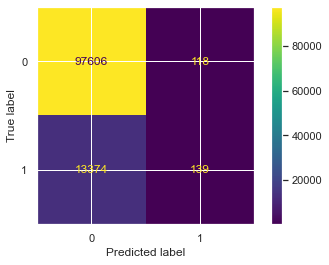

In [125]:
plot_confusion_matrix(LGBMC_model, x_test, y_test)

In [126]:
print(classification_report(pred_LGBMC, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    110980
           1       0.01      0.54      0.02       257

    accuracy                           0.88    111237
   macro avg       0.50      0.71      0.48    111237
weighted avg       1.00      0.88      0.93    111237



In [127]:
LGBMC_probability_Values = LGBMC_model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, LGBMC_probability_Values)
print ('Area under curve (AUC): ', auc)

Area under curve (AUC):  0.8594816748957627


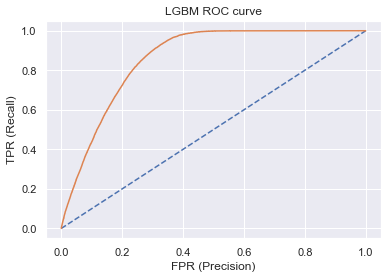

In [128]:
plt.title('LGBM ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
fpr,tpr, threshold = roc_curve(y_test, LGBMC_probability_Values)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

In [155]:
y_test.value_counts()

0    97724
1    13513
Name: Response, dtype: int64

Based on the given statistics, we may estimate that we properly predicted 70% of the class. Our Roc auc score is 85%, indicating that the model can discriminate between negative and positive classes. We can see from the confusion matrix that the number of false negatives is quite low, meeting our issue statement.

# 7. Models which perform better

Accuracy of Logistic Regression :  0.8785206361192769
Accuracy of Naive Bayes :  0.7100964607100155
Accuracy of Decision Tree :  0.8785206361192769
Accuracy of Random Forest Classifier with RandonSearchCV :  0.878529625933817
Accuracy of XGBoost Classifier  :  0.8785116463047368
Accuracy of Light GBM  :  0.8787094222246195


(0.6, 1.0)

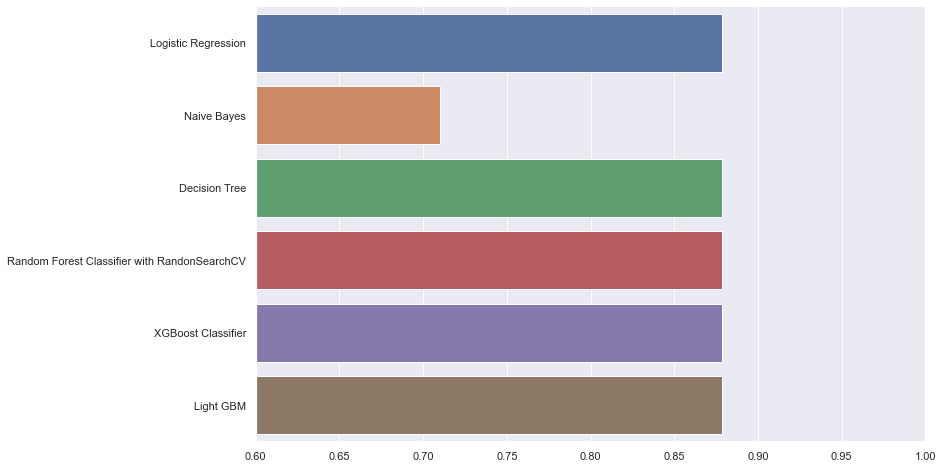

In [147]:
print("Accuracy of Logistic Regression : ",log_acc1)
print("Accuracy of Naive Bayes : ",NB_acc1)
print("Accuracy of Decision Tree : ",DTC_acc1)
print("Accuracy of Random Forest Classifier with RandonSearchCV : ",RF_acc1)
print("Accuracy of XGBoost Classifier  : ",xgb_acc1)
print("Accuracy of Light GBM  : ",LGBMC_acc1)
models_acc=[log_acc1,NB_acc1,DTC_acc1,RF_acc1,xgb_acc1,LGBMC_acc1]
names_of_models=['Logistic Regression', 'Naive Bayes', 'Decision Tree','Random Forest Classifier with RandonSearchCV', 'XGBoost Classifier', 'Light GBM']
sns.barplot(y=names_of_models,x=models_acc)
plt.gcf().set_size_inches(12,8)
plt.xlim([0.6,1.0])

All the models are giving same accuracy score of 88% even after hyperparameter tuning using cross validation except Naive Bayes. But we will use LightGBM

    We took LightGBM model for this classification because faster training speed and improved efficiency: Light GBM employs a histogram-based technique, which buckets continuous feature values into discrete bins, speeding up the training operation. Reduced memory utilisation: Converts continuous data to discrete bins, resulting in decreased memory usage.

# 8. Submissions

In [148]:
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lesser_than_1_Year,Vehicle_Age_greater_than_2_Years,Vehicle_Damage_Yes
0,1,-0.890089,1,-1.170327,1,0.070633,0.7393486379778974,-1.211054,1,0,0
1,1,0.079795,1,0.116590,0,0.066321,-1.927487169651757,-0.517782,0,0,1
2,1,0.532408,1,0.116590,0,0.079717,0.2243734475390676,0.534079,0,0,1
3,1,-0.954748,1,0.040889,1,0.073978,0.7393486379778974,0.390643,1,0,1
4,1,-0.760771,1,0.116590,1,0.120293,0.7393486379778974,1.705469,1,0,0


In [149]:
# Change the type of the columns
df_test['Gender'] = df_test['Gender'].astype('int')
df_test['Driving_License'] = df_test['Driving_License'].astype('int')
df_test['Region_Code'] = df_test['Region_Code'].astype('float')
df_test['Previously_Insured'] = df_test['Previously_Insured'].astype('int')
df_test['Policy_Sales_Channel'] = df_test['Policy_Sales_Channel'].astype('float')
df_test['Vehicle_Age_lesser_than_1_Year'] = df_test['Vehicle_Age_lesser_than_1_Year'].astype('int')
df_test['Vehicle_Age_greater_than_2_Years'] = df_test['Vehicle_Age_greater_than_2_Years'].astype('int')
df_test['Vehicle_Damage_Yes'] = df_test['Vehicle_Damage_Yes'].astype('int')

In [150]:
Preds = [pred[1] for pred in LGBMC_model.predict_proba(df_test)]

In [151]:
submission = pd.DataFrame(data = {'id': id, 'Response': Preds})
submission.to_csv('E:/PIP_Devmallya/Week_1/Problem_1/submissions.csv', index = False)
submission.head()

,id,Response
0,381110,0.000625
1,381111,0.264745
2,381112,0.194360
3,381113,0.005331
4,381114,0.000573


# 9. Techniques to Learn

## 9.1 Central Limit Theorem , p-Value , z -Test

<h3>Central Limit Theorem</h3>

    According to CLT, if you have a population with a mean and a standard deviation and take sufficiently large random samples from the population with replacement, the distribution of the sample means will be normally distributed. This holds true whether the source population is normal or skewed, as long as the sample size is high enough (typically n > 30). If the population is regularly distributed, the theory is true even for samples of less than 30.

    CLT asserts that if you have a population with mean, sd, and take sufficiently enough random samples from the population with replacement, the distribution of the sample means will be nearly normally distributed.

    This is true regardless of whether the source population is normal or skewed, as long as the sample size is high enough (typically n > 30). The theory is valid even for samples less than 30 if the population is regularly distributed.

    It should be noted that CLT will be valid when the samples are sufficiently large. If the dataset comprises fewer datapoints, the samples must be tiny, which is not an ideal circumstance for justifying CLT.

<h3>What is the Distribution of Sampling?</h3>

    A sampling distribution is a plot of independently obtained samples from a big dataset with mean and standard deviation. It's essentially a sample distribution plot with related parameters.
    
<h3>Formulation of CLT:</h3>

    CLT is defined for a population(n) if "x" has a finite mean and standard deviation. Where the mean and variance of the sample are,
   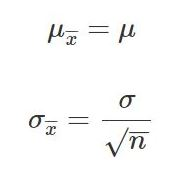
   
    As a result, the average of the sample means will be close to the population mean(), and the sd() will be the average of the sd() of samples divided by the root over of all samples, as indicated above.
    In the preceding sentence, the sample sd() is computed differently than the original sd(). This is known as standard error.
    
<h3>What is the standard error?</h3>

    A statistic's standard error (SE) is the standard deviation of its sample distribution or an approximation of that standard deviation. 
    A population mean's sampling distribution is formed by repeated sampling and recording of the acquired means. 
    This results in a distribution of several means, each with its own mean and standard deviation.

    The variance of the derived sampling distribution is equal to the variance of the population divided by the sample size. 
    This is due to the fact that as sample size grows, sample means cluster closer to the population mean. 
    As a result, the connection between the standard deviation and the standard error of the mean is,
    The variance of the derived sampling distribution is equal to the variance of the population divided by the sample size.

<h3>The Central Limit Theorem with the Normal Distribution:</h3>

    This distribution is shaped like a bell curve. It is sometimes referred to as the Gaussian distribution. This sort of distribution suggests that data around the distribution's mean seems to be more common than data not near the mean.

    In the Central Limit Theorem, the distribution is skewed to the left.

    This sort of data has a very long tail to the left, with the majority of the data concentrated to the right. It is not normal and can signify a variety of situations for various sorts of data that is left-skewed, with the median being to the right of the mean. When we analyse a company's monthly turnover, this might be considered excellent news. It indicates that the company is expanding. If, on the other hand, we are a machine manufacturing firm and this is data from malfunctioning machines built by us, this is bad news. Because the number of malfunctioning equipment is rising, we are suffering a significant loss.

<h3>Right-skewed Distribution:</h3>

    It is, as the name implies, the inverse of the left-skewed distribution. The data has a lengthy tail to the right and is concentrated to the left, with the median on the left side of the mean and the tail to the right. If we use the same business example from the left-skewed notion, we may conclude that the company will go bankrupt shortly. However, if we analyse the manufacturing firm, we can argue that the number of malfunctioning machines is reducing with time. This is how we understand the data distribution.

<h3>Uniform distribution:</h3>

    The likelihood of this sort of distribution is constant. We can presume that they refer to the population distribution from which a random sample is drawn. Now, the Central Limit Theorem applies to all sorts of distributions, with the caveat that the population data must have a limited variance. The Central Limit Theorem may be applied to variables with identical distributions as well as variables with separate distributions. This signifies that the value of one variable is independent of the value of another.

In [3]:
import warnings
warnings.filterwarnings("ignore")
import random
import sidetable
import prettytable
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt

In [4]:
# importing data
df = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/CLT/train.csv')
print("Shape: ",df.shape)
df.head(2)

Shape:  (550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [5]:
#mean of the popullation
mean_pop = df["Purchase"].mean()
std_pop = df["Purchase"].std()
print("μ and σ of overall purchases are {} and {} units respectively.".format(round(mean_pop,2),round(std_pop,2)))

μ and σ of overall purchases are 9263.97 and 5023.07 units respectively.


<h3>z-test</h3>

    The Z-test is a statistical tool for determining whether or not the distribution of test data may be approximated by a normal distribution. It is the approach for determining if two sample means are about the same or different when their variance is known and the sample size is substantial (should be greater than 30).

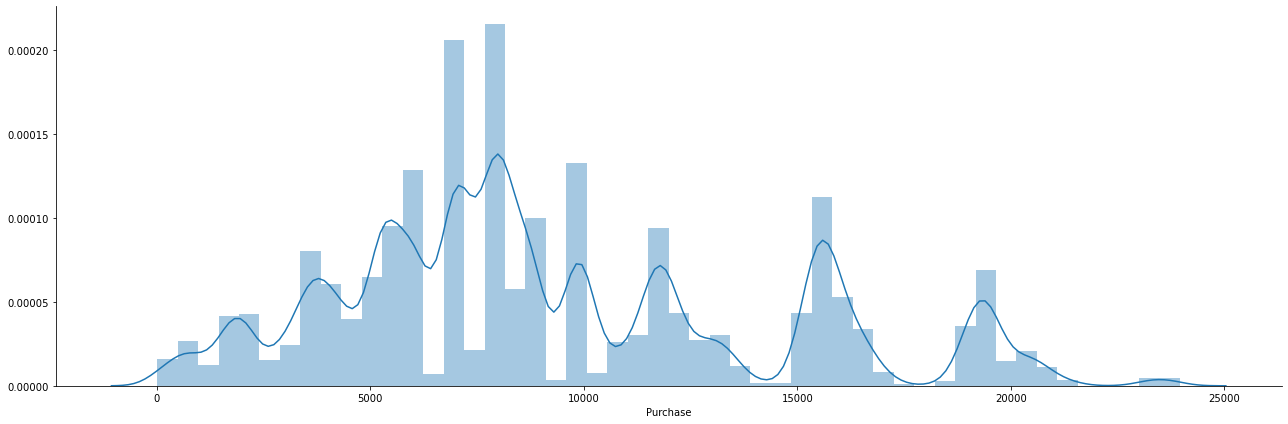

In [6]:
# distribution plot of overall purchase
sns.FacetGrid(df,height=6,aspect=3).map(sns.distplot,"Purchase")
pt.show()

The general distribution is asymetric, as can be seen. Now we must collect more than 30 samples and plot the mean distribution to see if it matches the normal distribution.

<h3>9.2 Normal Distrubution Function</h3>

    * The most frequent distribution function for independent, randomly produced data is the normal distribution, commonly known as the Gaussian distribution. Its well-known bell-shaped curve may be seen in a wide range of statistical reports, from survey analysis and quality control to resource allocation.
    * The mean of a normal distribution is zero, while the standard deviation is one. It has a skew of 0 and a kurtosis of 3. Although all normal distributions are symmetrical, not all symmetrical distributions are normal.

<h3>Assumptions for Samples:</h3>

    1. The sample data should be chosen at random.
    2. Then should be independent of one another. There should be no resemblance between them.
    3. The entire sample size should not exceed 10% of the total data set.
    4. When the original dataset is skewed or asymmetric, the sample size should be suitably big (n > 30).

<h3>Mean Distribution plots:</h3>

    As we can see, the greater the number of samples, the greater the likelihood that the mean distributions are normally distributed. 
    Let's compute the mean and standard deviation of each distribution and see how close it is to the and of the total purchase data.

In [7]:
# function to get sample mean
def sample_mean_distribution(data, samples_count, data_points_count):
    #list to append all samples
    samples_list = list()
    #data in array
    data = np.array(data.values)
    for i in range(0, samples_count):
        samples = random.sample(range(0, data.shape[0]), data_points_count)
        samples_list.append(data[samples].mean())
    #return array of sample mean
    return np.array(samples_list)

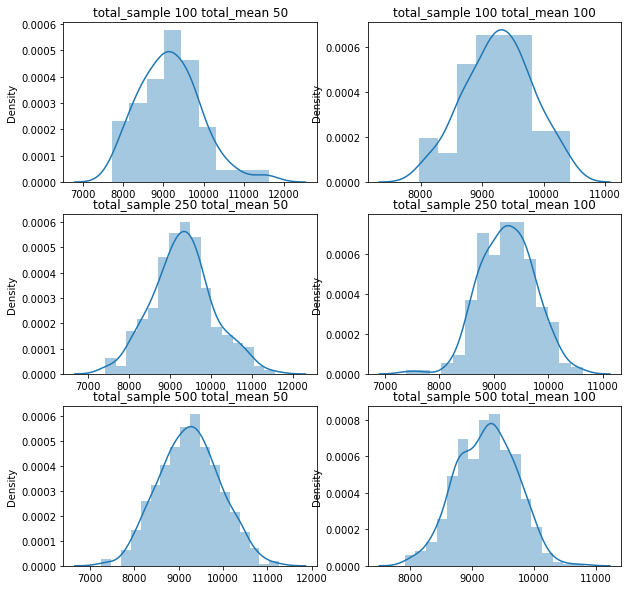

In [8]:
cnt = 0
sample_mean = list()
#setting figures
fg, ax = pt.subplots(nrows=3, ncols=2, figsize=(10, 10))
#list of samples and datapoints combinations
lst = [(100,50),(100,100),(250,50),(250,100),(500,50),(500,100)]
for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_title("total_sample " + str(lst[cnt][0]) + " total_mean " + str(lst[cnt][1]))
        sns.distplot(sample_mean_distribution(df["Purchase"], lst[cnt][0],lst[cnt][1]),ax = ax[i,j])
        sample_mean.append(sample_mean_distribution(df["Purchase"], lst[cnt][0],lst[cnt][1]))
        cnt +=1

As we can see, the greater the number of samples, the greater the likelihood that the mean distributions are normally distributed. Let's compute the mean and standard deviation of each distribution and see how close it is to the and of the total purchase data.

In [9]:
# calculating output
def sample_output(data, population_mean, population_sd,total_sample_points_list):
    df = pd.DataFrame()
    mean_sample = list(); std_sample = list(); std_approx = list(); strings_list = list()
    pop_mean = list(); pop_std = list()
    #calculating sample values
    for idx, val in enumerate(data):
        pop_mean.append(round(population_mean,2))
        pop_std.append(round(population_sd,2))
        mean_sample.append(round(val.mean(),2))
        std_sample.append(round(val.std(),2))
        std_approx.append(round(population_sd/np.sqrt((total_sample_points_list[idx][1])),2))
        strings_list.append("total_sample_" + str(total_sample_points_list[idx][0]) + "_total_mean_"
                            + str(total_sample_points_list[idx][1]))
    df["name"] = pd.Series(strings_list); df["purchase_mean"] = pd.Series(pop_mean)
    df["sample_mean"] = pd.Series(mean_sample); df["purchase_std"] = pd.Series(pop_std)
    df["sample_std"] = pd.Series(std_sample); df["approx_std"] = pd.Series(std_approx)
    
    return df

In [10]:
output_df = sample_output(sample_mean, mean_pop, std_pop,lst)
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std
0,total_sample_100_total_mean_50,9263.97,9229.74,5023.07,697.97,710.37
1,total_sample_100_total_mean_100,9263.97,9288.49,5023.07,550.03,502.31
2,total_sample_250_total_mean_50,9263.97,9237.43,5023.07,696.05,710.37
3,total_sample_250_total_mean_100,9263.97,9232.93,5023.07,478.21,502.31
4,total_sample_500_total_mean_50,9263.97,9309.14,5023.07,721.57,710.37
5,total_sample_500_total_mean_100,9263.97,9246.27,5023.07,491.96,502.31


In [11]:
ptable = prettytable.PrettyTable(["sample_mean"+u"\u2248"+"orig_mean", "sample_std"+u"\u2248"+"approx_std"])
for i in range(0, len(output_df)):
    row = list()
    row.append(str(output_df["sample_mean"][i])+u"\u2248"+str(output_df["purchase_mean"][i]))
    row.append(str(output_df["sample_std"][i])+u"\u2248"+str(output_df["approx_std"][i]))
    ptable.add_row(row)
print(ptable)

+-----------------------+-----------------------+
| sample_mean≈orig_mean | sample_std≈approx_std |
+-----------------------+-----------------------+
|    9229.74≈9263.97    |     697.97≈710.37     |
|    9288.49≈9263.97    |     550.03≈502.31     |
|    9237.43≈9263.97    |     696.05≈710.37     |
|    9232.93≈9263.97    |     478.21≈502.31     |
|    9309.14≈9263.97    |     721.57≈710.37     |
|    9246.27≈9263.97    |     491.96≈502.31     |
+-----------------------+-----------------------+


As the number of samples rises, the sample mean and standard deviation become closer to the original mean and standard deviation. As a result, our technique and observations utilising CLT are sound.

<h3>9.3 Hypothesis Theorem</h3>

    * A statistical hypothesis is a probability-based explanation for the relationship between data populations. A machine learning hypothesis is a proposed model for translating inputs to outputs that approximates a target function.
    * A hypothesis test compares two mutually exclusive propositions about a population to see which one is supported by the sample data the best.
    * There are two types of Hypothesis Theorem:
      * The null hypothesis (H0) is a common provided statement or default stance in statistics that there is no link between two measured cases or no association among groups. In other terms, it is a fundamental assumption or assumption based on issue knowledge. For example, a company's output is equal to 50 units each day, and so on. B1 = 0
      * The alternative hypothesis (H1) is the hypothesis used in hypothesis testing that is opposite to the null hypothesis. For example, a company's output does not equal 50 units each day, and so on. B1 != 0

<h3>How CLT helps in generalizing large datasets?</h3>

    In general, machine learning models approach training data as a combination of deterministic and random components. Let the dependent variable (Y) be made up of these components. 
    Models are usually attempting to represent the dependent variable (Y) as a function of numerous independent variables (X). 
    If the function is sum (or is written as a sum of another function), and the number of X is large, Y should have a normal distribution.
    In this case, ml models attempt to represent the deterministic component as a sum of deterministic independent variables (X): 
    deterministic + random = func(deterministic(1)) +...+ func(deterministic(n)) + model error
    If X explains the whole deterministic component of Y, then the model error represents only the random part and so should have a normal distribution (according to CLT).
    So, if the error distribution is normal, we may conclude that the model is effective and that we can apply linear techniques to the dataset to improve the results. 
    Else some features are absent in the model but have a large enough 
    influence on Y or the model is incorrect.
    
<h3>Statistical Inference:</h3>

    Every day, a Data Scientist or ML engineer makes statistical judgments about a given set of data. 
    This theorem allows us to calculate the likelihood that our sample will vary from the population without taking a fresh sample to compare it against. 
    We don't need to know the characteristics of the entire population to determine the chance that our sample is representative of it.

    As a result, if we don't know the real population mean(), we can deduce the sample mean as our actual mean(). 
    In the above example, if we take 500 samples with 100 data points each, the initially purchased mean is 9262.26 units. 
    
    No…

    Despite the fact that the sample mean is nearly identical to the original mean(), a single number estimate (500 samples with 100 data points) 
    offers no information about the precision and reliability of the estimate in relation to the bigger population.

<b><i>Q. Then, how can we determine the population mean, or, in ML words, how can we infer how skilled the model is predicted to be in practise once we have a final trained model?</i></b>

<b><i>Ans: A confidence interval is a graphical representation of this uncertainty.</i></b>

<h2>What is Confidence Interval?</h2>

    A confidence interval in statistics refers to the likelihood that a population parameter will fall between a set of values for a particular proportion of the time. 
    The degree of uncertainty or certainty in a sampling process is measured by confidence intervals. They can choose from a variety of probability limitations, 
    the most frequent of which are a 95 percent or 99 percent confidence level.

    The confidence interval indicates how certain we are about our results. We can never be certain that the results of any survey or experiment will be replicated. 
    In statistics, 95 percent or 99 percent certainty is commonly regarded "good enough." The confidence interval is that proportion of certainty.

    For example, we polled a group of dog owners to find out how many cans of dog food they buy each year. We tested our statistics at a confidence level of 99 percent 
    and obtained a confidence interval of (200,300). That implies they buy 200 to 300 cans every year. We are quite certain (99 percent is a very high level!) that our results are statistically sound.
    
    When we don't know anything about the huge population parameter, this is useful. Then we'll be unsure about our sample parameter since it lacks accuracy.

<h3>Z-Score:</h3>

    A z-score represents the location of a raw score in terms of its standard deviation unit distance from the mean. 
    The z-score is positive if the value is more than the mean and negative if it is less than the mean.
    
    The Z-test is a statistical tool for determining whether or not the distribution of test data may be approximated by a normal distribution. 
    It is the approach for determining if two sample means are about the same or different when their variance is known and the sample size is substantial (should be greater than 30).
    1. Left-tailed Test: In this test, our region of rejection is located to the extreme left of the distribution. Here our null hypothesis is that the claimed value is less than or equal to the mean population value.
    2. Right-tailed Test: In this test, our region of rejection is located to the extreme right of the distribution. Here our null hypothesis is that the claimed value is less than or equal to the mean population value.
    3. Two-tailed test: In this test, our region of rejection is located to both extremes of the distribution. Here our null hypothesis is that the claimed value is equal to the mean population value.
    
    It is beneficial to normalise the values (raw scores) of a normal distribution by converting them to z-scores for two reasons: 
    1. it allows us to compute the likelihood of a score happening within a standard normal distribution.
    2. It allows us to compare two scores from distinct samples (with different means and standard deviations).

<h3>Calculation:</h3>

    Let 0<α<1, and let (100 * (1-α))% denote the confidence level.
    Suppose we have a standard normal distribution "Z". 
    
    (Z_α/2) denote a z-score with α/2 probability to its right.
    Similarly, let (-Z_α/2) denote a z-score with α/2 probability to its left.
    
    Let α= 0.1, then (Z_α/2) = 1.645 to it's right and (Z_α/2) = -1.645 to it's left.
    
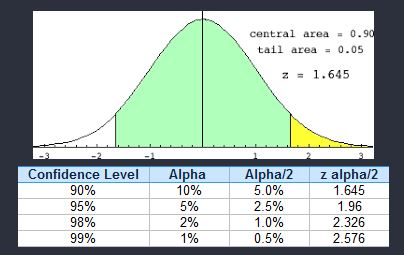

<h3>95% confidence level with known standard deviation:</h3>

    To calculate the limit for a 95 percent confidence level the formula will be,
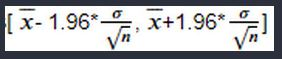    

where x_bar = sample mean,
σ = population standard deviation, 
n = number of samples


    upper 95% limit = x_bar(sample mean) + SE(standard error=σ/sqrt(n)) * ((Z_0.05/2)=1.96)
    lower 95% limit = x_bar(sample mean) - SE(standard error=σ/sqrt(n)) * ((Z_0.05/2)=1.96)

In [12]:
"""getting lower and upper limit of 95% confidence interval with known standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["approx_std"][i])*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["approx_std"][i])*1.96); upper_lim.append(round(upper_limit,2))

#appending values into the dataset    
output_df["lower_limit"] = pd.Series(lower_lim)
output_df["upper_limit"] = pd.Series(upper_lim)

In [13]:
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std,lower_limit,upper_limit
0,total_sample_100_total_mean_50,9263.97,9229.74,5023.07,697.97,710.37,7837.41,10622.07
1,total_sample_100_total_mean_100,9263.97,9288.49,5023.07,550.03,502.31,8303.96,10273.02
2,total_sample_250_total_mean_50,9263.97,9237.43,5023.07,696.05,710.37,7845.10,10629.76
3,total_sample_250_total_mean_100,9263.97,9232.93,5023.07,478.21,502.31,8248.40,10217.46
4,total_sample_500_total_mean_50,9263.97,9309.14,5023.07,721.57,710.37,7916.81,10701.47
5,total_sample_500_total_mean_100,9263.97,9246.27,5023.07,491.96,502.31,8261.74,10230.80


    For each experiment, we can see the calculated mean falls between the lower and upper limit. From this, we can infer 
    that the purchase mean(μ) parameter for the whole dataset lies between 8277.73 and 10246.79, and we are 95% confident 
    about this.

<h3>95% confidence level without standard deviation:</h3>

    To calculate the limit for a 95 percent confidence level without sd the formula will be,
    
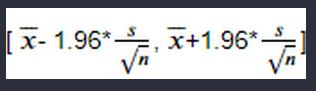

where x_bar = sample mean,
s = sample standard deviation, 
n = number of samples

    upper 95% limit = x_bar(sample mean) + SE(standard error=s/sqrt(n)) * ((Z_0.05/2)=1.96)
    lower 95% limit = x_bar(sample mean) - SE(standard error=s/sqrt(n)) * ((Z_0.05/2)=1.96)

In [14]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*1.96); upper_lim.append(round(upper_limit,2))
#appending values into the dataset    
output_df["lower_limit_wt_sd"] = pd.Series(lower_lim)
output_df["upper_limit_wt_sd"] = pd.Series(upper_lim)

In [15]:
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd
0,total_sample_100_total_mean_50,9263.97,9229.74,5023.07,697.97,710.37,7837.41,10622.07,9036.27,9423.21
1,total_sample_100_total_mean_100,9263.97,9288.49,5023.07,550.03,502.31,8303.96,10273.02,9180.68,9396.30
2,total_sample_250_total_mean_50,9263.97,9237.43,5023.07,696.05,710.37,7845.10,10629.76,9044.49,9430.37
3,total_sample_250_total_mean_100,9263.97,9232.93,5023.07,478.21,502.31,8248.40,10217.46,9139.20,9326.66
4,total_sample_500_total_mean_50,9263.97,9309.14,5023.07,721.57,710.37,7916.81,10701.47,9109.13,9509.15
5,total_sample_500_total_mean_100,9263.97,9246.27,5023.07,491.96,502.31,8261.74,10230.80,9149.85,9342.69


    Here also we can clearly see that the calculated mean falls under the lower and upper boundary for each experiment. 
    Though the margin is very small now, we can say that we are 95% confident about this.

<h3>99% confidence level without standard deviation:</h3>

    To calculate the limit for a 99 percent confidence level without sd the formula will be,
    
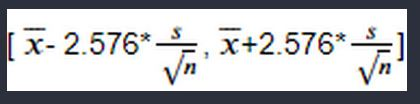

where x_bar = sample mean,
s = sample standard deviation, 
n = number of samples

    upper 99% limit = x_bar(sample mean) + SE(standard error=s/sqrt(n)) * ((Z_0.01/2)=2.576)
    lower 99% limit = x_bar(sample mean) - SE(standard error=s/sqrt(n)) * ((Z_0.01/2)=2.576)

In [16]:
"""getting lower and upper limit of 95% confidence interval without standard deviation of population"""
lower_lim = list(); upper_lim = list()
for i in range(0,len(output_df)):
    lower_limit = output_df["sample_mean"][i] - ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    lower_lim.append(round(lower_limit,2))
    upper_limit = output_df["sample_mean"][i] + ((output_df["sample_std"][i]/np.sqrt((lst[i][1])))*2.576)
    upper_lim.append(round(upper_limit,2))
#appending values into the dataset    
output_df["lower_limit_99"] = pd.Series(lower_lim)
output_df["upper_limit_99"] = pd.Series(upper_lim)

In [17]:
output_df

,name,purchase_mean,sample_mean,purchase_std,sample_std,approx_std,lower_limit,upper_limit,lower_limit_wt_sd,upper_limit_wt_sd,lower_limit_99,upper_limit_99
0,total_sample_100_total_mean_50,9263.97,9229.74,5023.07,697.97,710.37,7837.41,10622.07,9036.27,9423.21,8975.47,9484.01
1,total_sample_100_total_mean_100,9263.97,9288.49,5023.07,550.03,502.31,8303.96,10273.02,9180.68,9396.30,9146.80,9430.18
2,total_sample_250_total_mean_50,9263.97,9237.43,5023.07,696.05,710.37,7845.10,10629.76,9044.49,9430.37,8983.86,9491.00
3,total_sample_250_total_mean_100,9263.97,9232.93,5023.07,478.21,502.31,8248.40,10217.46,9139.20,9326.66,9109.74,9356.12
4,total_sample_500_total_mean_50,9263.97,9309.14,5023.07,721.57,710.37,7916.81,10701.47,9109.13,9509.15,9046.27,9572.01
5,total_sample_500_total_mean_100,9263.97,9246.27,5023.07,491.96,502.31,8261.74,10230.80,9149.85,9342.69,9119.54,9373.00


<h3>p-value</h3>

    When the null hypothesis is believed to be true, the P-value tells us how probable we are to achieve a certain outcome. 
    It is the likelihood of receiving a sample similar to or more extreme than ours if the null hypothesis is right.
    
    The p-value is used to determine the strength of a hypothesis. We construct hypotheses based on a statistical model and use the p-value to compare the model's validity. 
    The T-test is one method for calculating the p-value.

    This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations 'a' equals the population mean, popmean. Consider the following example:

In [19]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print(stats.ttest_1samp(rvs,5.0))

Ttest_1sampResult(statistic=array([-0.63980417, -1.62047154]), pvalue=array([0.52528024, 0.11154963]))


<h3>contrasting two examples</h3>

    In the following instances, we have two samples that might originate from the same or different distribution, and we want to see if they have the same statistical features.

    ttest ind computes the T-test for the means of two independent scores samples. This is a two-sided test for the null hypothesis that the average (expected) values of two independent samples are the same. By default, this test assumes that the populations have equal variances.

    If we observe two independent samples from the same or distinct population, we may utilise this test. Consider the following scenario.

In [21]:
from scipy import stats
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)
print(stats.ttest_ind(rvs1,rvs2))

Ttest_indResult(statistic=0.30154474963014705, pvalue=0.7630619511953879)


    You may try the same thing with a new array of the same length but with a different mean. Change the value of loc and repeat the test.

## 9.4 Ordinary Least Square Method

<h3>9.4 Ordinary Least Square Method</h3>

    * OLS, or Ordinary Least Squares, is a Linear Regression approach for estimating unknown parameters by building a model that minimises the sum of the squared errors between the observed and predicted data.
    * The ordinary least squares (OLS) approach seeks the "least" or smallest sum of squares owing to error. This sum of squares calculates the difference between the model and the data. As a result, OLS is a linear optimization problem with an objective function of the sum of squares owing to error.

    The relationship between a dependent variable (y) and at least one independent variable (x) is established in a linear regression model as follows:



       We must set the values of b 1 and b 0 in the OLS technique so that the total sum of squares of the difference between the estimated and observed values of y is as little as possible.

    The OLS formula is as follows:
    
   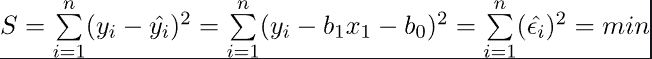
   
    Where,

    y i = the ith observation's projected value
    y i = the ith observation's actual value
    epsilon i = the ith observation's error/residual
    n represents the total number of observations.

    We may take a partial derivative for each coefficient and equal it to zero to find the values of b 0 and b 1 that minimise S.

<h3>Methodology:</h3>

    We begin by defining the variables x and y.

    Next, we'll use the add constant() function to add the constant b 0 to the equation.

    The statsmodels() method's OLS() function.

    To do OLS regression, the api module is utilised. It gives you an OLS object as a result. The fit() function on this object is then used to fit the regression line to the data.

    The summary() function is used to generate a table that contains a detailed description of the regression findings.

In [22]:
import statsmodels.api as sm
import pandas as pd
  
# reading data from the csv
data = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/lr/train (1).csv')
  
# defining the variables
x = data['x'].tolist()
y = data['y'].tolist()
  
# adding the constant term
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.33e-294
Time:                        14:02:17   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.2

    The coefficient of determination is expressed as R-squared. It is the fraction of the dependent variable's volatility that can be predicted or explained.

    Adjusted R-squared is a modified version of R-squared that takes into account the number of independent variables in the model. When we insert new variables that strengthen the model, the value of adj. R-squared rises.

    The F-statistic is the ratio of the model's mean squared error to the residuals' mean squared error. It determines the model's overall importance.

    The coefficients of the independent variables as well as the constant term in the equation are referred to as coef.

    t: the t-value. statistic's It's the proportion of the difference between a parameter's estimated and hypothesised value to the standard error.

    The coefficient of x and the constant term are noted in the results table. The regression line is displayed using matplotlib once these values are inserted in the original equation.

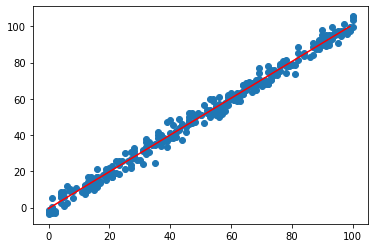

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
# reading data from the csv
data = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/lr/train (1).csv')
  
# plotting the original values
x = data['x'].tolist()
y = data['y'].tolist()
plt.scatter(x, y)
  
# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = data['x'].max()
min_x = data['x'].min()
  
# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)
  
# the substituted equation
y = 1.0143 * x - 0.4618
  
# plotting the regression line
plt.plot(y, 'r')
plt.show()

## 9.5 Linear Regression & Multiple Linear Regression

<h3>Linear Regression</h3>

    * Linear Regression is a supervised learning-based machine learning technique. It carries out a regression job. Based on independent variables, regression models a goal prediction value. It is mostly used to determine the link between variables and predicting. Different regression models differ in terms of the type of connection they evaluate between dependent and independent variables, as well as the number of independent variables utilised.
    * Linear regression is used to predict the value of a dependent variable (y) based on a given independent variable (x). As a result, this regression approach determines a linear connection between x (input) and y. (output). As a result, the name Linear Regression was chosen.
    * Best Fit Line = The cost function for Linear Regression is the one with the lowest Sum of Squares of Errors. Calculate the sum of squares of mistakes for all feasible lines. The best fit line is the one with the lowest sum of squared errors.
    


      B0 = Line of intercept
      B1 = Coefficients
    * We get the best fit line once we locate the best B1 and B0 values. So, when we eventually use our model to forecast, it will predict the value of y based on the input value of x.
    * Residuals = A residual is a measure of how distant a point is from the regression line vertically. Simply put, it is the difference between an anticipated and observed value. Figure 1 shows how to plot residuals against the line of greatest fit. The residuals are shown by the vertical lines.
    * Residual square error = A residual is a measure of how distant a point is from the regression line vertically. Simply put, it is the difference between an anticipated and observed value.
    * RMSE = The standard deviation of the residuals is defined as the Root Mean Square Error (RMSE) (prediction errors). Residuals are a measure of how far away the data points are from the regression line; RMSE is a measure of how spread out these residuals are. In other words, it indicates how concentrated the data is around the line of greatest fit.
    * Gradient Descent = is the method of minimising a function by following the cost function's gradients. This entails understanding the cost form as well as the derivative, so that at a given position, you can determine the gradient and travel in that direction, e.g. downward towards the least value.
    * The cost function calculates the difference between expected and actual values, which is expressed as a single real number. A linear regression's cost function is root mean squared error or mean squared error.
    * Bias-Variance tradeoff = "Bias and variation are mutually reinforcing." A rise in one will result in a fall in the other, and vice versa. As a result, achieving the proper balance of values is referred to as the Bias-Variance Tradeoff. A perfect algorithm should not underfit or overfit the data.
    * The bias is calculated as the difference between the average forecast and the real value – true value minus mean (predictions) The average difference from the average prediction is defined as — mean(prediction minus mean(predictions))
    * R-Squared = It is a linear regression model goodness-of-fit metric. This statistic shows how much of the variance in the dependent variable the independent factors explain collectively. R-squared is a handy 0–100% scale that assesses the strength of the association between your model and the dependent variable. ons))
    


<h3>Linear Regression using least square</h3>

    It is a statistical method for modelling the connection between a dependent variable and one or more independent variables. Simple linear regression is used when there is only one independent variable. Multiple linear regression is used when there are more than one independent variable. In this article, we will look at simple linear regression.
    Assume that X is the independent variable and that Y is the dependent variable. A linear relationship between these two variables defined from above equation.
    This is the equation for the line you learned in high school. The slope of the line is b1, and the y intercept is b0. Today, we'll utilise this equation to train our model with a given dataset and predict the value of Y for every given X.

    We will find the value of b1 and b0 that yields the smallest error for the supplied dataset. We will use the Least Squares approach to do this.

    The only thing left to do now that we've discovered the loss function is to reduce it. This is accomplished by calculating the partial derivative of L, equating it to zero, and then calculating an expression for b1 and b0. After we complete the math, we get the following equations:
   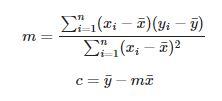
   
     In this case, x bar represents the mean of all the values in the input X, and y bar represents the mean of all the values in the intended output Y. The Least Squares approach is used in this case. Now we'll put it all together in Python and make predictions.

In [46]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

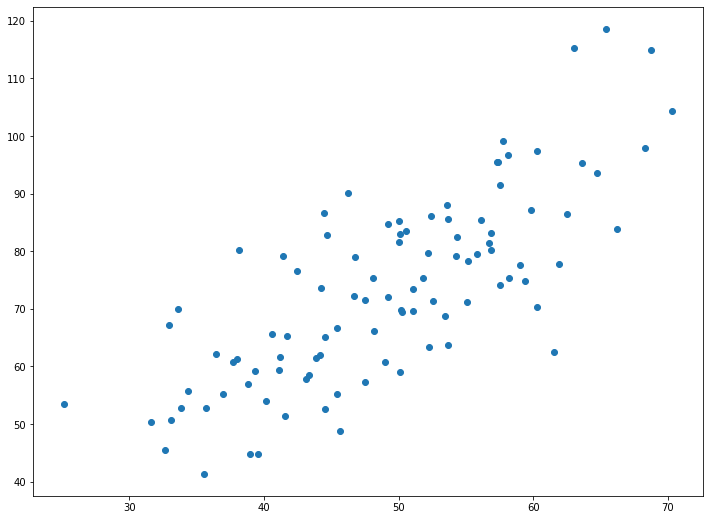

In [47]:
# Preprocessing Input data
data = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [48]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1.2873573700109313 9.908606190326495


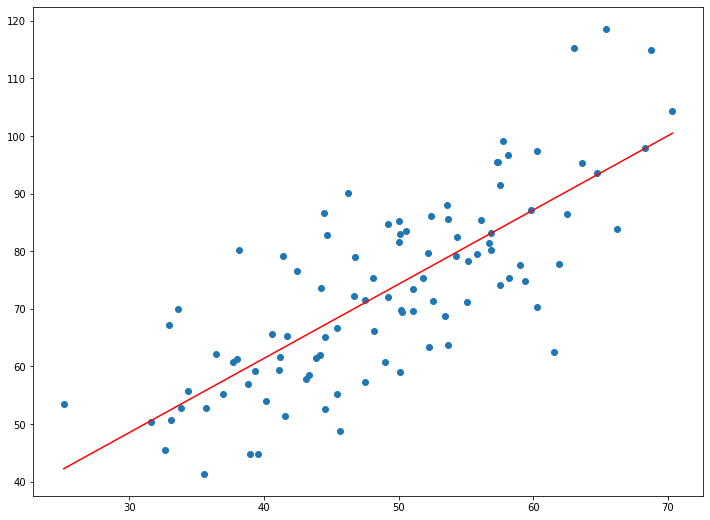

In [49]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

<h3>Using Gradient Descent</h3>

    In our case, gradient descent is an optimization technique that seeks to alter the parameters in order to minimise the cost function.

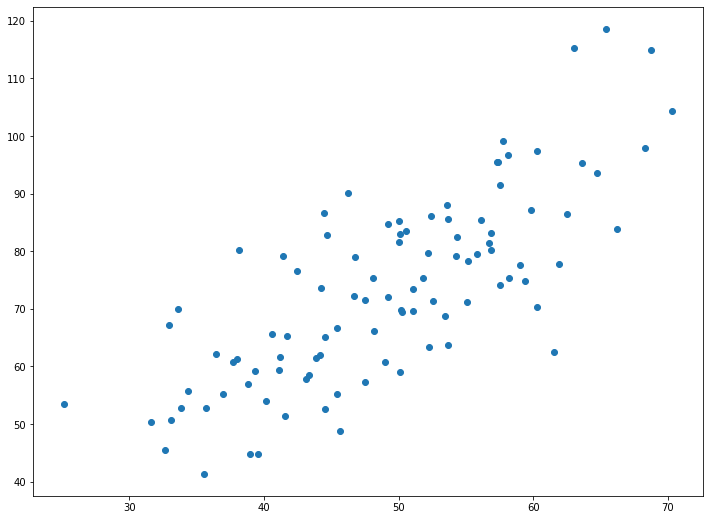

In [50]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [51]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753734


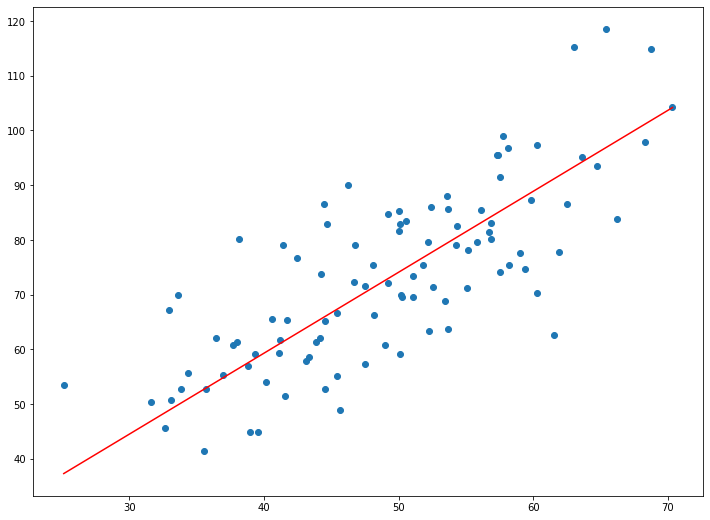

In [52]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

<h3>Multiple Linear Regression</h3>

    * Multiple linear regression is a regression model that uses a straight line to evaluate the connection between a quantitative dependent variable and two or more independent variables.
    * y = B0 + B1X1 + B2X2 + ... + BnXn
    * A regression coefficient's sign indicates whether there is a positive or negative relationship between each independent variable and the dependent variable. A positive coefficient shows that when the value of the independent variable grows, so does the mean of the dependent variable.
    * If other predictor variables are present, all coefficients will be altered. The T-statistic will vary, if only because the joint variance of the dependent variable Y has changed. Because all of the coefficients are estimated simultaneously, every new variable modifies all of the other coefficients in the model.
    * Overfitting a model occurs when a statistical model begins to describe random errors in the data rather than the correlations between variables. This issue arises when the model is very sophisticated. Overfit regression models include too many variables in relation to the amount of data.
    * Overfitting occurs when a model models the training data too well. This implies that the model picks up on noise or random oscillations in the training data and learns them as ideas. The issue is that these notions do not apply to fresh data and have a detrimental influence on the models' capacity to generalise.
    * Underfitting is a data science scenario in which a data model is unable to effectively represent the connection between the input and output variables, resulting in a high error rate on both the training set and unseen data.
    * In a regression model, multicollinearity arises when two or more independent variables are significantly associated with one another. In a regression model, this indicates that one independent variable may be predicted from another independent variable.
    * Remove some of the highly correlated independent variables to cope with multicollinearity. Linearly combine the independent variables, for example, by adding them all together. Conduct a highly correlated variable study, such as principle components analysis or partial least squares regression.
    * The process of discovering and selecting a subset of input variables that are most relevant to the target variable is known as feature selection. The instance where there are numerical input variables and a numerical objective for regression predictive modelling is perhaps the simplest case of feature selection.
    * The variance inflation factor (VIF) quantifies the degree of multicollinearity in a collection of multivariate regression variables. The VIF for a regression model variable is equal to the ratio of the total model variance to the variance of a model with only that single independent variable.
    * Recursive feature elemination = RFE is a feature selection approach that fits a model and eliminates the weakest feature (or features) until the desired amount of features is attained. RFE needs a certain amount of features to be retained, but it is frequently unknown how many features are valid in advance.
    * Rescaling = A vector means to add or subtract a constant & then multiply or divide by a constant, as we would do to change the units of measurement of the data, for ex, to convert a temp from celsius to farenheit.
    * The values are rescaled to a range of [0,1] after normalisation. also known as min-max scaled Data is rescaled to have a mean () of 0 and a standard deviation () of 1. As a result, it produces a typical graph.

In [53]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
# Load the dataframe
df = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/energy.txt')
df.head()

,T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       7176 non-null   float64
 1   V       7176 non-null   float64
 2   AP      7176 non-null   float64
 3   RH      7176 non-null   float64
 4   EP      7176 non-null   float64
dtypes: float64(5)
memory usage: 280.4 KB


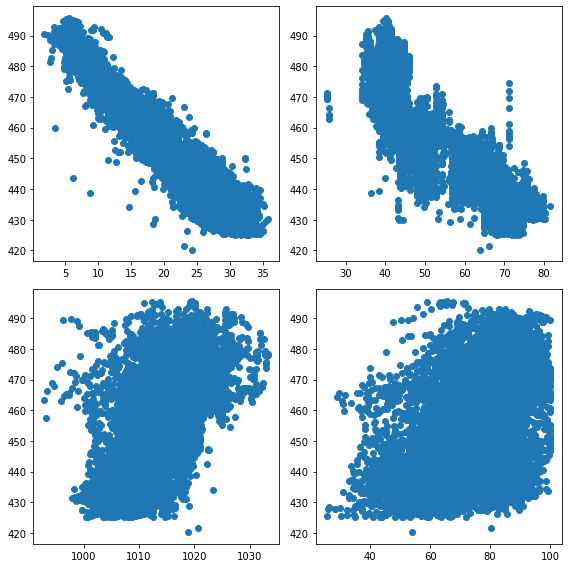

In [57]:
# Here out target variable is EP. So we will plot graphs corresponding to each feature
# plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.figsize = (10, 10)
ax[0, 0].scatter(df['T'], df['EP'])
ax[0, 1].scatter(df['V'], df['EP'])
ax[1, 0].scatter(df['AP'], df['EP'])
ax[1, 1].scatter(df['RH'], df['EP'])

plt.tight_layout()

Preprocessing the dataset

In [58]:
# Seperate features and target variable
X = df.iloc[:, :4]
y = df.iloc[:, -1]

# Scaling the dataset to fit the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [59]:
# Printing the size of datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5382, 4) (1794, 4) (5382,) (1794,)


Linear Regression from Scratch

In [60]:
def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [61]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [62]:
# Initial random weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0
weights, bias, costs = gradient_descent_function(X_train, y_train, w, b, epochs=2500);

In [63]:
print(weights)
print(bias)

[-14.32291451  -3.29755506   0.450043    -2.13304348]
454.37087154414775


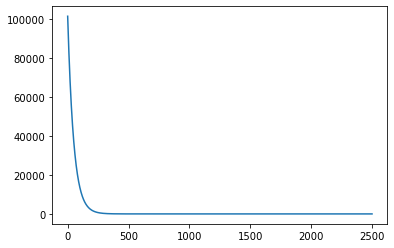

In [64]:
import matplotlib.pyplot as plt
# Plotting the cost function
plt.plot(costs)
plt.show()

In [65]:
# Calculating the performace of our model

def predict(X, w, b):
    return X.dot(w) + b

In [66]:
def r2score(y_pred, y):
    """
    Parameters:
    y_pred: predicted values
    y: actual values
    
    Returns:
    r2: r2 score
    """
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [67]:
# Predicted values with our model
y_pred = predict(X_test, weights, bias)

In [68]:
r2 = r2score(y_pred, y_test)
print(r2)

0.931989902499885


The r2 value of our model is 0.93 which is impressive.

## 9.6 Logistic Regression Intuition in Section 6

# Implementation of Logistic regression

    We'll use binary classification, thus the value of y (true/target) will be either 0 or 1.
    Assume we have a breast cancer dataset with X representing tumour size and Y representing whether the lump is malignant (cancerous) or benign (non-cancerous). When a patient comes in, it's your responsibility to advise him or her whether the lump is malignant(0) or benign(1) based on the size of the tumour. In this example, there are just two classes.

In [79]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

    There are two characteristics, n=2. There are two types of classes: blue and green.
    For a binary classification task, we naturally want our hypothesis (y hat) function to return values between 0 and 1, i.e. all Real numbers between 0 and 1.
    As a result, we wish to select a function that squishes all of its inputs between 0 and 1. The Sigmoid or Logistic function is one such function.

<h3>Sigmoid or Logistic function</h3>

    The Sigmoid Function squishes all its inputs (values on the x-axis) between 0 and 1
   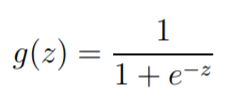
   
       This function's input range is the set of all Real Numbers, and its output range is between 0 and 1.
       As z approaches positive infinity, the output approaches 1, and as z approaches negative infinity, the output approaches 0.

In [80]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

    We require a loss function for every parametric machine learning method, which we aim to minimise (find the global minimum of) to discover the ideal parameters (w and b) that will help us generate the best predictions.
    The mean squared error served as the loss function in Linear Regression. That, however, was a regression issue.
    
    For a binary classification task, we must be able to output the likelihood of y being 1 (tumour is benign, for example), then determine the chance of y being 0 (tumour is malignant), and vice versa.
    So, if we suppose that the values returned by our hypothesis(y hat) between 0 and 1 represent a likelihood of y being 1, then the probability of y being 0 is (1-y hat).
    
    In more technical terms, the probability of y=1 given X and parameters w and b is y hat (hypothesis). The probability of y=0 given X, as specified by w and b, should thus be 1-y hat.
    Then, depending on our assumptions, we can use the above two equations to compute the loglikelihood of parameters and, as a result, identify the loss function that we must minimise.
   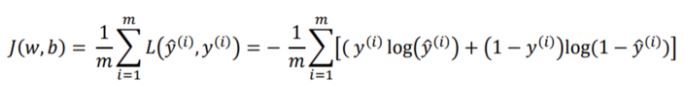
   
       J(w,b) is the overall cost/loss of the training set and L is the cost for ith training example.

In [81]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

    We can see from the Loss function that loss approaches 0 when we forecast properly, i.e. when y=0 and y hat=0 or y=1 and y hat=1, and loss approaches infinity when we guess erroneously, i.e. when y=0 but y hat=1 or y=1 but y hat=1.
    Now that we know our hypothesis function and the loss function, all we need to do is use the Gradient Descent Algorithm to find the optimal values of our parameters

In [82]:
def gradients(X, y, y_hat):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    # m-> number of training examples.
    m = X.shape[0]
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    return dw, db

    Now we want to know how our hypothesis (y hat) will predict whether y=1 or y=0. The likelihood of y being 1 given X and parameterized by w and b is how we defined hypothesis.

In [83]:
def plot_decision_boundary(X, w, b):
    # X --> Inputs
    # w --> weights
    # b --> bias
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [84]:
def normalize(X):
    # X --> Input.
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)  
    return X

    The train the function includes initializing the weights and bias and the training loop with mini-batch gradient descent.

In [85]:
def train(X, y, bs, epochs, lr):
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    # Reshaping y.
    y = y.reshape(m,1)
    # Normalizing the inputs.
    x = normalize(X)
    # Empty list to store losses.
    losses = []
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
    # returning weights, bias and losses(List).
    return w, b, losses

In [86]:
def predict(X):
    # X --> Input.
    # Normalizing the inputs.
    x = normalize(X)
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

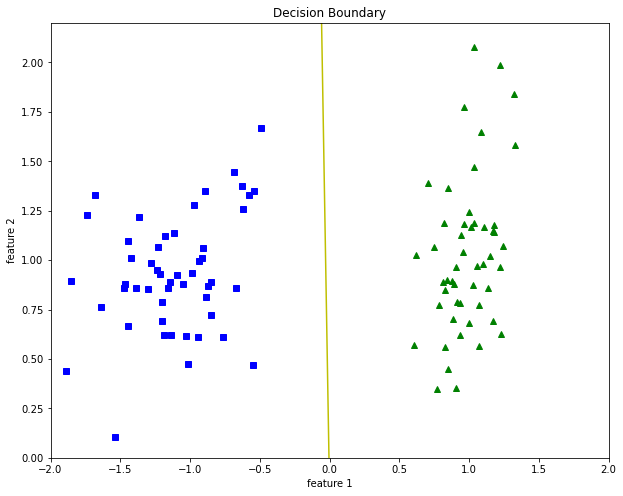

In [87]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [88]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
accuracy(X, y_hat=predict(X))

0.0

In [89]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24)

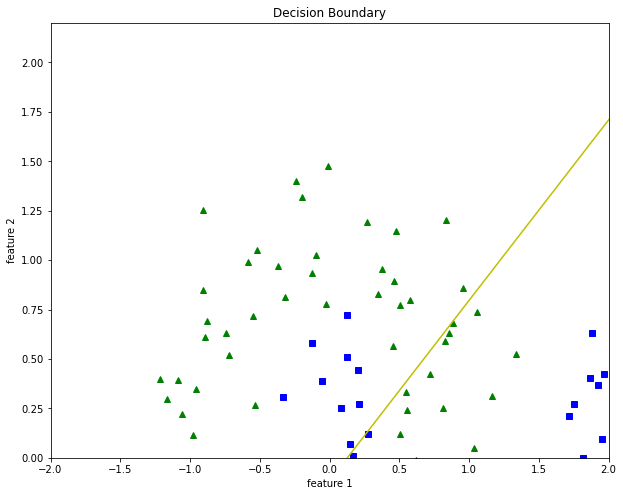

In [90]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [91]:
accuracy(y, predict(X))

0.78

<h3>9.7 Regularization Techniques : Lasso , Ridge and Elastic Net</h3>

    * Regularization is the process of regularising or shrinking the coefficients towards zero in the context of machine learning. To put it simply, regularisation opposes learning a more complicated or flexible model in order to avoid overfitting.
    * This is a type of regression in which the coefficient estimates are constrained/regularized or shrunk towards zero. In other words, in order to minimise overfitting, this strategy inhibits learning a more complicated or flexible model.

<h3>L1 Regularization or Lasso Regularization</h3>

    * Least Absolute Shrinkage and Selection Operator
    * When dealing with a large number of features, L1 regularisation is the best option because it delivers sparse solutions. Even yet, we get a computational benefit since zero-coefficient features may be omitted.
    * The regression model that uses L1 regularization technique is called Lasso Regression.
    * L1 regularisation reduces the weights of uninformative features to zero by deducting a little amount from the weight at each iteration, eventually reducing the weight to zero. |weight| is penalised by L1 regularisation. L2 regularisation It's also known as regularisation for simplicity.

<h3>L2 Regularization or Ridge Regularization</h3>

    * L2 regularisation can handle multicollinearity (independent variables are highly correlated) issues by restricting the coefficient and maintaining all variables constant.
    * L2 regression may be used to determine the relevance of predictors and punish unimportant predictors depending on that.
    * L2 regularisation functions as a force, removing a tiny proportion of weights at each iteration. As a result, weights will never equal zero. (weight)2 is penalised by L2 regularisation. The regularisation rate is an extra parameter that may be used to fine-tune the L2 regularisation term (lambda).

<h3>Elastic Net</h3>

    * Elastic Net was born out of a critique of lasso, whose variable selection might be too dependent on data and hence unstable. To achieve the best of both worlds, mix the penalties of ridge regression and lasso. The goal of Elastic Net is to minimise the loss function.

<h3>L2 Regularization or Ridge Regularization</h3>

    In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.
    This is equivalent to saying minimizing the cost function.
    As a result, ridge regression constrains the coefficients (w). The penalty term (lambda) regularises the coefficients so that the optimization function is punished if the coefficients take high values. As a result, ridge regression lowers the coefficients and aids in the reduction of model complexity and multi-collinearity. When 0, the cost function resembles the linear regression cost function. As a result, lowering the restriction (low) on the features causes the model to resemble a linear regression model. Let's look at an example utilising Boston housing data, and the code I used to demonstrate linear regression as a limited instance of Ridge regression is provided below.

In [92]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [94]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [95]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [96]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [98]:
newX=boston_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY=boston_df['Price']

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [99]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

152 152


In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
rr = Ridge(alpha=0.01) 

<h3>higher the alpha value, more restriction on the coefficients; low alpha > more generalization,</h3>
<h3>in this case linear and ridge regression resembles</h3>

In [102]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [103]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [104]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print(train_score)
print(test_score)

0.7419034960343789
0.7147895265576847


In [105]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print(Ridge_train_score)
print(Ridge_test_score)

0.7419030253527293
0.7146125373123906


In [106]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print(Ridge_train_score100)
print(Ridge_test_score100)

0.7172809669938278
0.6805765856921934


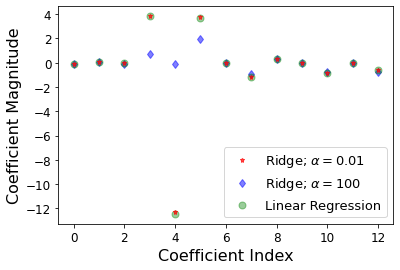

In [111]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

    The coefficient index is plotted on the X axis, and there are 13 characteristics for Boston data (for Python 0th index refers to 1st feature). The magnitudes of the coefficients are about the same as in linear regression for low values of (0.01), when the coefficients are less constrained. For larger values of (100), we notice that the magnitudes of coefficient indices 3,4,5 are significantly lower than in the linear regression scenario. This is an example of reducing the size of a coefficient using Ridge regression.

<h3>L1 Regularization or Lasso Regularization</h3>

    The cost function for Lasso (least absolute shrinkage and selection operator).
    For lambda = 0, the cost function is the same as the Ridge regression cost function. The main change is that instead of taking the square of the coefficients, magnitudes are used. This method of regularisation (L1) might result in zero coefficients, which means that some characteristics are totally ignored when evaluating output. So Lasso regression can help us with feature selection as well as reducing over-fitting. The regularisation parameter (lambda) may be changed in the same way as Ridge regression can, and we shall examine the impact below using a cancer data set in sklearn. The reason I'm using cancer data instead of Boston home data, which I've previously used, is that cancer data has 30 features compared to only 13 features in Boston house data. Changing the regularisation parameter allows for a clear representation of feature selection using Lasso regression.

In [112]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [114]:
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [115]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [116]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [117]:
X = cancer.data
Y = cancer.target

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [120]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print(train_score)
print(test_score)
print(coeff_used)

0.5600974529893081
0.5832244618818156
4


In [121]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [122]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print(train_score001)
print(test_score001)
print(coeff_used001)

0.7037865778498829
0.6641831577726229
10


In [123]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [124]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print(train_score00001)
print(test_score00001)
print(coeff_used00001)

0.7754092006936699
0.7318608210757909
22


In [125]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print(lr_train_score)
print(lr_test_score)

0.7842206194055069
0.7329325010888691


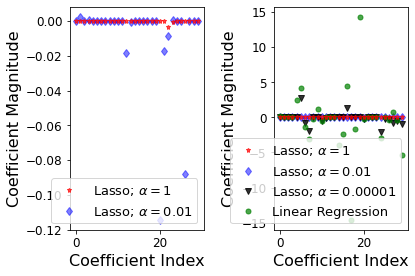

In [129]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

    In a nutshell, here's how the storyline and programming work:

    In Lasso regression, the default value of the regularisation parameter (provided by) is 1.

    Only four of the 30 characteristics in the cancer data-set are utilised as a result of this (non zero value of the coefficient).

    Because both the training and test scores (with only four features) are poor, it is concluded that the model is under-fitting the cancer data-set.

    Reduce under-fitting by lowering the alpha and increasing the number of iterations. Now = 0.01, non-zero features =10, and training and test scores improve.

    Figure 2's left panel depicts a comparison of coefficient magnitude for two distinct values of alpha. When alpha = 1, we can see that the majority of the coefficients are zero or almost zero, however this is not the case when alpha = 0.01.

    Reduce =0.0001, non-zero characteristics = 22 even more. The training and test scores are comparable to those in the simple linear regression instance.
    
    For = 0.0001, the coefficients for Lasso regression and linear regression show a strong similarity in the right panel of the figure.

    So far, we've covered the fundamentals of Ridge and Lasso regression, as well as some examples to help us comprehend their applications. Now I'll try to explain why Lasso regression might result in feature selection whereas Ridge regression merely decreases coefficients near to zero but not to zero. An illustrated image below will assist us in better understanding, where we will assume a hypothetical data-set with only two characteristics. Using the constraint for Ridge and Lasso regression coefficients (as shown above in the supplements 1 and 2).
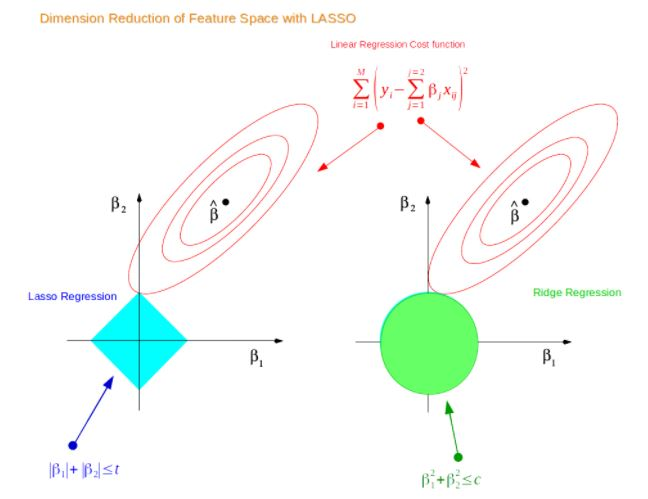

    The constraint zones for Lasso and Ridge regression are represented in cyan and green for a two-dimensional feature space. The elliptical outlines represent the linear regression cost function. If we loosen the requirements on the coefficients, the confined zones can get larger and finally reach the centre of the ellipse. This is the case when the findings of Ridge and Lasso regression mirror those of linear regression. Otherwise, both approaches discover the first place where the elliptical contours intersect the domain of constraints to derive coefficients. Unlike the disc, the diamond (Lasso) has corners on the axes, and anytime the elliptical region approaches such a point, one of the characteristics entirely vanishes! With Lasso regression, there might be many solutions on the axis for higher dimensional feature space, and thus only the significant features are picked.

<h3>Elastic Net</h3>

    Elastic Net is a regression approach that does variable selection as well as regularisation at the same time. The primary idea underlying the elastic net is the concept of regularisation. When the model is overfitted, regularisation is used. Now we must define overfitting. Overfitting is an issue that happens when the model performs well on the training dataset but performs poorly on the test dataset; in this case, regularisation is a strategy to decrease mistakes by fitting a function adequately in the training dataset. These functions are known as penalties.
    
    Elastic Net is a regularised regression model that combines lasso and ridge regression with l1 and l2 penalties. We discovered lasso's incapability while deciding on the number of predictors. The elastic net incorporates the lasso regression penalty, and when applied alone, it becomes the ridge regression. The coefficient of ridge regression is first determined in the technique of regularisation with an elastic net. Following that, we use a lasso approach to decrease the ridge regression coefficient.
    
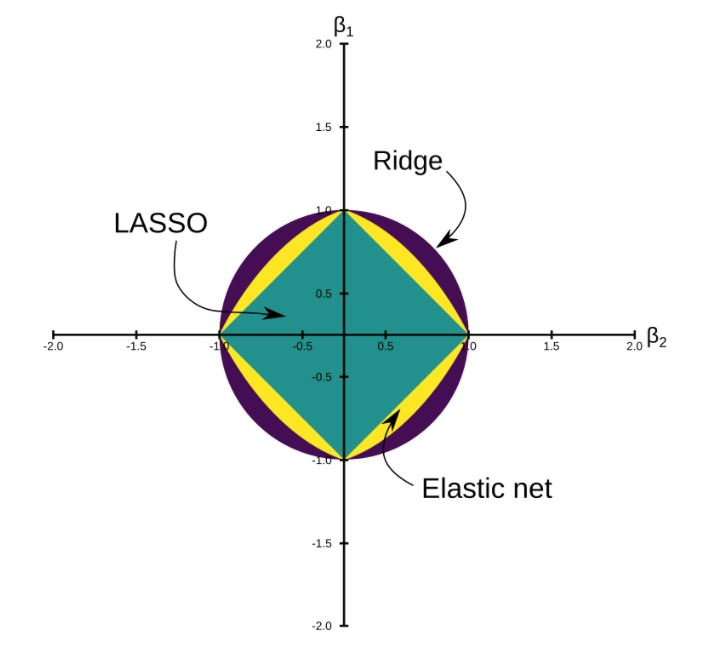

    We can perform ElasticNet in our analysis using python’s sklearn library, where the linear_model package consists of ElasticNet modules to perform an elastic net for regularization and variable selection. Next, in the article, I will compare the lasso, and elastic net regression in sklearn provided California housing data. In the data, we have got 20640 total samples with eight features.

In [130]:
from sklearn.datasets import fetch_california_housing
X_data, y_data = fetch_california_housing(return_X_y=True)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [132]:
print('shape of X :', X_data.shape, 'shape of Y :', y_data.shape)

shape of X : (20640, 8) shape of Y : (20640,)


In [133]:
print('shape of X-train :', X_train.shape, 'shape of Y-train :', y_train.shape)

shape of X-train : (14448, 8) shape of Y-train : (14448,)


In [134]:
print('shape of X-test :', X_test.shape, 'shape of Y-test :', y_test.shape)

shape of X-test : (6192, 8) shape of Y-test : (6192,)


In [135]:
from sklearn.linear_model import Lasso

alpha= 0.1
model_lasso = Lasso(alpha=alpha)
print(model_lasso)

Lasso(alpha=0.1)


In [136]:
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)

In [137]:
from sklearn.metrics import r2_score

print("r^2 of lasso on test data : %f" % r2_score(y_test, pred_lasso))

r^2 of lasso on test data : 0.543967


In [138]:
from sklearn.linear_model import ElasticNet

model_enet = ElasticNet(alpha=alpha, l1_ratio=0.3)
print(model_enet)

ElasticNet(alpha=0.1, l1_ratio=0.3)


In [139]:
model_enet.fit(X_train, y_train)
#Testing the model:
pred_enet = model_enet.predict(X_test)
print("r^2 on test data : %f" % r2_score(y_test, pred_enet))

r^2 on test data : 0.581493


##### Decreasing coefficient  alternated signs for visualization

In [140]:
idx = np.arange(8)

coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X_data, coef)
print(y)

[ 271.96616714 1683.31659326  378.45057142 ...  745.18734767  566.38011758
 1001.31171415]


    Because the ridge coefficients are a decreased factor of the basic linear regression coefficients, they can never reach zero but can reach extremely tiny values. In a given range, the lasso coefficients become zero and are lowered by a constant factor, explaining their modest magnitude in compared to ridge.
    The goal of LASSO (a penalised estimation approach) is to estimate the same values (model coefficients) as OLS maximum likelihood estimation, for example (an unpenalized method).

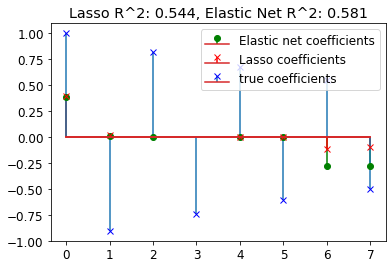

In [141]:
m, s, _ = plt.stem(np.where(model_enet.coef_)[0], model_enet.coef_[model_enet.coef_ != 0], markerfmt='bo', label='Elastic net coefficients')
plt.setp([m, s], color="green")
m, s, _ = plt.stem(np.where(model_lasso.coef_)[0], model_lasso.coef_[model_lasso.coef_ != 0], markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='red')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients', markerfmt='bx')
plt.legend()
plt.title("Lasso R^2: %.3f, Elastic Net R^2: %.3f"  % (r2_score(y_test, pred_lasso),r2_score(y_test, pred_enet)))
plt.show()

    We can view and compare the calculated coefficients from both models here. Here, we can see that the lasso performed almost identically to the ElasticNet, but in certain circumstances, the elastic net performed better than the lasso, which is why the elastic net model has a higher r square value.
    
    Here we have seen in the article how we can improve the performance of the regression models by using elastic net regression models. Earlier, we discussed the limitation of ridge and lasso regression and compare the performance score between lasso and ElasticNet. Many parameters can cause drastic changes in performances that the cross-validation methods can cross-check. I encourage you to perform those methods with the model as well to get more accurate results.

## 9.8 Decision Tree ,Random Forest, XGBoost, Light GBM (Classifier and Regressor) in Section 6
## Implementation of all the models

<h3>Decision Tree</h3>

    A decision tree is made up of several rules that we use to create predictions. Assume we train an algorithm that predicts if a person is obese based on their height and weight.

<h3>Decision tree prediction for regression</h3>

    Decision tree regression evaluates an object's properties and trains a model with a tree structure to predict data in the future to create meaningful continuous output. Continuous output denotes that the output/result is not discrete, that is, it is not represented just by a discrete, well-known set of numbers or values.

In [22]:
# import numpy package for arrays and stuff
import numpy as np 
  
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
  
# import pandas for importing csv files 
import pandas as pd 

In [23]:
# Initialize and print the Dataset
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])
  
# print the dataset
print(dataset) 

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [24]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int) 
  
# print X
print(X)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [25]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset[:, 2].astype(int) 
  
# print y
print(y)

[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [26]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [27]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict([[3750]])
  
# print the predicted price
print("Predicted price: % d\n"% y_pred) 

Predicted price:  8000



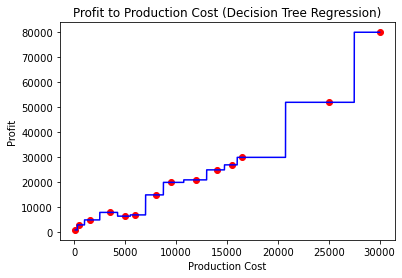

In [28]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

<h3>Decision Tree predictions for Classifier</h3>

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [33]:
# load dataset
pima = pd.read_csv("E:/PIP_Devmallya/Week_1/Problem_1/Data/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


<h3>DT Classifier Using Python</h3>

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
# Function importing Dataset
def importdata():
    balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
    sep= ',', header = None)
      
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data

In [44]:
# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [45]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [46]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [47]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [48]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [49]:
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devmallya Karar\

<h3>Random Forest</h3>

    Random forests, like decision trees, are a non-parametric model that may be used for both regression and classification applications. The complete random forest technique is constructed on top of weak learners (decision trees), creating the analogy of employing trees to build a forest. The word "random" refers to the fact that each decision tree is constructed using a random selection of input.

<h3>Random Forest Regressor</h3>

In [60]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
data = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/Position_Salaries.csv')
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [62]:
x = data.iloc[:, 1:2].values 
print(x)
y = data.iloc[:, 2].values  

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [63]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [64]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

In [65]:
# Predicting a new result
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))

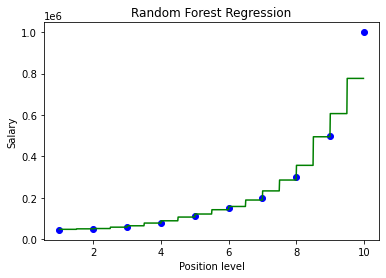

In [66]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<h3>Random Forest Classifier</h3>

In [68]:
from sklearn import datasets
iris = datasets.load_iris()   

In [69]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [70]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [71]:
# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)
 
# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [75]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
# creating dataframe of IRIS dataset
data = pd.DataFrame({'sepal length': iris.data[:, 0], 'sepal width': iris.data[:, 1],
                     'petal length': iris.data[:, 2], 'petal width': iris.data[:, 3],
                     'species': iris.target})

In [76]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9777777777777777


In [78]:
# predicting which type of flower it is.
clf.predict([[3, 3, 2, 2]])

array([0])

#### Important features or selecting features in the IRIS dataset

In [79]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)
 
# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal length (cm)    0.452145
petal width (cm)     0.424603
sepal length (cm)    0.105327
sepal width (cm)     0.017925
dtype: float64

<h3>Random Forest Classifier Using Python</h3>

In [81]:
import random
import pandas as pd
import numpy as np

df = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    The datast is made up of simple attributes for each passenger, such as their age, gender, socioeconomic status, number of family members, and where they departed. The goal is for us to forecast whether or not a passenger survived the Titanic disaster, where 1 represents survival and 0 denotes death.

    It's worth noting that random forests don't handle missing data. This necessitates certain preprocessing measures before to training the model; for simplicity, I will simply replace missing variables with the avarage or mode. I'm not going to go into detail about this dataset, but if you're interested in knowing more about it, I highly recommend checking at the kernels in the competition.

In [82]:
df.loc[df['Age'].isnull(),'Age'] = np.round(df['Age'].mean())
df.loc[df['Embarked'].isnull(),'Embarked'] = df['Embarked'].value_counts().index[0]

In [83]:
features = ['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']
nb_train = int(np.floor(0.9 * len(df)))
df = df.sample(frac=1, random_state=217)
X_train = df[features][:nb_train]
y_train = df['Survived'][:nb_train].values
X_test = df[features][nb_train:]
y_test = df['Survived'][nb_train:].values

    Entropy, Classification Error, and the Gini index are the most often used metrics for building binary decision trees. In this thread, we'll look at entropy, which is a measure of impurity (uncertainty) that employs the following formula.
   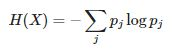

    Pj denotes the probability of class j. Entropy in the case of binary categorization has the form
   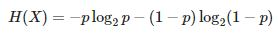
   
    where P(X=1) stands for (the probablity that a passenger survived). It is also worth noting that in the case of binary classification, we utilise log2.

In [84]:
def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return - (p * np.log2(p) + (1 - p) * np.log2(1-p))

def information_gain(left_child, right_child):
    parent = left_child + right_child
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    IG_p = entropy(p_parent)
    IG_l = entropy(p_left)
    IG_r = entropy(p_right)
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r

    where entropy is a probability of a class within a node and information gain is a list of classes from the left and right child and provides the information gain of that specific split.
    
    Let us additionally construct a draw bootstrap function that can accept the training input X as a dataframe and the output Y as an array. We'll have it return the bootstrap sampled X_boot and y_boot values, which we'll utilise to build a tree. We'll also return the out-of-bag observations left out for training, which we'll refer to as X_oob and y_oob. We'll utilise the OOB samples to test the performance of the tree generated with bootstrapped data in each subsequent iteration. So, if we have 100 trees, we will have 100 OOB scores.

In [85]:
def draw_bootstrap(X_train, y_train):
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    X_bootstrap = X_train.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    X_oob = X_train.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    return X_bootstrap, y_bootstrap, X_oob, y_oob

def oob_score(tree, X_test, y_test):
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

    Following that, we'll define find split point, which will accomplish the following:

    Iterate over each value in the bootstrapped dataset and compute the information gain by selecting m features at random for each feature picked.
    Return a dictionary representing a node in a tree that contains:

    * the index of features

    * the value at which to divide

    * child node on the left

    * the correct child node

    created by the split point with the greatest information gain It should be noted that each child node will be kept as a dictionary, with the input X boot as X bootstrap and the output y boot as y bootstrap.

In [89]:
def find_split_point(X_bootstrap, y_bootstrap, max_features):
    feature_ls = list()
    num_features = len(X_bootstrap[0])
    
    while len(feature_ls) <= max_features:
        feature_idx = random.sample(range(num_features), 1)
        if feature_idx not in feature_ls:
            feature_ls.extend(feature_idx)
    
    best_info_gain = -999
    node = None
    for feature_idx in feature_ls:
        for split_point in X_bootstrap[:,feature_idx]:
            left_child = {'X_bootstrap': [], 'y_bootstrap': []}
            right_child = {'X_bootstrap': [], 'y_bootstrap': []}
            
            # split children for continuous variables
            if type(split_point) in [int, float]:
                for i, value in enumerate(X_bootstrap[:,feature_idx]):
                    if value <= split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            # split children for categoric variables
            else:
                for i, value in enumerate(X_bootstrap[:,feature_idx]):
                    if value == split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            
            split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
            if split_info_gain > best_info_gain:
                best_info_gain = split_info_gain
                left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
                right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
                node = {'information_gain': split_info_gain, 
                        'left_child': left_child, 
                        'right_child': right_child, 
                        'split_point': split_point,
                        'feature_idx': feature_idx}
                
    
    return node

    Following that, we'll need a function to determine when to cease splitting nodes in a tree and eventually produce a terminal node (whether the passengers survives or perishes). Split node operates as follows on a single tree:

    1. Store the left and right children of a node as left child and right child, respectively, then delete them from the original dictionary.
    2. Check to see if any child has no observations. If one of the children is completely empty, it signifies that the best split in the data for that node was unable to discern between the two classes, therefore it is preferable to use terminal node and return the tree. The class with the greatest counts at the current node is returned by terminal node.
    3. Check to see if the tree's current depth has reached its maximum depth. If this is the case, build a terminal node and return the tree.
    4. Check to see if the number of observations in the current node's left child is fewer than the number of samples required to perform a split, which will be saved as min samples split. If this is the case, build a terminal node and return the tree.
    5. If the left has more observations than the min samples split, we'll run the current node through find split point again to find the optimum split point and repeat steps 1 - 
        6. This will eventually be nested dictionaries, which will be used to represent a node in our tree.
    6. Steps 4 and 5 should be repeated for the correct child node.
    7. Steps 1 through 6 should be repeated until each branch has a terminal node.

In [90]:
def terminal_node(node):
    y_bootstrap = node['y_bootstrap']
    pred = max(y_bootstrap, key = y_bootstrap.count)
    return pred


def split_node(node, max_features, min_samples_split, max_depth, depth):
    left_child = node['left_child']
    right_child = node['right_child']    

    del(node['left_child'])
    del(node['right_child'])
    
    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return
    
    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node
    
    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = node['right_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_depth, min_samples_split, max_depth, depth + 1)
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = node['left_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)

    We can now create our random forest, which will just be a collection of these trees, now that we can generate a single tree. We'll need to supply n estimators, max features, max depth, and min samples split when calling random forest. Then, for each tree we've generated, we'll compute our OOB score and add it to a list using all of the observations left out of our bootstrapped data (I'll go into how to compute the OOB score and forecast on a single tree below). We can report the mean OOB score and return the whole list of trees that will represent our ensemble once we've generated n estimators trees.

In [91]:
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

    With predict tree, we can predict the class of an input vector given a single tree. We may let our flow through a tree by continually checking if the split we're at includes another dictionary because a single tree is made up of nested dictionaries that each represent a node (node). We've reached the terminal node when we reach a left split or right split that doesn't include any dictionaries. We may now return the class.

In [92]:
def predict_tree(tree, X_test):
    feature_idx = tree['feature_idx']
    
    if X_test[feature_idx] <= tree['split_point']:
        if type(tree['left_split']) == dict:
            return predict_tree(tree['left_split'], X_test)
        else:
            value = tree['left_split']
            return value
    else:
        if type(tree['right_split']) == dict:
            return predict_tree(tree['right_split'], X_test)
        else:
            return tree['right_split']

    We'll repeat the procedure for each tree in our ensemble for an input, and the class that was returned more frequently will be the class predicted by our model.

In [93]:
def predict_rf(tree_ls, X_test):
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)

    Now that we have our model built we can fit it to our training data with random_forest and predict on our training data

In [94]:
n_estimators = 100
max_features = 3
max_depth = 10
min_samples_split = 2

model = random_forest(X_train, y_train, n_estimators=100, max_features=3, max_depth=10, min_samples_split=2)

OOB estimate: 0.31


In [96]:
preds = predict_rf(model, X_test)

In [97]:
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: {}".format(np.round(acc,3)))

Testing accuracy: 0.633


<h3>XGBoost</h3>

<h3>XGBoost Regression</h3>

In [98]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [99]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [100]:
print(boston.data.shape)

(506, 13)


In [101]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [102]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [103]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [104]:
data['PRICE'] = boston.target

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [106]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [107]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [108]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

    Now you'll transform the dataset into a Dmatrix-optimized data structure, which is supported by XGBoost and provides outstanding performance and efficiency advantages.

In [109]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [111]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [112]:
xg_reg.fit(X_train,y_train)

[11:55:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [113]:
preds = xg_reg.predict(X_test)
preds

array([10.670782 , 17.886362 , 23.993221 , 10.971137 , 20.656567 ,
       17.063112 , 17.413216 ,  7.1758337, 11.684821 , 17.894796 ,
       18.901701 , 14.567413 , 10.806006 , 15.261372 , 12.66772  ,
       14.075861 , 13.288725 , 24.107811 , 13.454856 , 11.560353 ,
       11.525483 , 11.551982 , 19.228527 , 23.993221 , 20.524649 ,
       13.448225 , 10.661165 , 15.404765 , 16.191902 , 13.140589 ,
       14.916252 , 21.076527 ,  8.176096 , 14.827184 , 15.909969 ,
       21.041925 , 16.428032 ,  9.314631 , 12.319548 , 23.573265 ,
       18.292862 , 13.454856 ,  9.351014 , 22.248753 , 13.000366 ,
       16.475197 , 14.159811 , 15.230242 , 12.319548 , 11.772567 ,
       21.076527 , 16.024069 , 14.159811 ,  8.882479 , 13.588928 ,
       10.661165 , 11.776985 ,  7.1758337, 19.659273 ,  9.299877 ,
       12.806547 , 13.811639 , 11.339502 , 13.683961 , 14.075861 ,
       16.993258 , 16.206121 , 12.02784  , 15.3576   , 18.292862 ,
       13.223848 , 16.329927 , 12.808572 , 16.679268 , 11.4762

In [114]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


    By running XGBoost's cv() function and saving the results in a cv results DataFrame, you'll be able to create a 3-fold cross validation model with these parameters.

In [115]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [116]:
# cv_results contains train and test RMSE metrics for each boosting round.
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750758,0.036152,21.765523,0.028849
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118632,18.157336,0.116038
3,16.458958,0.169189,16.623975,0.191413
4,15.074781,0.183545,15.254608,0.213612


In [117]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


##### Feature Importance

In [118]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


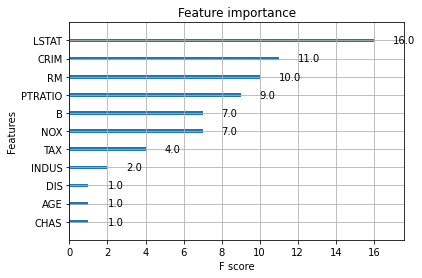

In [120]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

<h3>XGBoost Classifier</h3>

In [121]:
import pandas as pd

rain = pd.read_csv("E:/PIP_Devmallya/Week_1/Problem_1/Data/weatherAUS.csv")
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [122]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [123]:
cols_to_drop = ["Date", "Location", "RainTomorrow", "Rainfall"]
rain.drop(cols_to_drop, axis=1, inplace=True)

In [124]:
missing_props = rain.isna().mean(axis=0)
missing_props

MinTemp          0.010209
MaxTemp          0.008669
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
dtype: float64

In [125]:
over_threshold = missing_props[missing_props >= 0.4]
over_threshold

Evaporation    0.431665
Sunshine       0.480098
Cloud3pm       0.408071
dtype: float64

In [126]:
rain.drop(over_threshold.index, axis=1, inplace=True)

In [127]:
X = rain.drop("RainToday", axis=1)
y = rain.RainToday

In [128]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [129]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [130]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [131]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [132]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [133]:
# Apply preprocessing
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218
)

In [134]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()
# Fit
xgb_cl.fit(X_train, y_train)
# Predict
preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column

[12:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8507080984463082

<h3>LightGBM</h3>

<h3>LightGBM Regression</h3>

In [136]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict

In [137]:
df_train = pd.read_csv("E:/PIP_Devmallya/Week_1/Problem_1/Data/house_train.csv")
df_test = pd.read_csv("E:/PIP_Devmallya/Week_1/Problem_1/Data/house_test.csv")

In [138]:
df_train.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
273,274,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,139000
1135,1136,30,RM,60.0,6180,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,102000
427,428,20,RL,77.0,8593,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,109008


In [139]:
df_test.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1339,2800,30,RM,50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
663,2124,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal
25,1486,60,RL,63.0,8577,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [140]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (1460, 81), test: (1459, 80)


In [141]:
pd.options.display.max_columns = None # Show all cols
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [142]:
df_na = (df_train.isnull().sum() / len(df_train)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

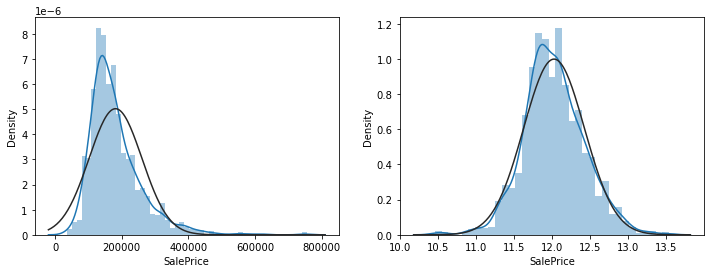

In [143]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(df_train['SalePrice'], ax=ax[0], fit=norm)
sns.distplot(np.log(df_train[('SalePrice')]+1), ax=ax[1], fit= norm)

In [144]:
def fill_missing(df, cols, val):
    """ Fill with the supplied val """
    for col in cols:
        df[col] = df[col].fillna(val)

def fill_missing_with_mode(df, cols):
    """ Fill with the mode """
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
def addlogs(res, cols):
    """ Log transform feature list"""
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)   
        res.columns.values[m] = c + '_log'
        m += 1
    return res

In [145]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

In [146]:
loglist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

df_train = addlogs(df_train, loglist)

In [147]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [148]:
fill_missing(df_train, ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       "MasVnrType", "MSSubClass"], "None")
fill_missing(df_train, ["GarageYrBlt", "GarageArea", "GarageCars",
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                       "MasVnrArea"], 0)
fill_missing_with_mode(df_train, ["MSZoning", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"])
fill_missing(df_train, ["Functional"],"Typ")
# Utils is pointless as there is only one row with a value
df_train.drop(['Utilities'], axis=1, inplace=True)
# For lot frontage we take the median of the neighbourhood. In general this would be a good approximation as most 
# house co located are similar in size 
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [149]:
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index, inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [150]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [151]:
def fix_missing_cols(in_train, in_test):
    missing_cols = set(in_train.columns) - set(in_test.columns)
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        in_test[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    in_test = in_test[in_train.columns]
    return in_test

def dummy_encode(in_df_train, in_df_test):
    df_train = in_df_train
    df_test = in_df_test
    categorical_feats = [
        f for f in df_train.columns if df_train[f].dtype == 'object'
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = pd.concat([df_test, pd.get_dummies(df_test[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = fix_missing_cols(df_train, df_test)
    return df_train, df_test

In [152]:
df_train, df_test = dummy_encode(df_train, df_test)
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Shape train: (1456, 361), test: (1459, 361)


In [155]:
def load_poly_features(df_train, df_test, cols):
    """
    USeful function to generate poly terms
    :param df_train: The training data frame
    :param df_test: The test data frame
    :return: df_poly_features, df_poly_features_test - The training polynomial features + the test
    """
    print('Loading polynomial features..')
    # Make a new dataframe for polynomial features
    poly_features = df_train[cols]
    poly_features_test = df_test[cols]

    # imputer for handling missing values
    imputer = SimpleImputer(strategy='median')

    # Need to impute missing values
    poly_features = imputer.fit_transform(poly_features)
    poly_features_test = imputer.transform(poly_features_test)

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree=3)
    # Train the polynomial features
    poly_transformer.fit(poly_features)

    # Transform the features
    poly_features = poly_transformer.transform(poly_features)
    poly_features_test = poly_transformer.transform(poly_features_test)
    print('Polynomial Features shape: %s' % str(poly_features.shape))

    df_poly_features = pd.DataFrame(poly_features,
                                    columns=poly_transformer.get_feature_names(cols))
    df_poly_features_test = pd.DataFrame(poly_features_test,
                                         columns=poly_transformer.get_feature_names(cols))
    df_poly_features['Id'] = df_train['Id']
    df_poly_features_test['Id'] = df_test['Id']
    print('Loaded polynomial features')
    return df_poly_features, df_poly_features_test

In [156]:
correlated_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
df_train_poly, df_test_poly =  load_poly_features(df_train, df_test, cols=correlated_cols)
print("Shape train: %s, test: %s" % (df_train_poly.shape, df_test_poly.shape))

Loading polynomial features..
Polynomial Features shape: (1456, 84)
Loaded polynomial features
Shape train: (1456, 85), test: (1459, 85)


C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [157]:
df_train = df_train.merge(right=df_train_poly.reset_index(), how='left', on='Id')
df_test = df_test.merge(right=df_test_poly.reset_index(), how='left', on='Id')

In [158]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (1456, 446), test: (1459, 446)


In [159]:
y = df_train["SalePrice"]
y.sample(3)

928     12.211065
1174    11.691080
974     11.356283
Name: SalePrice, dtype: float64

In [160]:
df_train.drop(["SalePrice"], axis=1, inplace=True)
# The fix missing cols above will have added the target column to the test data frame, so this is a workaround to remove it
df_test.drop(["SalePrice"], axis=1, inplace=True) 

In [161]:
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (1456, 445), test: (1459, 445)


In [162]:
X_train, X_test, y_train, y_test = train_test_split( df_train, y, test_size=0.2, random_state=42)

In [163]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [164]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [165]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, col

[60]	valid_0's l1: 0.244686	valid_0's l2: 0.099729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's l1: 0.243713	valid_0's l2: 0.0990239
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's l1: 0.242763	valid_0's l2: 0.0983318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's l1: 0.241788	valid_0's l2: 0.0976423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's l1: 0.240827	valid_0's l2: 0.0969595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	valid_0's l1: 0.239862	valid_0's l2: 0.0962839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's l1: 0.238889	valid_0's l2: 0.0956132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[67]	valid_0's l1: 0.237932	valid_0's l2: 0.0949497
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's l1: 0.175561	valid_0's l2: 0.0563513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[151]	valid_0's l1: 0.174975	valid_0's l2: 0.0560324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[152]	valid_0's l1: 0.174398	valid_0's l2: 0.0557257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[153]	valid_0's l1: 0.173845	valid_0's l2: 0.0554193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[154]	valid_0's l1: 0.173279	valid_0's l2: 0.0551199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[155]	valid_0's l1: 0.172721	valid_0's l2: 0.0548233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's l1: 0.172164	valid_0's l2: 0.0545311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[157]	valid_0's l1: 0.171609	

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[236]	valid_0's l1: 0.137238	valid_0's l2: 0.0378157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[237]	valid_0's l1: 0.136905	valid_0's l2: 0.0376724
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[238]	valid_0's l1: 0.136578	valid_0's l2: 0.0375313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[239]	valid_0's l1: 0.136245	valid_0's l2: 0.0373799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's l1: 0.135921	valid_0's l2: 0.0372416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[241]	valid_0's l1: 0.135591	valid_0's l2: 0.0371049
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[242]	valid_0's l1: 0.13526	valid_0's l2: 0.0369693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[243]	valid_0's l1: 0.134942	v

[310]	valid_0's l1: 0.119588	valid_0's l2: 0.0302037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[311]	valid_0's l1: 0.119405	valid_0's l2: 0.0301317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[312]	valid_0's l1: 0.119222	valid_0's l2: 0.0300597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[313]	valid_0's l1: 0.119042	valid_0's l2: 0.029989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[314]	valid_0's l1: 0.118877	valid_0's l2: 0.0299163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[315]	valid_0's l1: 0.118714	valid_0's l2: 0.0298538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[316]	valid_0's l1: 0.118559	valid_0's l2: 0.0297885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's l1: 0.118405	valid_0's l2: 0.0297249
[LightGBM] [Warning] No further splits with positive

[392]	valid_0's l1: 0.108203	valid_0's l2: 0.0254952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0's l1: 0.108126	valid_0's l2: 0.0254647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[394]	valid_0's l1: 0.108053	valid_0's l2: 0.0254356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[395]	valid_0's l1: 0.107971	valid_0's l2: 0.0254002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[396]	valid_0's l1: 0.107897	valid_0's l2: 0.0253692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[397]	valid_0's l1: 0.107823	valid_0's l2: 0.0253399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's l1: 0.107756	valid_0's l2: 0.0253105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[399]	valid_0's l1: 0.107687	valid_0's l2: 0.0252837
[LightGBM] [Warning] No further splits with positiv

[472]	valid_0's l1: 0.102361	valid_0's l2: 0.0231641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[473]	valid_0's l1: 0.102303	valid_0's l2: 0.0231401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[474]	valid_0's l1: 0.102233	valid_0's l2: 0.023114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[475]	valid_0's l1: 0.102179	valid_0's l2: 0.0230905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[476]	valid_0's l1: 0.102125	valid_0's l2: 0.0230699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[477]	valid_0's l1: 0.102061	valid_0's l2: 0.0230458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's l1: 0.102032	valid_0's l2: 0.0230366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0's l1: 0.101983	valid_0's l2: 0.0230159
[LightGBM] [Warning] No further splits with positive

[564]	valid_0's l1: 0.0986888	valid_0's l2: 0.021664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's l1: 0.0986572	valid_0's l2: 0.0216518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's l1: 0.0986242	valid_0's l2: 0.0216391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0's l1: 0.0985918	valid_0's l2: 0.0216296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's l1: 0.0985686	valid_0's l2: 0.0216203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[569]	valid_0's l1: 0.098528	valid_0's l2: 0.0216086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[570]	valid_0's l1: 0.0984999	valid_0's l2: 0.0215993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[571]	valid_0's l1: 0.0984652	valid_0's l2: 0.0215873
[LightGBM] [Warning] No further splits with p

[637]	valid_0's l1: 0.0965697	valid_0's l2: 0.0207725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[638]	valid_0's l1: 0.0965474	valid_0's l2: 0.0207613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[639]	valid_0's l1: 0.0965282	valid_0's l2: 0.0207509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[640]	valid_0's l1: 0.0965195	valid_0's l2: 0.0207483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[641]	valid_0's l1: 0.0964783	valid_0's l2: 0.0207344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[642]	valid_0's l1: 0.0964374	valid_0's l2: 0.0207207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[643]	valid_0's l1: 0.0963973	valid_0's l2: 0.0207064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[644]	valid_0's l1: 0.0963736	valid_0's l2: 0.0206994
[LightGBM] [Warning] No further splits with

[708]	valid_0's l1: 0.0947153	valid_0's l2: 0.0201643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[709]	valid_0's l1: 0.0946911	valid_0's l2: 0.0201519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[710]	valid_0's l1: 0.0946783	valid_0's l2: 0.0201424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[711]	valid_0's l1: 0.0946709	valid_0's l2: 0.0201359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[712]	valid_0's l1: 0.0946493	valid_0's l2: 0.0201264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[713]	valid_0's l1: 0.0946256	valid_0's l2: 0.0201156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[714]	valid_0's l1: 0.0946005	valid_0's l2: 0.0201048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[715]	valid_0's l1: 0.0945776	valid_0's l2: 0.0200943
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[776]	valid_0's l1: 0.0939207	valid_0's l2: 0.0197862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[777]	valid_0's l1: 0.0939065	valid_0's l2: 0.0197799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[778]	valid_0's l1: 0.0938945	valid_0's l2: 0.0197735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[779]	valid_0's l1: 0.0938839	valid_0's l2: 0.0197683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[780]	valid_0's l1: 0.0938735	valid_0's l2: 0.0197646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[781]	valid_0's l1: 0.093857	valid_0's l2: 0.0197601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[782]	valid_0's l1: 0.0938406	valid_0's l2: 0.0197558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[783]	valid_0's l1: 0.0

[861]	valid_0's l1: 0.093021	valid_0's l2: 0.0194845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[862]	valid_0's l1: 0.093007	valid_0's l2: 0.0194802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[863]	valid_0's l1: 0.0930049	valid_0's l2: 0.0194816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[864]	valid_0's l1: 0.0930039	valid_0's l2: 0.0194843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[865]	valid_0's l1: 0.0929973	valid_0's l2: 0.0194845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[866]	valid_0's l1: 0.0929995	valid_0's l2: 0.0194886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[867]	valid_0's l1: 0.0929959	valid_0's l2: 0.0194889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[868]	valid_0's l1: 0.0929919	valid_0's l2: 0.0194904
[LightGBM] [Warning] No further splits with p

[932]	valid_0's l1: 0.0925629	valid_0's l2: 0.0193264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[933]	valid_0's l1: 0.0925599	valid_0's l2: 0.0193241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[934]	valid_0's l1: 0.0925612	valid_0's l2: 0.0193234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[935]	valid_0's l1: 0.0925625	valid_0's l2: 0.0193228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's l1: 0.0925605	valid_0's l2: 0.0193213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[937]	valid_0's l1: 0.0925584	valid_0's l2: 0.0193199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[938]	valid_0's l1: 0.0925565	valid_0's l2: 0.0193185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[939]	valid_0's l1: 0.092551	valid_0's l2: 0.0193152
[LightGBM] [Warning] No further splits with 

[1013]	valid_0's l1: 0.0920073	valid_0's l2: 0.0191459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1014]	valid_0's l1: 0.0920041	valid_0's l2: 0.0191451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1015]	valid_0's l1: 0.0920066	valid_0's l2: 0.0191447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1016]	valid_0's l1: 0.0919966	valid_0's l2: 0.0191381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1017]	valid_0's l1: 0.0919922	valid_0's l2: 0.0191369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1018]	valid_0's l1: 0.0919926	valid_0's l2: 0.0191366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1019]	valid_0's l1: 0.0919882	valid_0's l2: 0.0191355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1020]	valid_0's l1: 0.09198	valid_0's l2: 0.0191293
[LightGBM] [Warning] No further split

[1104]	valid_0's l1: 0.091582	valid_0's l2: 0.0189915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1105]	valid_0's l1: 0.0915838	valid_0's l2: 0.0189909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1106]	valid_0's l1: 0.0915839	valid_0's l2: 0.0189882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1107]	valid_0's l1: 0.0915829	valid_0's l2: 0.0189839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1108]	valid_0's l1: 0.0915714	valid_0's l2: 0.0189808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1109]	valid_0's l1: 0.0915695	valid_0's l2: 0.0189774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1110]	valid_0's l1: 0.0915708	valid_0's l2: 0.0189764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1111]	valid_0's l1: 0.0915677	valid_0's l2: 0.0189755
[LightGBM] [Warning] No further spli

[1179]	valid_0's l1: 0.091446	valid_0's l2: 0.0189553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1180]	valid_0's l1: 0.0914459	valid_0's l2: 0.0189495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1181]	valid_0's l1: 0.0914508	valid_0's l2: 0.0189506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1182]	valid_0's l1: 0.0914556	valid_0's l2: 0.0189516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1183]	valid_0's l1: 0.0914579	valid_0's l2: 0.0189521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1184]	valid_0's l1: 0.0914535	valid_0's l2: 0.0189503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1185]	valid_0's l1: 0.0914583	valid_0's l2: 0.0189514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1186]	valid_0's l1: 0.0914588	valid_0's l2: 0.0189514
[LightGBM] [Warning] No further spli

[1270]	valid_0's l1: 0.0913286	valid_0's l2: 0.0188316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1271]	valid_0's l1: 0.0913203	valid_0's l2: 0.0188268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1272]	valid_0's l1: 0.0913114	valid_0's l2: 0.0188215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1273]	valid_0's l1: 0.0913025	valid_0's l2: 0.0188162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1274]	valid_0's l1: 0.0912964	valid_0's l2: 0.0188111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1275]	valid_0's l1: 0.0912885	valid_0's l2: 0.0188085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1276]	valid_0's l1: 0.0912785	valid_0's l2: 0.0188038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1277]	valid_0's l1: 0.0912707	valid_0's l2: 0.0188012
[LightGBM] [Warning] No further spl

[1377]	valid_0's l1: 0.0908324	valid_0's l2: 0.0186258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1378]	valid_0's l1: 0.0908384	valid_0's l2: 0.0186267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1379]	valid_0's l1: 0.0908457	valid_0's l2: 0.0186276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1380]	valid_0's l1: 0.0908509	valid_0's l2: 0.0186282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1381]	valid_0's l1: 0.0908504	valid_0's l2: 0.0186285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1382]	valid_0's l1: 0.0908546	valid_0's l2: 0.0186288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1383]	valid_0's l1: 0.0908582	valid_0's l2: 0.0186291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1384]	valid_0's l1: 0.0908711	valid_0's l2: 0.0186307
[LightGBM] [Warning] No further spl

[1476]	valid_0's l1: 0.0909175	valid_0's l2: 0.0186185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1477]	valid_0's l1: 0.0909259	valid_0's l2: 0.0186207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1478]	valid_0's l1: 0.0909253	valid_0's l2: 0.0186196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1479]	valid_0's l1: 0.090928	valid_0's l2: 0.0186201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1480]	valid_0's l1: 0.0909271	valid_0's l2: 0.0186183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1481]	valid_0's l1: 0.0909246	valid_0's l2: 0.0186193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1482]	valid_0's l1: 0.09093	valid_0's l2: 0.018621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1483]	valid_0's l1: 0.0909256	valid_0's l2: 0.0186207
[LightGBM] [Warning] No further splits 

[1566]	valid_0's l1: 0.0903417	valid_0's l2: 0.0185102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1567]	valid_0's l1: 0.0903384	valid_0's l2: 0.0185094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1568]	valid_0's l1: 0.0903318	valid_0's l2: 0.0185095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1569]	valid_0's l1: 0.0903231	valid_0's l2: 0.0185077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1570]	valid_0's l1: 0.0903241	valid_0's l2: 0.0185088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1571]	valid_0's l1: 0.0903308	valid_0's l2: 0.0185122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1572]	valid_0's l1: 0.0903316	valid_0's l2: 0.0185119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1573]	valid_0's l1: 0.0903332	valid_0's l2: 0.0185119
[LightGBM] [Warning] No further spl

[1661]	valid_0's l1: 0.0899677	valid_0's l2: 0.0183554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1662]	valid_0's l1: 0.0899623	valid_0's l2: 0.0183538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1663]	valid_0's l1: 0.0899565	valid_0's l2: 0.0183523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1664]	valid_0's l1: 0.0899508	valid_0's l2: 0.0183508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1665]	valid_0's l1: 0.0899452	valid_0's l2: 0.0183493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1666]	valid_0's l1: 0.0899402	valid_0's l2: 0.0183488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1667]	valid_0's l1: 0.0899369	valid_0's l2: 0.0183474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1668]	valid_0's l1: 0.089932	valid_0's l2: 0.0183459
[LightGBM] [Warning] No further spli

[1752]	valid_0's l1: 0.0897707	valid_0's l2: 0.0182825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1753]	valid_0's l1: 0.0897701	valid_0's l2: 0.0182826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1754]	valid_0's l1: 0.0897675	valid_0's l2: 0.0182822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1755]	valid_0's l1: 0.0897641	valid_0's l2: 0.0182813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1756]	valid_0's l1: 0.0897634	valid_0's l2: 0.0182809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1757]	valid_0's l1: 0.0897628	valid_0's l2: 0.0182811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1758]	valid_0's l1: 0.0897622	valid_0's l2: 0.0182813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1759]	valid_0's l1: 0.089759	valid_0's l2: 0.0182814
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1839]	valid_0's l1: 0.0896762	valid_0's l2: 0.0182565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1840]	valid_0's l1: 0.0896786	valid_0's l2: 0.0182559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1841]	valid_0's l1: 0.0896815	valid_0's l2: 0.0182595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1842]	valid_0's l1: 0.0896862	valid_0's l2: 0.0182635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1843]	valid_0's l1: 0.0896873	valid_0's l2: 0.0182671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1844]	valid_0's l1: 0.089692	valid_0's l2: 0.0182711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1845]	valid_0's l1: 0.0896966	valid_0's l2: 0.0182751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1846]	valid_0's

[1926]	valid_0's l1: 0.0896407	valid_0's l2: 0.0183075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1927]	valid_0's l1: 0.0896448	valid_0's l2: 0.0183086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1928]	valid_0's l1: 0.0896554	valid_0's l2: 0.0183106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1929]	valid_0's l1: 0.0896651	valid_0's l2: 0.0183135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1930]	valid_0's l1: 0.0896721	valid_0's l2: 0.0183161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1931]	valid_0's l1: 0.0896761	valid_0's l2: 0.0183154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1932]	valid_0's l1: 0.0896801	valid_0's l2: 0.0183148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1933]	valid_0's l1: 0.089684	valid_0's l2: 0.0183142
[LightGBM] [Warning] No further spli

[2022]	valid_0's l1: 0.0895377	valid_0's l2: 0.0182366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2023]	valid_0's l1: 0.0895264	valid_0's l2: 0.0182343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2024]	valid_0's l1: 0.0895251	valid_0's l2: 0.0182325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2025]	valid_0's l1: 0.0895201	valid_0's l2: 0.0182304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2026]	valid_0's l1: 0.0895118	valid_0's l2: 0.0182273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2027]	valid_0's l1: 0.0895076	valid_0's l2: 0.0182248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2028]	valid_0's l1: 0.0894968	valid_0's l2: 0.0182217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2029]	valid_0's l1: 0.0894961	valid_0's l2: 0.0182205
[LightGBM] [Warning] No further spl

[2115]	valid_0's l1: 0.089125	valid_0's l2: 0.0180889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2116]	valid_0's l1: 0.0891184	valid_0's l2: 0.0180873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2117]	valid_0's l1: 0.0891099	valid_0's l2: 0.0180863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2118]	valid_0's l1: 0.0891037	valid_0's l2: 0.0180853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2119]	valid_0's l1: 0.0890972	valid_0's l2: 0.0180838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2120]	valid_0's l1: 0.0890888	valid_0's l2: 0.0180827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2121]	valid_0's l1: 0.0890905	valid_0's l2: 0.0180834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2122]	valid_0's l1: 0.0890842	valid_0's l2: 0.018083
[LightGBM] [Warning] No further split

[2193]	valid_0's l1: 0.0889107	valid_0's l2: 0.0180725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2194]	valid_0's l1: 0.0889161	valid_0's l2: 0.0180717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2195]	valid_0's l1: 0.0889191	valid_0's l2: 0.018073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2196]	valid_0's l1: 0.0889218	valid_0's l2: 0.0180717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2197]	valid_0's l1: 0.0889184	valid_0's l2: 0.0180711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2198]	valid_0's l1: 0.0889169	valid_0's l2: 0.0180691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2199]	valid_0's l1: 0.0889095	valid_0's l2: 0.0180679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2200]	valid_0's l1: 0.0889061	valid_0's l2: 0.0180665
[LightGBM] [Warning] No further spli

[2258]	valid_0's l1: 0.0887926	valid_0's l2: 0.0180934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2259]	valid_0's l1: 0.0888036	valid_0's l2: 0.0180988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2260]	valid_0's l1: 0.0888175	valid_0's l2: 0.0181045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2261]	valid_0's l1: 0.0888192	valid_0's l2: 0.018105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2262]	valid_0's l1: 0.0888226	valid_0's l2: 0.018104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2263]	valid_0's l1: 0.088826	valid_0's l2: 0.018103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2264]	valid_0's l1: 0.0888259	valid_0's l2: 0.0181021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2265]	valid_0's l1: 0.0888293	valid_0's l2: 0.0181011
[LightGBM] [Warning] No further splits 

[2323]	valid_0's l1: 0.0888818	valid_0's l2: 0.0180714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2324]	valid_0's l1: 0.0888846	valid_0's l2: 0.0180711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2325]	valid_0's l1: 0.0888913	valid_0's l2: 0.0180714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2326]	valid_0's l1: 0.0888969	valid_0's l2: 0.0180729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2327]	valid_0's l1: 0.0888937	valid_0's l2: 0.0180721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2328]	valid_0's l1: 0.0888945	valid_0's l2: 0.0180714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2329]	valid_0's l1: 0.0888999	valid_0's l2: 0.0180734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2330]	valid_0's l1: 0.0888975	valid_0's l2: 0.018073
[LightGBM] [Warning] No further spli

[2405]	valid_0's l1: 0.0888024	valid_0's l2: 0.0180328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2406]	valid_0's l1: 0.0887892	valid_0's l2: 0.0180286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2407]	valid_0's l1: 0.0887839	valid_0's l2: 0.0180255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2408]	valid_0's l1: 0.0887747	valid_0's l2: 0.0180212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2409]	valid_0's l1: 0.0887664	valid_0's l2: 0.0180176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2410]	valid_0's l1: 0.0887617	valid_0's l2: 0.0180156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2411]	valid_0's l1: 0.0887557	valid_0's l2: 0.0180136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2412]	valid_0's l1: 0.0887531	valid_0's l2: 0.0180129
[LightGBM] [Warning] No further spl

[2478]	valid_0's l1: 0.0886612	valid_0's l2: 0.0180067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2479]	valid_0's l1: 0.0886691	valid_0's l2: 0.018008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2480]	valid_0's l1: 0.0886682	valid_0's l2: 0.0180081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2481]	valid_0's l1: 0.08867	valid_0's l2: 0.0180093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2482]	valid_0's l1: 0.0886693	valid_0's l2: 0.0180104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2483]	valid_0's l1: 0.088671	valid_0's l2: 0.0180115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2484]	valid_0's l1: 0.0886727	valid_0's l2: 0.0180133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2485]	valid_0's l1: 0.0886802	valid_0's l2: 0.0180153
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2579]	valid_0's l1: 0.0886377	valid_0's l2: 0.0180156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2580]	valid_0's l1: 0.0886417	valid_0's l2: 0.0180159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2581]	valid_0's l1: 0.0886436	valid_0's l2: 0.0180175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2582]	valid_0's l1: 0.0886427	valid_0's l2: 0.0180188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2583]	valid_0's l1: 0.0886446	valid_0's l2: 0.0180203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2584]	valid_0's l1: 0.0886473	valid_0's l2: 0.0180215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2585]	valid_0's l1: 0.0886499	valid_0's l2: 0.0180224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2586]	valid_0'

[2670]	valid_0's l1: 0.0887111	valid_0's l2: 0.0180153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2671]	valid_0's l1: 0.0887146	valid_0's l2: 0.018015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2672]	valid_0's l1: 0.0887182	valid_0's l2: 0.0180145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2673]	valid_0's l1: 0.0887234	valid_0's l2: 0.0180143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2674]	valid_0's l1: 0.0887244	valid_0's l2: 0.0180124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2675]	valid_0's l1: 0.0887295	valid_0's l2: 0.0180123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2676]	valid_0's l1: 0.0887339	valid_0's l2: 0.0180121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2677]	valid_0's l1: 0.0887398	valid_0's l2: 0.0180116
[LightGBM] [Warning] No further spli

[2740]	valid_0's l1: 0.0887733	valid_0's l2: 0.0179954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2741]	valid_0's l1: 0.0887699	valid_0's l2: 0.0179941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2742]	valid_0's l1: 0.0887684	valid_0's l2: 0.0179947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2743]	valid_0's l1: 0.0887614	valid_0's l2: 0.0179945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2744]	valid_0's l1: 0.0887574	valid_0's l2: 0.0179949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2745]	valid_0's l1: 0.0887557	valid_0's l2: 0.0179949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2746]	valid_0's l1: 0.0887541	valid_0's l2: 0.0179948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2747]	valid_0's l1: 0.0887538	valid_0's l2: 0.0179956
[LightGBM] [Warning] No further spl

[2813]	valid_0's l1: 0.0887857	valid_0's l2: 0.0180224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2814]	valid_0's l1: 0.0887853	valid_0's l2: 0.018022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2815]	valid_0's l1: 0.0887764	valid_0's l2: 0.0180203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2816]	valid_0's l1: 0.0887767	valid_0's l2: 0.0180203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2817]	valid_0's l1: 0.0887757	valid_0's l2: 0.0180205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2818]	valid_0's l1: 0.0887744	valid_0's l2: 0.0180196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2819]	valid_0's l1: 0.0887751	valid_0's l2: 0.0180196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2820]	valid_0's l1: 0.0887771	valid_0's l2: 0.0180197
[LightGBM] [Warning] No further spli

[2906]	valid_0's l1: 0.0886409	valid_0's l2: 0.017976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2907]	valid_0's l1: 0.088646	valid_0's l2: 0.0179782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2908]	valid_0's l1: 0.0886504	valid_0's l2: 0.0179791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2909]	valid_0's l1: 0.0886536	valid_0's l2: 0.0179802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2910]	valid_0's l1: 0.0886522	valid_0's l2: 0.0179786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2911]	valid_0's l1: 0.088652	valid_0's l2: 0.0179774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2912]	valid_0's l1: 0.0886516	valid_0's l2: 0.0179768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2913]	valid_0's l1: 0.0886507	valid_0's l2: 0.0179758
[LightGBM] [Warning] No further splits

[3004]	valid_0's l1: 0.0886165	valid_0's l2: 0.0179662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3005]	valid_0's l1: 0.0886147	valid_0's l2: 0.0179669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3006]	valid_0's l1: 0.0886118	valid_0's l2: 0.0179673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3007]	valid_0's l1: 0.0886101	valid_0's l2: 0.017968
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3008]	valid_0's l1: 0.0886079	valid_0's l2: 0.0179675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3009]	valid_0's l1: 0.0886062	valid_0's l2: 0.0179683
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3010]	valid_0's l1: 0.0886054	valid_0's l2: 0.0179685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3011]	valid_0's l1: 0.0886032	valid_0's l2: 0.0179672
[LightGBM] [Warning] No further spli

[3099]	valid_0's l1: 0.0886034	valid_0's l2: 0.0179976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3100]	valid_0's l1: 0.0886008	valid_0's l2: 0.0179977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3101]	valid_0's l1: 0.0886013	valid_0's l2: 0.0179971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3102]	valid_0's l1: 0.0886017	valid_0's l2: 0.0179965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3103]	valid_0's l1: 0.0886034	valid_0's l2: 0.0179971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3104]	valid_0's l1: 0.0886042	valid_0's l2: 0.0179966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3105]	valid_0's l1: 0.0886066	valid_0's l2: 0.0179972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3106]	valid_0's l1: 0.0886038	valid_0's l2: 0.0179961
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3198]	valid_0's l1: 0.0885604	valid_0's l2: 0.0179855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3199]	valid_0's l1: 0.0885669	valid_0's l2: 0.017987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3200]	valid_0's l1: 0.0885685	valid_0's l2: 0.0179887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3201]	valid_0's l1: 0.0885678	valid_0's l2: 0.0179876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3202]	valid_0's l1: 0.0885732	valid_0's l2: 0.0179887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3203]	valid_0's l1: 0.0885761	valid_0's l2: 0.0179904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3204]	valid_0's l1: 0.0885827	valid_0's l2: 0.0179926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3205]	valid_0's

[3284]	valid_0's l1: 0.0885929	valid_0's l2: 0.018008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3285]	valid_0's l1: 0.0885933	valid_0's l2: 0.0180087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3286]	valid_0's l1: 0.0885937	valid_0's l2: 0.0180092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3287]	valid_0's l1: 0.0885955	valid_0's l2: 0.0180097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3288]	valid_0's l1: 0.088596	valid_0's l2: 0.0180111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3289]	valid_0's l1: 0.0885972	valid_0's l2: 0.0180119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3290]	valid_0's l1: 0.0886043	valid_0's l2: 0.0180135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3291]	valid_0's l1: 0.0886059	valid_0's l2: 0.0180141
[LightGBM] [Warning] No further split

[3357]	valid_0's l1: 0.0885989	valid_0's l2: 0.0180205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3358]	valid_0's l1: 0.0886015	valid_0's l2: 0.01802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3359]	valid_0's l1: 0.088599	valid_0's l2: 0.0180186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3360]	valid_0's l1: 0.0885965	valid_0's l2: 0.0180173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3361]	valid_0's l1: 0.0885981	valid_0's l2: 0.0180175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3362]	valid_0's l1: 0.0885987	valid_0's l2: 0.0180168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3363]	valid_0's l1: 0.0886016	valid_0's l2: 0.0180172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3364]	valid_0's l1: 0.0885988	valid_0's l2: 0.0180163
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3433]	valid_0's l1: 0.0886871	valid_0's l2: 0.0180389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3434]	valid_0's l1: 0.0886858	valid_0's l2: 0.0180389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3435]	valid_0's l1: 0.0886845	valid_0's l2: 0.0180387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3436]	valid_0's l1: 0.0886839	valid_0's l2: 0.018039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3437]	valid_0's l1: 0.088683	valid_0's l2: 0.0180392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3438]	valid_0's l1: 0.0886833	valid_0's l2: 0.0180404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3439]	valid_0's l1: 0.0886819	valid_0's l2: 0.0180405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3440]	valid_0's 

[3505]	valid_0's l1: 0.0886664	valid_0's l2: 0.0180306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3506]	valid_0's l1: 0.088665	valid_0's l2: 0.0180305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3507]	valid_0's l1: 0.0886631	valid_0's l2: 0.0180299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3508]	valid_0's l1: 0.088661	valid_0's l2: 0.018029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3509]	valid_0's l1: 0.0886596	valid_0's l2: 0.0180289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3510]	valid_0's l1: 0.0886577	valid_0's l2: 0.0180283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3511]	valid_0's l1: 0.0886667	valid_0's l2: 0.0180298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3512]	valid_0's l1: 0.0886742	valid_0's l2: 0.0180313
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3593]	valid_0's l1: 0.0887738	valid_0's l2: 0.0180464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3594]	valid_0's l1: 0.0887719	valid_0's l2: 0.0180473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3595]	valid_0's l1: 0.0887737	valid_0's l2: 0.0180495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3596]	valid_0's l1: 0.0887756	valid_0's l2: 0.0180497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3597]	valid_0's l1: 0.0887778	valid_0's l2: 0.0180519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3598]	valid_0's l1: 0.0887803	valid_0's l2: 0.0180519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3599]	valid_0's l1: 0.0887837	valid_0's l2: 0.0180526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3600]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3672]	valid_0's l1: 0.0887776	valid_0's l2: 0.018053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3673]	valid_0's l1: 0.0887769	valid_0's l2: 0.0180526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3674]	valid_0's l1: 0.088775	valid_0's l2: 0.0180521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3675]	valid_0's l1: 0.088774	valid_0's l2: 0.0180516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3676]	valid_0's l1: 0.0887754	valid_0's l2: 0.0180516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3677]	valid_0's l1: 0.0887743	valid_0's l2: 0.0180512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3678]	valid_0's l1: 0.0887769	valid_0's l2: 0.0180519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3679]	valid_0's l

[3759]	valid_0's l1: 0.0887796	valid_0's l2: 0.0180728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3760]	valid_0's l1: 0.0887797	valid_0's l2: 0.018073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3761]	valid_0's l1: 0.088779	valid_0's l2: 0.0180739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3762]	valid_0's l1: 0.0887794	valid_0's l2: 0.0180737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3763]	valid_0's l1: 0.0887798	valid_0's l2: 0.0180736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3764]	valid_0's l1: 0.0887802	valid_0's l2: 0.0180735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3765]	valid_0's l1: 0.0887755	valid_0's l2: 0.0180727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3766]	valid_0's l1: 0.0887759	valid_0's l2: 0.0180725
[LightGBM] [Warning] No further split

[3840]	valid_0's l1: 0.0887227	valid_0's l2: 0.0180774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3841]	valid_0's l1: 0.0887252	valid_0's l2: 0.0180776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3842]	valid_0's l1: 0.0887246	valid_0's l2: 0.0180776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3843]	valid_0's l1: 0.0887203	valid_0's l2: 0.018076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3844]	valid_0's l1: 0.0887202	valid_0's l2: 0.0180763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3845]	valid_0's l1: 0.0887166	valid_0's l2: 0.0180749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3846]	valid_0's l1: 0.0887124	valid_0's l2: 0.0180734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3847]	valid_0's l1: 0.0887142	valid_0's l2: 0.0180731
[LightGBM] [Warning] No further spli

[3932]	valid_0's l1: 0.0887458	valid_0's l2: 0.018109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3933]	valid_0's l1: 0.0887488	valid_0's l2: 0.0181106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3934]	valid_0's l1: 0.0887513	valid_0's l2: 0.0181121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3935]	valid_0's l1: 0.0887542	valid_0's l2: 0.0181136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3936]	valid_0's l1: 0.0887555	valid_0's l2: 0.0181151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3937]	valid_0's l1: 0.0887584	valid_0's l2: 0.0181167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3938]	valid_0's l1: 0.0887602	valid_0's l2: 0.0181183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3939]	valid_0's l1: 0.0887595	valid_0's l2: 0.0181189
[LightGBM] [Warning] No further spli

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [166]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The rmse of prediction is: 0.00315


<h3>LightGBM Classifier</h3>

In [167]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [168]:
df = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [170]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [171]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

In [172]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [173]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [174]:
# predict the results
y_pred=clf.predict(X_test)

In [175]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


<h3>9.9 PCA based Feature Engineering</h3>

    * Feature Extraction/Engineering: This is the process of developing new features from existing ones that provide more information and are less redundant. This is mostly employed in pattern recognition and image processing where the data dimension is large.
    * In data science, a typical feature extraction approach is Principle Component Analysis (PCA). PCA determines the eigenvectors of a covariance matrix with the greatest eigenvalues and then uses them to project the data into a new subspace with equal or less dimensions.
    * The primary goals of a PCA are to analyse data in order to uncover patterns and to locate patterns in order to minimise the dimensions of the dataset with minimal loss of information.
    * PCA will attempt to minimise dimensionality by investigating how one data feature is represented in terms of the other data features (linear dependency). Feature selection, on the other hand, considers the aim.
    * PCA works best on datasets with three or more dimensions. Because, as the dimensions increase, it becomes more difficult to analyse the resulting data cloud.
    * "PCA is used to divide a multivariate dataset into a series of orthogonal components that explain the greatest amount of variation." Thus, PCA is a technique that allows us to split data into perpendicular vectors with a greater distribution of feature information. As greater variance implies more data information.
    * PCA has the following advantages:
      * Co-relational Features should be removed.
      * Reduces the number of dimensions to improve algorithm performance: With fewer dimensions, the training time of the algorithms is greatly reduced.
      * Reduces data overfitting: Overfitting happens mostly when there are too many variables in the dataset. As a result, by lowering the amount of features, PCA aids in resolving the overfitting problem.
      * Improves Visualization: It is extremely difficult to view and comprehend data in large dimensions. PCA reduces high-dimensional data to low-dimensional data (2 dimensions) that can be readily seen.
    * Disadvantages of PCA:
      * Independent variables become less interpretable.
      * Data standardisation is required for PCA since principal components would be skewed towards characteristics with large variance, resulting in erroneous findings. Because PCA is impacted by scale, you must scale the features in your data before performing PCA.
      * Encoding is required for categorical features since PCA only works with numerical data.
      * When data is dispersed across diverse structures/shapes, information is lost: Although Principal Components attempt to cover the greatest amount of variance among the features in a dataset, if the number of Principal Components is not carefully chosen, it may lose some information when compared to the original list of features.

    * The Principal Axis Method (PCA) finds a linear combination of variables to extract the most variation from the variables. When this procedure is finished, it eliminates it and looks for another linear combination that explains the highest proportion of residual variance, which leads to orthogonal factors. We examine total variance in this manner.
    * Eigenvector: A non-zero vector that remains parallel following matrix multiplication. Assume that x is an eigenvector of matrix M of size r*r if Mx and x are parallel. 
    * Then we must solve Mx=Ax, where x and A are both unknown, to obtain the eigenvector and eigenvalues.
    * Principal components, as defined by Eigen-Vectors, exhibit both common and unique variation of the variable. It is essentially a variance-focused technique that seeks to recreate overall variance and correlation with all components. The primary components are essentially linear combinations of the original variables weighted by their contribution to explaining variation in a certain orthogonal dimension.
    * Eigen Values are also known as characteristic roots. It essentially quantifies the variation in all variables that that factor accounts for. The eigenvalue ratio is the explanatory power of the factors in relation to the variables. When a component is low, it contributes less to the explanation of variables. In layman's terms, it calculates the amount of variation in the whole provided database that is accounted for by the factor. The factor's eigenvalue may be calculated as the total of its squared factor loading for all variables.

<h3>PCA on iris Dataset</h3>

    Modifying the optimization method can speed up the fitting of a machine learning system. Principal Component Analysis is a more prevalent method of speeding up a machine learning system (PCA). If your learning method is excessively sluggish due to a large input dimension, adopting PCA to speed it up can be a good option. PCA is arguably the most often used application. Data visualisation is another popular PCA use.
    We may use PCA to compress the four-dimensional data to two or three dimensions, making it easier to visualise and interpret.

In [179]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [180]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


    Because scale affects PCA, we must scale the features in our data before using it. Use StandardScaler to help us put the dataset's features on a unit scale (mean = 0 and variance = 1), which is required for many machine learning algorithms to work well. Scikit-learn provides a section on the impact of not standardizing our data if we want to examine what happens if we don't scale your data.

In [181]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

    There are four columns in the original data (sepal length, sepal width, petal length, and petal width). The code in this part converts four-dimensional data into two-dimensional data. It's worth noting that each major component normally doesn't have a specific significance after dimensionality reduction. The two primary axes of variation are represented by the new components.

In [182]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [184]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [185]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


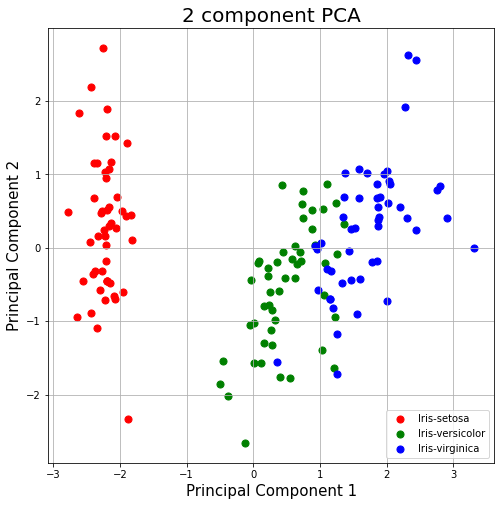

In [186]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [187]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

    The explained variance indicates how much information (variance) can be assigned to each of the major components. This is significant because, while you can transform four-dimensional space to two-dimensional space, you lose part of the variance (information) in the process. The characteristic explained variance ratio_ shows that the first principle component accounts for 72.77 percent of the variance, while the second principal component accounts for 23.03 percent of the variance. The two components together comprise 95.80 percent of the information.

<h3>PCA on Wine data</h3>

In [188]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [191]:
# importing or loading the dataset
dataset = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_1/Data/Wine.csv')
 
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [192]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [193]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [194]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [195]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [196]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [197]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

In [198]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


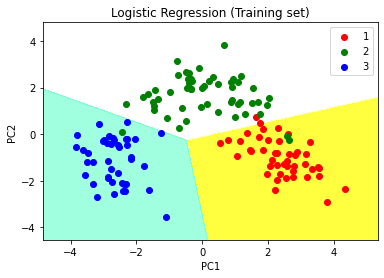

In [199]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


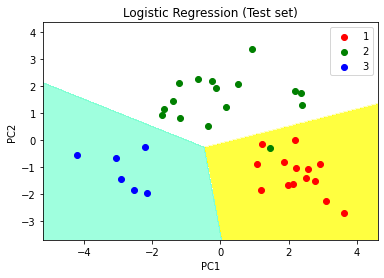

In [200]:

# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

<h3>9.10 Cross Validation Techniques</h3>

    * Cross-validation is a method of testing ML models that involves training numerous ML models on subsets of the available input data and evaluating them on the complementary subset of the data. In k-fold cross-validation, the input data is divided into k subgroups (also known as folds).
    * Cross-validation is largely used in applied machine learning to assess a machine learning model's competence on unseen data. That is, to use a small sample to assess how the model will perform in general when used to generate predictions on data that was not utilised during the model's training.
    * Holdout Method = To obtain predictions, this approach removes a portion of the training data set and sends it to a model that was trained on the remainder of the data set. We next compute the error estimation, which informs us how well our model performs on unknown data sets. This is referred to as the Holdout Method.
    * K-Fold = The data is separated into k subsets in K-Fold cross-validation, or we may think of it as a holdout technique repeated k times, with one of the k subsets serving as the validation set and the other k-1 subsets serving as the training set each time. The error is averaged across all k trials to determine our model's overall efficiency. We can see that each data point will appear exactly once in a validation set and k-1 times in a training set. This helps us minimise bias since we use the majority of the data for fitting and reduces variance because the majority of the data is also utilised in the validation set.
    * Stratified K-Fold = For an unbalanced data set, the K Fold Cross Validation approach will not operate as predicted. When we have an unbalanced data set, we need to make a modest modification to the K Fold cross validation procedure such that each fold has around the same amount of samples from each output class as the entire dataset. Stratified K Fold Cross Validation is a variant of employing a stratum in K Fold Cross Validation.
    * Leave-P-Out = In this method, we leave p data points out of the training data set out of a total of n data points, then use n-p samples to train the model and p points as the validation set. This is performed for all possible combinations, and the error is then averaged.

<h3>HoldOut Cross-validation or Train-Test Split</h3>

    The entire dataset is randomly partitioned into a training set and a validation set in this cross-validation procedure. As a general rule, about 70% of the whole dataset is utilised as a training set, with the remaining 30% serving as a validation set.

In [201]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris=load_iris()
X=iris.data
Y=iris.target
print("Size of Dataset {}".format(len(X)))
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 150
Accuracy score on training set is 0.9619047619047619
Accuracy score on test set is 1.0


<h3>K-Fold Cross-Validation</h3>

    The entire dataset is partitioned into K equal-sized sections in this K-Fold cross-validation procedure. Each division is referred to as a "Fold." Because we have K pieces, we name them K-Folds. One fold serves as a validation set, while the remaining K-1 folds serve as a training set.

    The procedure is repeated K times until each fold serves as a validation set and the remaining folds serve as a training set.

    The final accuracy of the model is calculated by taking the mean accuracy of the validation data from the k-models.

In [202]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


<h3>Stratified K-Fold Cross-Validation</h3>

    Stratified K-Fold cross-validation is an improved variant of K-Fold cross-validation that is mostly used for unbalanced datasets. The entire dataset is partitioned into K-folds of equal size, much as K-fold.
    However, under this strategy, each fold will contain the same proportion of instances of the target variable as the entire dataset.

In [203]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation score :0.9733333333333334


<h3>Leave P Out cross-validation</h3>

    LeavePOut cross-validation is an exhaustive cross-validation approach in which the validation set is made up of p-samples and the training set is made up of the remaining n-p samples.
    Assume the dataset has 100 samples. If we select p=10, we will utilise 10 values as a validation set and the rest 90 samples as the training set in each cycle.
    This technique is continued until the entire dataset is separated into p-samples for validation and n-p training samples for training.

In [204]:
from sklearn.model_selection import LeavePOut,cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris=load_iris()
X=iris.data
Y=iris.target
lpo=LeavePOut(p=2)
lpo.get_n_splits(X)
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=lpo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. ... 1. 1. 1.]
Average Cross Validation score :0.9495302013422818


<h3>Leave One Out cross-validation</h3>

    LeaveOneOut cross-validation is an exhaustive cross-validation approach that uses one sample point as the validation set and the remaining n-1 samples as the training set.

    Assume the dataset has 100 samples. Then, in each cycle, one value will serve as a validation set, while the remaining 99 samples will serve as the training set. As a result, the process is repeated until each sample in the dataset has been utilised as a validation point.

    With p=1, it's the same as LeavePOut cross-validation.

In [205]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score
iris=load_iris()
X=iris.data
Y=iris.target
loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :0.9466666666666667


<h3>Monte Carlo Cross-Validation(Shuffle Split)</h3>

    Monte Carlo cross-validation, sometimes referred to as Shuffle Split cross-validation, is a versatile cross-validation approach. The datasets are randomly partitioned into training and validation sets in this method.

    We've determined how much of the dataset will be used as a training set and how much will be utilised as a validation set. The remaining dataset is not used in either the training or validation sets if the combined proportion of training and validation set size does not equal 100.

    Let's imagine we have 100 samples, 60 percent of which will be utilised as a training set and 20% as a validation set. The remaining 20% (100-(60+20)) will be discarded.

    This splitting will occur 'n' times, which we must define.

In [206]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.95555556 1.         0.93333333 0.93333333 0.97777778 1.
 0.95555556 0.97777778 0.97777778 0.91111111]
Average Cross Validation score :0.9622222222222223


# 10. End